from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Univariate/ECA/')


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

2024-03-09 00:16:53.993779: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-09 00:16:57.418296: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-09 00:16:58.362002: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-09 00:16:58.362034: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
epochs = 30

In [3]:
df = pd.read_csv("data/LocationD.csv")

df.drop(columns=["Unnamed: 0", "Date"], inplace=True)

WINDOW_SIZE = 3
ECD = df["ECD"]

X1, y1 = df_to_X_y(ECD, WINDOW_SIZE)
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

# General Model

### CNN

2024-03-09 00:17:22.927528: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-09 00:17:22.927579: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-09 00:17:22.927612: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-09 00:17:22.930595: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
4/8 [==============>...............] - ETA: 0s - loss: 1966162.6250 - root_mean_squared_error: 1402.1992 

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 6s 558ms/step - loss: 1913798.0000 - root_mean_squared_error: 1383.4009 - val_loss: 1811539.5000 - val_root_mean_squared_error: 1345.9344
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 1881766.2500 - root_mean_squared_error: 1371.7749

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 171ms/step - loss: 1778701.2500 - root_mean_squared_error: 1333.6796 - val_loss: 1680719.1250 - val_root_mean_squared_error: 1296.4255
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 1675760.5000 - root_mean_squared_error: 1294.5117

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 157ms/step - loss: 1649067.6250 - root_mean_squared_error: 1284.1603 - val_loss: 1556394.5000 - val_root_mean_squared_error: 1247.5554
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 1536353.1250 - root_mean_squared_error: 1239.4971

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 367ms/step - loss: 1526516.1250 - root_mean_squared_error: 1235.5226 - val_loss: 1436936.0000 - val_root_mean_squared_error: 1198.7227
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 1382922.2500 - root_mean_squared_error: 1175.9772

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 414ms/step - loss: 1408351.0000 - root_mean_squared_error: 1186.7396 - val_loss: 1319693.2500 - val_root_mean_squared_error: 1148.7791
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 1281833.2500 - root_mean_squared_error: 1132.1808

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 432ms/step - loss: 1281833.2500 - root_mean_squared_error: 1132.1808 - val_loss: 1179388.5000 - val_root_mean_squared_error: 1085.9966
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 1143224.1250 - root_mean_squared_error: 1069.2166

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 322ms/step - loss: 1142916.1250 - root_mean_squared_error: 1069.0725 - val_loss: 1057332.7500 - val_root_mean_squared_error: 1028.2668
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 1093376.3750 - root_mean_squared_error: 1045.6464

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 283ms/step - loss: 1034453.3750 - root_mean_squared_error: 1017.0808 - val_loss: 961170.0625 - val_root_mean_squared_error: 980.3928
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 943082.0000 - root_mean_squared_error: 971.1241  

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 437ms/step - loss: 939896.3125 - root_mean_squared_error: 969.4825 - val_loss: 870657.8750 - val_root_mean_squared_error: 933.0905
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 845471.0000 - root_mean_squared_error: 919.4950

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 372ms/step - loss: 851088.2500 - root_mean_squared_error: 922.5444 - val_loss: 787101.6250 - val_root_mean_squared_error: 887.1875
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 769351.3125 - root_mean_squared_error: 877.1267

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 462ms/step - loss: 769351.3125 - root_mean_squared_error: 877.1267 - val_loss: 710163.8125 - val_root_mean_squared_error: 842.7122
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 776045.3125 - root_mean_squared_error: 880.9343

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 615ms/step - loss: 694697.8750 - root_mean_squared_error: 833.4854 - val_loss: 638747.5625 - val_root_mean_squared_error: 799.2169
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 624643.6250 - root_mean_squared_error: 790.3440

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 646ms/step - loss: 624643.6250 - root_mean_squared_error: 790.3440 - val_loss: 574320.6250 - val_root_mean_squared_error: 757.8394
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 642183.5000 - root_mean_squared_error: 801.3635

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 368ms/step - loss: 562276.0000 - root_mean_squared_error: 749.8506 - val_loss: 514878.0625 - val_root_mean_squared_error: 717.5500
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 505100.5938 - root_mean_squared_error: 710.7043

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 341ms/step - loss: 504152.4062 - root_mean_squared_error: 710.0369 - val_loss: 460150.3438 - val_root_mean_squared_error: 678.3438
Epoch 16/30
5/8 [=================>............] - ETA: 0s - loss: 466590.6875 - root_mean_squared_error: 683.0745

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 397ms/step - loss: 450495.6875 - root_mean_squared_error: 671.1898 - val_loss: 409733.3125 - val_root_mean_squared_error: 640.1041
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 409950.7500 - root_mean_squared_error: 640.2740

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 396ms/step - loss: 401178.3125 - root_mean_squared_error: 633.3864 - val_loss: 363329.1875 - val_root_mean_squared_error: 602.7679
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 343468.8750 - root_mean_squared_error: 586.0622

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 379ms/step - loss: 355756.7812 - root_mean_squared_error: 596.4535 - val_loss: 321049.3750 - val_root_mean_squared_error: 566.6122
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 349838.1250 - root_mean_squared_error: 591.4711

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 564ms/step - loss: 314314.8125 - root_mean_squared_error: 560.6379 - val_loss: 282485.1875 - val_root_mean_squared_error: 531.4933
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 308966.5625 - root_mean_squared_error: 555.8476

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 528ms/step - loss: 276770.1875 - root_mean_squared_error: 526.0895 - val_loss: 247431.5156 - val_root_mean_squared_error: 497.4249
Epoch 21/30
6/8 [=====================>........] - ETA: 0s - loss: 245092.4219 - root_mean_squared_error: 495.0681

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 702ms/step - loss: 242702.9219 - root_mean_squared_error: 492.6489 - val_loss: 216336.6406 - val_root_mean_squared_error: 465.1200
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 212502.2188 - root_mean_squared_error: 460.9796

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 426ms/step - loss: 212502.2188 - root_mean_squared_error: 460.9796 - val_loss: 187781.2812 - val_root_mean_squared_error: 433.3374
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 184619.5625 - root_mean_squared_error: 429.6738

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 429ms/step - loss: 184619.5625 - root_mean_squared_error: 429.6738 - val_loss: 162360.5156 - val_root_mean_squared_error: 402.9398
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 160210.0000 - root_mean_squared_error: 400.2624

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 262ms/step - loss: 159751.8594 - root_mean_squared_error: 399.6897 - val_loss: 139709.3594 - val_root_mean_squared_error: 373.7772
Epoch 25/30
6/8 [=====================>........] - ETA: 0s - loss: 140159.4219 - root_mean_squared_error: 374.3787

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 371ms/step - loss: 137902.8281 - root_mean_squared_error: 371.3527 - val_loss: 119693.1875 - val_root_mean_squared_error: 345.9670
Epoch 26/30
5/8 [=================>............] - ETA: 0s - loss: 119930.8516 - root_mean_squared_error: 346.3103

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 369ms/step - loss: 118489.1094 - root_mean_squared_error: 344.2225 - val_loss: 102248.2266 - val_root_mean_squared_error: 319.7628
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 111333.5859 - root_mean_squared_error: 333.6669

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 305ms/step - loss: 101561.1875 - root_mean_squared_error: 318.6866 - val_loss: 86689.8125 - val_root_mean_squared_error: 294.4313
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 98021.9297 - root_mean_squared_error: 313.0845

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 335ms/step - loss: 86428.0156 - root_mean_squared_error: 293.9864 - val_loss: 73308.0078 - val_root_mean_squared_error: 270.7545
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 74392.0859 - root_mean_squared_error: 272.7491

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 412ms/step - loss: 73412.8047 - root_mean_squared_error: 270.9480 - val_loss: 61790.0820 - val_root_mean_squared_error: 248.5761
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 59905.8203 - root_mean_squared_error: 244.7567

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 9ms/step


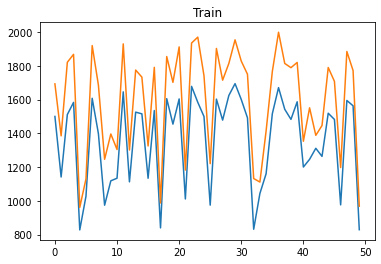

2/2 [==============================] - 0s 5ms/step


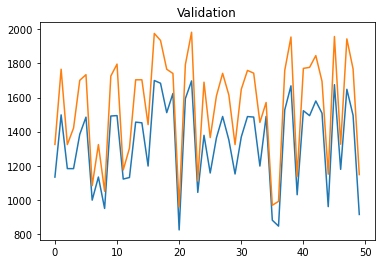

3/3 [==============================] - 0s 15ms/step


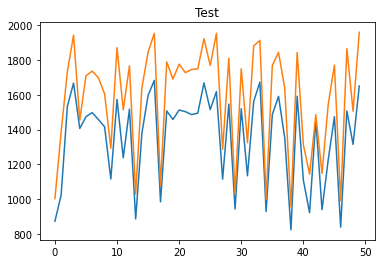

3/3 [==============================] - 0s 3ms/step


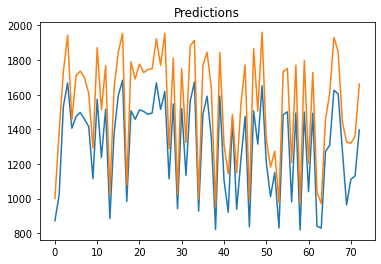

In [4]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 2542622.7500 - root_mean_squared_error: 1594.5603

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 27s 2s/step - loss: 2531958.5000 - root_mean_squared_error: 1591.2129 - val_loss: 2508556.7500 - val_root_mean_squared_error: 1583.8424
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 2516586.7500 - root_mean_squared_error: 1586.3754

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2531739.5000 - root_mean_squared_error: 1591.1440 - val_loss: 2508446.2500 - val_root_mean_squared_error: 1583.8075
Epoch 3/30
5/8 [=================>............] - ETA: 0s - loss: 2490791.5000 - root_mean_squared_error: 1578.2241

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2531638.7500 - root_mean_squared_error: 1591.1124 - val_loss: 2508350.2500 - val_root_mean_squared_error: 1583.7772
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2531533.0000 - root_mean_squared_error: 1591.0792

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2531533.0000 - root_mean_squared_error: 1591.0792 - val_loss: 2508216.5000 - val_root_mean_squared_error: 1583.7350
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 2560338.2500 - root_mean_squared_error: 1600.1057

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2531358.2500 - root_mean_squared_error: 1591.0243 - val_loss: 2507955.2500 - val_root_mean_squared_error: 1583.6526
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2531073.7500 - root_mean_squared_error: 1590.9348

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2531073.7500 - root_mean_squared_error: 1590.9348 - val_loss: 2507732.2500 - val_root_mean_squared_error: 1583.5822
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 2566093.0000 - root_mean_squared_error: 1601.9030

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2530924.2500 - root_mean_squared_error: 1590.8879 - val_loss: 2507640.7500 - val_root_mean_squared_error: 1583.5532
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2530838.5000 - root_mean_squared_error: 1590.8610

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2530838.5000 - root_mean_squared_error: 1590.8610 - val_loss: 2507559.5000 - val_root_mean_squared_error: 1583.5276
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 2528651.7500 - root_mean_squared_error: 1590.1735

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2530757.2500 - root_mean_squared_error: 1590.8354 - val_loss: 2507478.0000 - val_root_mean_squared_error: 1583.5018
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2515399.2500 - root_mean_squared_error: 1586.0010

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2530669.5000 - root_mean_squared_error: 1590.8079 - val_loss: 2507356.2500 - val_root_mean_squared_error: 1583.4634
Epoch 11/30
4/8 [==============>...............] - ETA: 0s - loss: 2519082.7500 - root_mean_squared_error: 1587.1619

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2530453.5000 - root_mean_squared_error: 1590.7399 - val_loss: 2506976.5000 - val_root_mean_squared_error: 1583.3435
Epoch 12/30
6/8 [=====================>........] - ETA: 0s - loss: 2539362.2500 - root_mean_squared_error: 1593.5376

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2530106.0000 - root_mean_squared_error: 1590.6307 - val_loss: 2506774.0000 - val_root_mean_squared_error: 1583.2795
Epoch 13/30
6/8 [=====================>........] - ETA: 0s - loss: 2515307.7500 - root_mean_squared_error: 1585.9722

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2529965.5000 - root_mean_squared_error: 1590.5865 - val_loss: 2506681.0000 - val_root_mean_squared_error: 1583.2501
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 2561109.0000 - root_mean_squared_error: 1600.3466

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2529878.5000 - root_mean_squared_error: 1590.5592 - val_loss: 2506600.2500 - val_root_mean_squared_error: 1583.2246
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 2674668.7500 - root_mean_squared_error: 1635.4414

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2529798.7500 - root_mean_squared_error: 1590.5341 - val_loss: 2506521.7500 - val_root_mean_squared_error: 1583.1998
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 2698168.7500 - root_mean_squared_error: 1642.6104

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2529720.5000 - root_mean_squared_error: 1590.5095 - val_loss: 2506444.2500 - val_root_mean_squared_error: 1583.1754
Epoch 17/30
5/8 [=================>............] - ETA: 0s - loss: 2450208.5000 - root_mean_squared_error: 1565.3142

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2529642.5000 - root_mean_squared_error: 1590.4850 - val_loss: 2506367.0000 - val_root_mean_squared_error: 1583.1510
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 2711049.0000 - root_mean_squared_error: 1646.5264

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2529565.0000 - root_mean_squared_error: 1590.4606 - val_loss: 2506289.0000 - val_root_mean_squared_error: 1583.1263
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 2504889.2500 - root_mean_squared_error: 1582.6842

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2529487.5000 - root_mean_squared_error: 1590.4363 - val_loss: 2506212.5000 - val_root_mean_squared_error: 1583.1022
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 2537326.2500 - root_mean_squared_error: 1592.8987

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2529411.0000 - root_mean_squared_error: 1590.4122 - val_loss: 2506135.0000 - val_root_mean_squared_error: 1583.0778
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 2550556.7500 - root_mean_squared_error: 1597.0463

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2529333.7500 - root_mean_squared_error: 1590.3879 - val_loss: 2506057.5000 - val_root_mean_squared_error: 1583.0532
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 2595316.5000 - root_mean_squared_error: 1610.9987

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2529256.2500 - root_mean_squared_error: 1590.3635 - val_loss: 2505980.7500 - val_root_mean_squared_error: 1583.0289
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 2671177.2500 - root_mean_squared_error: 1634.3737

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2529179.7500 - root_mean_squared_error: 1590.3395 - val_loss: 2505904.0000 - val_root_mean_squared_error: 1583.0048
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 2541209.5000 - root_mean_squared_error: 1594.1172

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2529102.2500 - root_mean_squared_error: 1590.3152 - val_loss: 2505826.7500 - val_root_mean_squared_error: 1582.9803
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2529025.0000 - root_mean_squared_error: 1590.2909

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2529025.0000 - root_mean_squared_error: 1590.2909 - val_loss: 2505749.0000 - val_root_mean_squared_error: 1582.9558
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2525660.0000 - root_mean_squared_error: 1589.2325

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2528947.2500 - root_mean_squared_error: 1590.2664 - val_loss: 2505672.0000 - val_root_mean_squared_error: 1582.9315
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 2522630.2500 - root_mean_squared_error: 1588.2791

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2528870.0000 - root_mean_squared_error: 1590.2421 - val_loss: 2505594.5000 - val_root_mean_squared_error: 1582.9070
Epoch 28/30
6/8 [=====================>........] - ETA: 0s - loss: 2549294.2500 - root_mean_squared_error: 1596.6510

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2528792.7500 - root_mean_squared_error: 1590.2178 - val_loss: 2505517.2500 - val_root_mean_squared_error: 1582.8826
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 2528714.7500 - root_mean_squared_error: 1590.1934

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2528714.7500 - root_mean_squared_error: 1590.1934 - val_loss: 2505440.0000 - val_root_mean_squared_error: 1582.8582
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 2446000.0000 - root_mean_squared_error: 1563.9694

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 2s 6ms/step


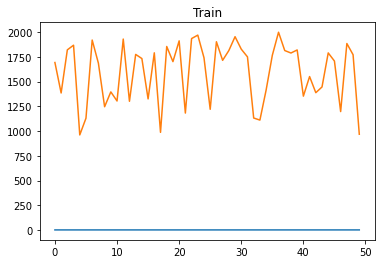

2/2 [==============================] - 3s 10ms/step


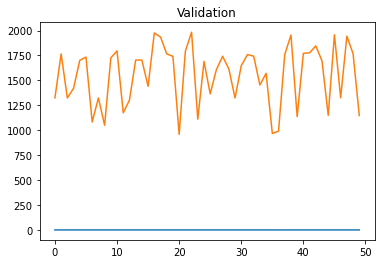

3/3 [==============================] - 0s 7ms/step


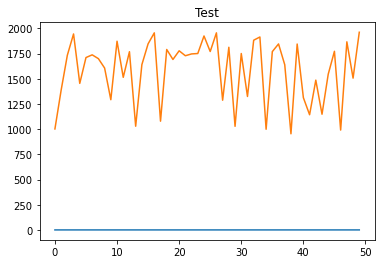

3/3 [==============================] - 0s 5ms/step


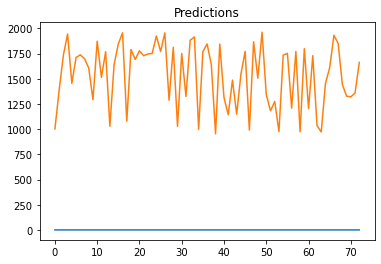

In [5]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2528309.2500 - root_mean_squared_error: 1590.0658 

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 31s 3s/step - loss: 2528309.2500 - root_mean_squared_error: 1590.0658 - val_loss: 2505008.2500 - val_root_mean_squared_error: 1582.7218
Epoch 2/30
6/8 [=====================>........] - ETA: 0s - loss: 2525963.7500 - root_mean_squared_error: 1589.3281

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2528189.0000 - root_mean_squared_error: 1590.0280 - val_loss: 2504888.0000 - val_root_mean_squared_error: 1582.6838
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 2489007.2500 - root_mean_squared_error: 1577.6588

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2528066.5000 - root_mean_squared_error: 1589.9895 - val_loss: 2504764.7500 - val_root_mean_squared_error: 1582.6449
Epoch 4/30
5/8 [=================>............] - ETA: 0s - loss: 2592418.7500 - root_mean_squared_error: 1610.0990

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2527938.2500 - root_mean_squared_error: 1589.9491 - val_loss: 2504624.2500 - val_root_mean_squared_error: 1582.6005
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 2498743.7500 - root_mean_squared_error: 1580.7416

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2527774.7500 - root_mean_squared_error: 1589.8977 - val_loss: 2504400.0000 - val_root_mean_squared_error: 1582.5297
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 2526254.2500 - root_mean_squared_error: 1589.4194

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2527453.0000 - root_mean_squared_error: 1589.7965 - val_loss: 2503903.5000 - val_root_mean_squared_error: 1582.3728
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2526962.5000 - root_mean_squared_error: 1589.6422

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2526962.5000 - root_mean_squared_error: 1589.6422 - val_loss: 2503555.7500 - val_root_mean_squared_error: 1582.2628
Epoch 8/30
3/8 [==========>...................] - ETA: 0s - loss: 2583965.7500 - root_mean_squared_error: 1607.4718

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2526701.0000 - root_mean_squared_error: 1589.5601 - val_loss: 2503338.5000 - val_root_mean_squared_error: 1582.1942
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2526489.0000 - root_mean_squared_error: 1589.4933

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2526489.0000 - root_mean_squared_error: 1589.4933 - val_loss: 2503182.5000 - val_root_mean_squared_error: 1582.1449
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 2472073.5000 - root_mean_squared_error: 1572.2828

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2526371.0000 - root_mean_squared_error: 1589.4562 - val_loss: 2503086.2500 - val_root_mean_squared_error: 1582.1145
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2526279.0000 - root_mean_squared_error: 1589.4272

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2526279.0000 - root_mean_squared_error: 1589.4272 - val_loss: 2502994.2500 - val_root_mean_squared_error: 1582.0854
Epoch 12/30
5/8 [=================>............] - ETA: 0s - loss: 2496140.7500 - root_mean_squared_error: 1579.9180

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2526185.0000 - root_mean_squared_error: 1589.3977 - val_loss: 2502904.7500 - val_root_mean_squared_error: 1582.0571
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 2520809.7500 - root_mean_squared_error: 1587.7058

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2526098.0000 - root_mean_squared_error: 1589.3704 - val_loss: 2502821.0000 - val_root_mean_squared_error: 1582.0306
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 2544712.7500 - root_mean_squared_error: 1595.2156

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2526014.0000 - root_mean_squared_error: 1589.3439 - val_loss: 2502737.0000 - val_root_mean_squared_error: 1582.0042
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 2729601.5000 - root_mean_squared_error: 1652.1505

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2525929.5000 - root_mean_squared_error: 1589.3173 - val_loss: 2502651.5000 - val_root_mean_squared_error: 1581.9771
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 2676048.2500 - root_mean_squared_error: 1635.8632

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2525838.7500 - root_mean_squared_error: 1589.2887 - val_loss: 2502535.7500 - val_root_mean_squared_error: 1581.9406
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 2755101.0000 - root_mean_squared_error: 1659.8497

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2525678.7500 - root_mean_squared_error: 1589.2384 - val_loss: 2502351.2500 - val_root_mean_squared_error: 1581.8822
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 2524250.7500 - root_mean_squared_error: 1588.7891

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2525543.0000 - root_mean_squared_error: 1589.1957 - val_loss: 2502253.7500 - val_root_mean_squared_error: 1581.8513
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 2339585.0000 - root_mean_squared_error: 1529.5702

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2525435.2500 - root_mean_squared_error: 1589.1619 - val_loss: 2502139.2500 - val_root_mean_squared_error: 1581.8152
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2525319.2500 - root_mean_squared_error: 1589.1254

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2525319.2500 - root_mean_squared_error: 1589.1254 - val_loss: 2502021.5000 - val_root_mean_squared_error: 1581.7780
Epoch 21/30
5/8 [=================>............] - ETA: 0s - loss: 2477918.7500 - root_mean_squared_error: 1574.1406

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2525205.2500 - root_mean_squared_error: 1589.0895 - val_loss: 2501916.2500 - val_root_mean_squared_error: 1581.7446
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2525090.2500 - root_mean_squared_error: 1589.0532

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2525090.2500 - root_mean_squared_error: 1589.0532 - val_loss: 2501796.5000 - val_root_mean_squared_error: 1581.7068
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2524977.7500 - root_mean_squared_error: 1589.0178

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2524977.7500 - root_mean_squared_error: 1589.0178 - val_loss: 2501691.0000 - val_root_mean_squared_error: 1581.6735
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 2771541.0000 - root_mean_squared_error: 1664.7946

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2524872.2500 - root_mean_squared_error: 1588.9846 - val_loss: 2501580.2500 - val_root_mean_squared_error: 1581.6384
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2524764.5000 - root_mean_squared_error: 1588.9508

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2524764.5000 - root_mean_squared_error: 1588.9508 - val_loss: 2501473.0000 - val_root_mean_squared_error: 1581.6046
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2530079.2500 - root_mean_squared_error: 1590.6223

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2524656.7500 - root_mean_squared_error: 1588.9169 - val_loss: 2501366.0000 - val_root_mean_squared_error: 1581.5707
Epoch 27/30
6/8 [=====================>........] - ETA: 0s - loss: 2516863.2500 - root_mean_squared_error: 1586.4625

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2524549.7500 - root_mean_squared_error: 1588.8832 - val_loss: 2501261.2500 - val_root_mean_squared_error: 1581.5376
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 2524280.2500 - root_mean_squared_error: 1588.7983

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2524444.7500 - root_mean_squared_error: 1588.8501 - val_loss: 2501153.0000 - val_root_mean_squared_error: 1581.5034
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 2507777.2500 - root_mean_squared_error: 1583.5963

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2524337.0000 - root_mean_squared_error: 1588.8163 - val_loss: 2501046.2500 - val_root_mean_squared_error: 1581.4696
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2524229.0000 - root_mean_squared_error: 1588.7822

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 2s 4ms/step


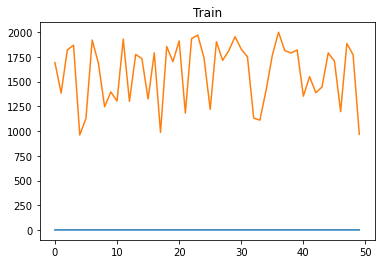

2/2 [==============================] - 2s 7ms/step


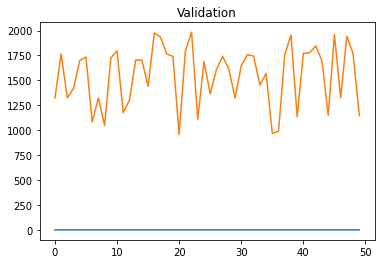

3/3 [==============================] - 0s 5ms/step


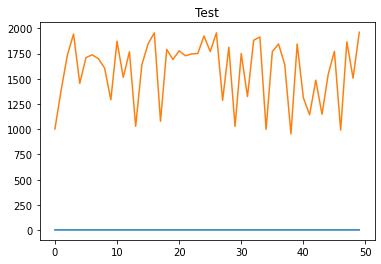

3/3 [==============================] - 0s 3ms/step


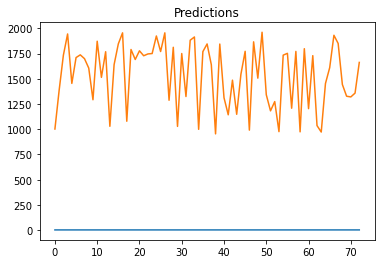

In [6]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/30
6/8 [=====================>........] - ETA: 0s - loss: 2531240.2500 - root_mean_squared_error: 1590.9872 INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 882ms/step - loss: 2530114.5000 - root_mean_squared_error: 1590.6334 - val_loss: 2506770.2500 - val_root_mean_squared_error: 1583.2783
Epoch 2/30
6/8 [=====================>........] - ETA: 0s - loss: 2560345.7500 - root_mean_squared_error: 1600.1080INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 753ms/step - loss: 2529886.2500 - root_mean_squared_error: 1590.5616 - val_loss: 2506382.2500 - val_root_mean_squared_error: 1583.1558
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 2554711.0000 - root_mean_squared_error: 1598.3463INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 561ms/step - loss: 2529194.5000 - root_mean_squared_error: 1590.3441 - val_loss: 2505316.7500 - val_root_mean_squared_error: 1582.8193
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 2344958.0000 - root_mean_squared_error: 1531.3256INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 647ms/step - loss: 2528370.2500 - root_mean_squared_error: 1590.0850 - val_loss: 2504971.7500 - val_root_mean_squared_error: 1582.7102
Epoch 5/30
3/8 [==========>...................] - ETA: 0s - loss: 2604254.7500 - root_mean_squared_error: 1613.7704INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 595ms/step - loss: 2528128.5000 - root_mean_squared_error: 1590.0089 - val_loss: 2504795.2500 - val_root_mean_squared_error: 1582.6545
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 2350945.7500 - root_mean_squared_error: 1533.2794INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 575ms/step - loss: 2527958.0000 - root_mean_squared_error: 1589.9553 - val_loss: 2504630.0000 - val_root_mean_squared_error: 1582.6023
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 2658388.5000 - root_mean_squared_error: 1630.4565INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 465ms/step - loss: 2527793.7500 - root_mean_squared_error: 1589.9037 - val_loss: 2504467.2500 - val_root_mean_squared_error: 1582.5509
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 2580242.2500 - root_mean_squared_error: 1606.3132INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 573ms/step - loss: 2527631.5000 - root_mean_squared_error: 1589.8527 - val_loss: 2504304.5000 - val_root_mean_squared_error: 1582.4994
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 2411088.5000 - root_mean_squared_error: 1552.7681INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 618ms/step - loss: 2527468.5000 - root_mean_squared_error: 1589.8014 - val_loss: 2504144.5000 - val_root_mean_squared_error: 1582.4489
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2544397.7500 - root_mean_squared_error: 1595.1168INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 580ms/step - loss: 2527308.2500 - root_mean_squared_error: 1589.7510 - val_loss: 2503981.7500 - val_root_mean_squared_error: 1582.3975
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 2771985.2500 - root_mean_squared_error: 1664.9280INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 643ms/step - loss: 2527146.5000 - root_mean_squared_error: 1589.7001 - val_loss: 2503820.5000 - val_root_mean_squared_error: 1582.3466
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2526984.5000 - root_mean_squared_error: 1589.6492INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 773ms/step - loss: 2526984.5000 - root_mean_squared_error: 1589.6492 - val_loss: 2503659.5000 - val_root_mean_squared_error: 1582.2957
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 2432607.0000 - root_mean_squared_error: 1559.6816INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 957ms/step - loss: 2526824.0000 - root_mean_squared_error: 1589.5986 - val_loss: 2503498.0000 - val_root_mean_squared_error: 1582.2446
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 2524394.2500 - root_mean_squared_error: 1588.8342INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 649ms/step - loss: 2526661.2500 - root_mean_squared_error: 1589.5475 - val_loss: 2503336.7500 - val_root_mean_squared_error: 1582.1936
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 2537785.5000 - root_mean_squared_error: 1593.0428INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 478ms/step - loss: 2526499.5000 - root_mean_squared_error: 1589.4966 - val_loss: 2503175.0000 - val_root_mean_squared_error: 1582.1426
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 2328061.5000 - root_mean_squared_error: 1525.7986INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 582ms/step - loss: 2526337.5000 - root_mean_squared_error: 1589.4457 - val_loss: 2503012.2500 - val_root_mean_squared_error: 1582.0911
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 2717621.0000 - root_mean_squared_error: 1648.5209INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 655ms/step - loss: 2526174.7500 - root_mean_squared_error: 1589.3944 - val_loss: 2502849.7500 - val_root_mean_squared_error: 1582.0397
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 2562419.2500 - root_mean_squared_error: 1600.7559INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 481ms/step - loss: 2526012.0000 - root_mean_squared_error: 1589.3433 - val_loss: 2502686.2500 - val_root_mean_squared_error: 1581.9880
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 2303139.5000 - root_mean_squared_error: 1517.6097INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 540ms/step - loss: 2525849.5000 - root_mean_squared_error: 1589.2921 - val_loss: 2502525.0000 - val_root_mean_squared_error: 1581.9371
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 2502121.0000 - root_mean_squared_error: 1581.8094INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 599ms/step - loss: 2525687.5000 - root_mean_squared_error: 1589.2412 - val_loss: 2502364.5000 - val_root_mean_squared_error: 1581.8864
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2525527.2500 - root_mean_squared_error: 1589.1908INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 683ms/step - loss: 2525527.2500 - root_mean_squared_error: 1589.1908 - val_loss: 2502203.5000 - val_root_mean_squared_error: 1581.8354
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 2447167.5000 - root_mean_squared_error: 1564.3425INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 832ms/step - loss: 2525366.0000 - root_mean_squared_error: 1589.1400 - val_loss: 2502042.0000 - val_root_mean_squared_error: 1581.7844
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2525204.2500 - root_mean_squared_error: 1589.0891INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 683ms/step - loss: 2525204.2500 - root_mean_squared_error: 1589.0891 - val_loss: 2501880.2500 - val_root_mean_squared_error: 1581.7333
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2525043.5000 - root_mean_squared_error: 1589.0386INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 598ms/step - loss: 2525043.5000 - root_mean_squared_error: 1589.0386 - val_loss: 2501719.2500 - val_root_mean_squared_error: 1581.6825
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2524882.5000 - root_mean_squared_error: 1588.9879INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2524882.5000 - root_mean_squared_error: 1588.9879 - val_loss: 2501558.5000 - val_root_mean_squared_error: 1581.6316
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 2662997.0000 - root_mean_squared_error: 1631.8691INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2524721.7500 - root_mean_squared_error: 1588.9373 - val_loss: 2501397.5000 - val_root_mean_squared_error: 1581.5807
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 2549460.7500 - root_mean_squared_error: 1596.7031INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 780ms/step - loss: 2524560.0000 - root_mean_squared_error: 1588.8864 - val_loss: 2501236.2500 - val_root_mean_squared_error: 1581.5298
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2524398.2500 - root_mean_squared_error: 1588.8354INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 988ms/step - loss: 2524398.2500 - root_mean_squared_error: 1588.8354 - val_loss: 2501076.5000 - val_root_mean_squared_error: 1581.4792
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 2369526.7500 - root_mean_squared_error: 1539.3267INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2524237.0000 - root_mean_squared_error: 1588.7848 - val_loss: 2500914.7500 - val_root_mean_squared_error: 1581.4281
Epoch 30/30
3/8 [==========>...................] - ETA: 0s - loss: 2675195.7500 - root_mean_squared_error: 1635.6025INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 2s 10ms/step


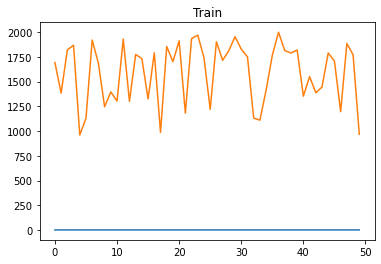

2/2 [==============================] - 1s 4ms/step


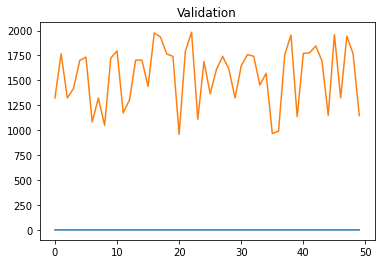

3/3 [==============================] - 0s 5ms/step


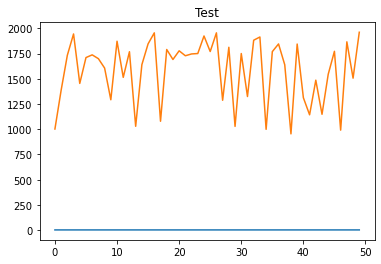

3/3 [==============================] - 0s 5ms/step


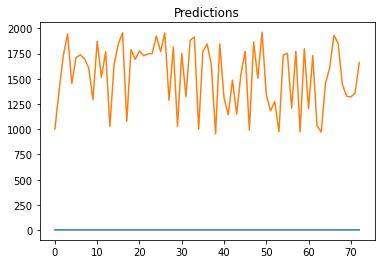

In [7]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [8]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/30
1/8 [==>...........................] - ETA: 9s - loss: 4267438.0000 - root_mean_squared_error: 2065.7778

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 461ms/step - loss: 4079865.2500 - root_mean_squared_error: 2019.8677 - val_loss: 3977679.0000 - val_root_mean_squared_error: 1994.4120
Epoch 2/30
6/8 [=====================>........] - ETA: 0s - loss: 3901690.0000 - root_mean_squared_error: 1975.2697

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 399ms/step - loss: 3900572.7500 - root_mean_squared_error: 1974.9868 - val_loss: 3799891.5000 - val_root_mean_squared_error: 1949.3311
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 3729170.7500 - root_mean_squared_error: 1931.1061

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 439ms/step - loss: 3729170.7500 - root_mean_squared_error: 1931.1061 - val_loss: 3628568.7500 - val_root_mean_squared_error: 1904.8802
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 3577206.5000 - root_mean_squared_error: 1891.3505

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 6s 857ms/step - loss: 3577206.5000 - root_mean_squared_error: 1891.3505 - val_loss: 3504621.7500 - val_root_mean_squared_error: 1872.0635
Epoch 5/30
5/8 [=================>............] - ETA: 0s - loss: 3492361.5000 - root_mean_squared_error: 1868.7861

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 298ms/step - loss: 3462560.2500 - root_mean_squared_error: 1860.7957 - val_loss: 3390493.2500 - val_root_mean_squared_error: 1841.3292
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 3372020.7500 - root_mean_squared_error: 1836.3063

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 411ms/step - loss: 3351694.7500 - root_mean_squared_error: 1830.7634 - val_loss: 3277466.0000 - val_root_mean_squared_error: 1810.3773
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 3196397.0000 - root_mean_squared_error: 1787.8470

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 247ms/step - loss: 3242711.5000 - root_mean_squared_error: 1800.7531 - val_loss: 3168090.0000 - val_root_mean_squared_error: 1779.9130
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 3183616.0000 - root_mean_squared_error: 1784.2690

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 328ms/step - loss: 3137838.7500 - root_mean_squared_error: 1771.3945 - val_loss: 3066752.5000 - val_root_mean_squared_error: 1751.2146
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 3237511.2500 - root_mean_squared_error: 1799.3086

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 348ms/step - loss: 3045659.0000 - root_mean_squared_error: 1745.1816 - val_loss: 2979522.0000 - val_root_mean_squared_error: 1726.1292
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2962044.0000 - root_mean_squared_error: 1721.0590

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 390ms/step - loss: 2962044.0000 - root_mean_squared_error: 1721.0590 - val_loss: 2895274.0000 - val_root_mean_squared_error: 1701.5504
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 2778339.0000 - root_mean_squared_error: 1666.8351

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 404ms/step - loss: 2879472.7500 - root_mean_squared_error: 1696.9009 - val_loss: 2812374.0000 - val_root_mean_squared_error: 1677.0134
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 2854777.5000 - root_mean_squared_error: 1689.6086

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 348ms/step - loss: 2798742.0000 - root_mean_squared_error: 1672.9441 - val_loss: 2730618.0000 - val_root_mean_squared_error: 1652.4581
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 2711524.5000 - root_mean_squared_error: 1646.6708

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 734ms/step - loss: 2720037.7500 - root_mean_squared_error: 1649.2537 - val_loss: 2650581.0000 - val_root_mean_squared_error: 1628.0605
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 2521060.5000 - root_mean_squared_error: 1587.7848

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 318ms/step - loss: 2642130.0000 - root_mean_squared_error: 1625.4630 - val_loss: 2571933.0000 - val_root_mean_squared_error: 1603.7247
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 2352287.0000 - root_mean_squared_error: 1533.7167

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 230ms/step - loss: 2565633.5000 - root_mean_squared_error: 1601.7595 - val_loss: 2507755.7500 - val_root_mean_squared_error: 1583.5895
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 2561788.0000 - root_mean_squared_error: 1600.5586

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 318ms/step - loss: 2532103.0000 - root_mean_squared_error: 1591.2583 - val_loss: 2507704.5000 - val_root_mean_squared_error: 1583.5734
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 2401474.5000 - root_mean_squared_error: 1549.6692

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 403ms/step - loss: 2532100.7500 - root_mean_squared_error: 1591.2576 - val_loss: 2507697.7500 - val_root_mean_squared_error: 1583.5712
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 2270319.7500 - root_mean_squared_error: 1506.7581

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 321ms/step - loss: 2532098.5000 - root_mean_squared_error: 1591.2568 - val_loss: 2507693.2500 - val_root_mean_squared_error: 1583.5698
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 2412294.0000 - root_mean_squared_error: 1553.1561

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 466ms/step - loss: 2532096.2500 - root_mean_squared_error: 1591.2562 - val_loss: 2507689.7500 - val_root_mean_squared_error: 1583.5687
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 2529061.2500 - root_mean_squared_error: 1590.3022

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 456ms/step - loss: 2532094.0000 - root_mean_squared_error: 1591.2555 - val_loss: 2507687.2500 - val_root_mean_squared_error: 1583.5679
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 2522228.0000 - root_mean_squared_error: 1588.1523

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 458ms/step - loss: 2532091.5000 - root_mean_squared_error: 1591.2546 - val_loss: 2507684.5000 - val_root_mean_squared_error: 1583.5670
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2524288.0000 - root_mean_squared_error: 1588.8008

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 506ms/step - loss: 2532089.2500 - root_mean_squared_error: 1591.2540 - val_loss: 2507682.2500 - val_root_mean_squared_error: 1583.5663
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 2439013.2500 - root_mean_squared_error: 1561.7340

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 564ms/step - loss: 2532087.0000 - root_mean_squared_error: 1591.2533 - val_loss: 2507680.0000 - val_root_mean_squared_error: 1583.5656
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2532084.5000 - root_mean_squared_error: 1591.2524

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 479ms/step - loss: 2532084.5000 - root_mean_squared_error: 1591.2524 - val_loss: 2507677.5000 - val_root_mean_squared_error: 1583.5648
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2535836.5000 - root_mean_squared_error: 1592.4310

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 482ms/step - loss: 2532082.2500 - root_mean_squared_error: 1591.2518 - val_loss: 2507675.2500 - val_root_mean_squared_error: 1583.5641
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2523092.5000 - root_mean_squared_error: 1588.4246

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 351ms/step - loss: 2532080.2500 - root_mean_squared_error: 1591.2511 - val_loss: 2507672.7500 - val_root_mean_squared_error: 1583.5634
Epoch 27/30
4/8 [==============>...............] - ETA: 0s - loss: 2513049.0000 - root_mean_squared_error: 1585.2599

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 427ms/step - loss: 2532077.5000 - root_mean_squared_error: 1591.2502 - val_loss: 2507670.5000 - val_root_mean_squared_error: 1583.5626
Epoch 28/30
6/8 [=====================>........] - ETA: 0s - loss: 2500502.0000 - root_mean_squared_error: 1581.2976

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 319ms/step - loss: 2532075.2500 - root_mean_squared_error: 1591.2496 - val_loss: 2507668.5000 - val_root_mean_squared_error: 1583.5619
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 2511371.0000 - root_mean_squared_error: 1584.7306

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 499ms/step - loss: 2532072.7500 - root_mean_squared_error: 1591.2488 - val_loss: 2507666.0000 - val_root_mean_squared_error: 1583.5612
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 2612969.5000 - root_mean_squared_error: 1616.4683

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 11ms/step


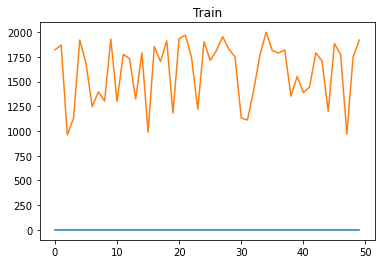

2/2 [==============================] - 1s 174ms/step


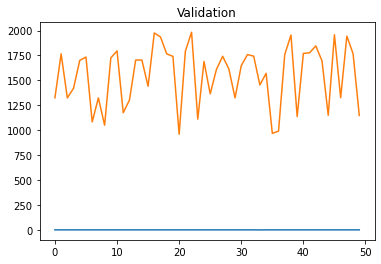

3/3 [==============================] - 0s 6ms/step


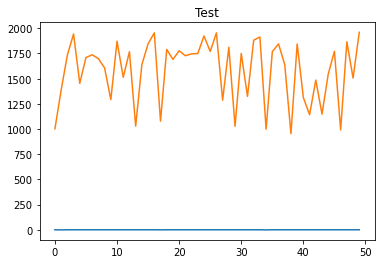

3/3 [==============================] - 0s 5ms/step


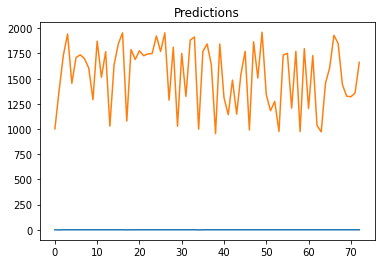

In [9]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 2525404.7500 - root_mean_squared_error: 1589.1522  

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 32s 3s/step - loss: 2526811.0000 - root_mean_squared_error: 1589.5946 - val_loss: 2502094.5000 - val_root_mean_squared_error: 1581.8010
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2526439.2500 - root_mean_squared_error: 1589.4777

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 2s/step - loss: 2526439.2500 - root_mean_squared_error: 1589.4777 - val_loss: 2501857.0000 - val_root_mean_squared_error: 1581.7260
Epoch 3/30
5/8 [=================>............] - ETA: 0s - loss: 2539436.2500 - root_mean_squared_error: 1593.5609

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2526189.0000 - root_mean_squared_error: 1589.3989 - val_loss: 2501587.5000 - val_root_mean_squared_error: 1581.6407
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 2538907.0000 - root_mean_squared_error: 1593.3948

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2525945.2500 - root_mean_squared_error: 1589.3223 - val_loss: 2501405.0000 - val_root_mean_squared_error: 1581.5830
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 2526820.0000 - root_mean_squared_error: 1589.5974

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2525787.0000 - root_mean_squared_error: 1589.2725 - val_loss: 2501260.7500 - val_root_mean_squared_error: 1581.5375
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2525587.7500 - root_mean_squared_error: 1589.2098

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2525587.7500 - root_mean_squared_error: 1589.2098 - val_loss: 2500824.0000 - val_root_mean_squared_error: 1581.3994
Epoch 7/30
4/8 [==============>...............] - ETA: 0s - loss: 2515145.5000 - root_mean_squared_error: 1585.9210

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2524841.0000 - root_mean_squared_error: 1588.9749 - val_loss: 2499886.5000 - val_root_mean_squared_error: 1581.1031
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 2526905.7500 - root_mean_squared_error: 1589.6244

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2524198.5000 - root_mean_squared_error: 1588.7726 - val_loss: 2499635.0000 - val_root_mean_squared_error: 1581.0234
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 2498614.5000 - root_mean_squared_error: 1580.7007

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2524015.7500 - root_mean_squared_error: 1588.7151 - val_loss: 2499499.7500 - val_root_mean_squared_error: 1580.9806
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 2604167.5000 - root_mean_squared_error: 1613.7433

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2523863.7500 - root_mean_squared_error: 1588.6672 - val_loss: 2499272.2500 - val_root_mean_squared_error: 1580.9087
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 2503617.7500 - root_mean_squared_error: 1582.2825

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2523521.7500 - root_mean_squared_error: 1588.5597 - val_loss: 2498830.2500 - val_root_mean_squared_error: 1580.7689
Epoch 12/30
5/8 [=================>............] - ETA: 0s - loss: 2490367.5000 - root_mean_squared_error: 1578.0898

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2523198.0000 - root_mean_squared_error: 1588.4578 - val_loss: 2498693.7500 - val_root_mean_squared_error: 1580.7257
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2523086.2500 - root_mean_squared_error: 1588.4226

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2523086.2500 - root_mean_squared_error: 1588.4226 - val_loss: 2498592.2500 - val_root_mean_squared_error: 1580.6936
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 2507790.2500 - root_mean_squared_error: 1583.6005

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2522985.7500 - root_mean_squared_error: 1588.3910 - val_loss: 2498493.2500 - val_root_mean_squared_error: 1580.6622
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2522886.7500 - root_mean_squared_error: 1588.3597

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2522886.7500 - root_mean_squared_error: 1588.3597 - val_loss: 2498394.5000 - val_root_mean_squared_error: 1580.6311
Epoch 16/30
6/8 [=====================>........] - ETA: 0s - loss: 2565674.7500 - root_mean_squared_error: 1601.7723

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2522788.0000 - root_mean_squared_error: 1588.3287 - val_loss: 2498295.7500 - val_root_mean_squared_error: 1580.5999
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 2486818.0000 - root_mean_squared_error: 1576.9648

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2522689.0000 - root_mean_squared_error: 1588.2975 - val_loss: 2498196.5000 - val_root_mean_squared_error: 1580.5684
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 2496499.7500 - root_mean_squared_error: 1580.0316

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2522589.2500 - root_mean_squared_error: 1588.2661 - val_loss: 2498097.0000 - val_root_mean_squared_error: 1580.5370
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2522490.5000 - root_mean_squared_error: 1588.2350

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2522490.5000 - root_mean_squared_error: 1588.2350 - val_loss: 2497999.5000 - val_root_mean_squared_error: 1580.5061
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2522392.7500 - root_mean_squared_error: 1588.2042

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2522392.7500 - root_mean_squared_error: 1588.2042 - val_loss: 2497901.2500 - val_root_mean_squared_error: 1580.4750
Epoch 21/30
6/8 [=====================>........] - ETA: 0s - loss: 2462865.7500 - root_mean_squared_error: 1569.3521

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2522294.2500 - root_mean_squared_error: 1588.1732 - val_loss: 2497803.0000 - val_root_mean_squared_error: 1580.4438
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2541581.7500 - root_mean_squared_error: 1594.2339

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2522196.7500 - root_mean_squared_error: 1588.1426 - val_loss: 2497704.2500 - val_root_mean_squared_error: 1580.4127
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2522098.2500 - root_mean_squared_error: 1588.1116

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2522098.2500 - root_mean_squared_error: 1588.1116 - val_loss: 2497607.7500 - val_root_mean_squared_error: 1580.3822
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2522001.5000 - root_mean_squared_error: 1588.0811

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2522001.5000 - root_mean_squared_error: 1588.0811 - val_loss: 2497510.5000 - val_root_mean_squared_error: 1580.3516
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2530883.5000 - root_mean_squared_error: 1590.8751

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2521904.2500 - root_mean_squared_error: 1588.0504 - val_loss: 2497413.2500 - val_root_mean_squared_error: 1580.3206
Epoch 26/30
5/8 [=================>............] - ETA: 0s - loss: 2496947.0000 - root_mean_squared_error: 1580.1731

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2521807.0000 - root_mean_squared_error: 1588.0198 - val_loss: 2497315.7500 - val_root_mean_squared_error: 1580.2898
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 2531513.5000 - root_mean_squared_error: 1591.0731

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2521709.2500 - root_mean_squared_error: 1587.9890 - val_loss: 2497218.5000 - val_root_mean_squared_error: 1580.2590
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2521612.0000 - root_mean_squared_error: 1587.9585

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2521612.0000 - root_mean_squared_error: 1587.9585 - val_loss: 2497121.7500 - val_root_mean_squared_error: 1580.2284
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 2500487.2500 - root_mean_squared_error: 1581.2928

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2521514.7500 - root_mean_squared_error: 1587.9279 - val_loss: 2497024.5000 - val_root_mean_squared_error: 1580.1976
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 2514102.2500 - root_mean_squared_error: 1585.5920

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 3s 10ms/step


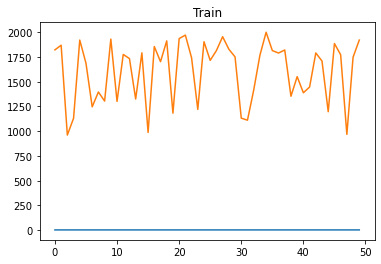

2/2 [==============================] - 1s 10ms/step


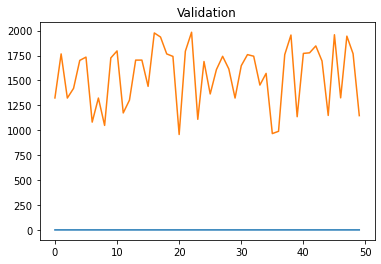

3/3 [==============================] - 1s 220ms/step


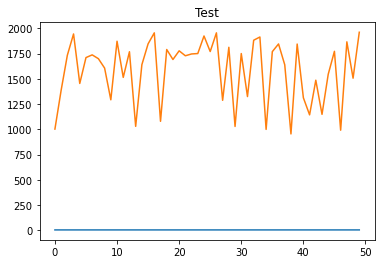

3/3 [==============================] - 0s 10ms/step


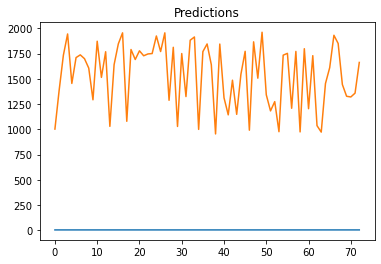

In [10]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/30
6/8 [=====================>........] - ETA: 0s - loss: 2507629.0000 - root_mean_squared_error: 1583.5494  

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 46s 4s/step - loss: 2533193.0000 - root_mean_squared_error: 1591.6007 - val_loss: 2508712.2500 - val_root_mean_squared_error: 1583.8915
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 2525396.7500 - root_mean_squared_error: 1589.1497

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2533126.5000 - root_mean_squared_error: 1591.5798 - val_loss: 2508636.7500 - val_root_mean_squared_error: 1583.8677
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 2552150.7500 - root_mean_squared_error: 1597.5452

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2533041.5000 - root_mean_squared_error: 1591.5532 - val_loss: 2508537.7500 - val_root_mean_squared_error: 1583.8364
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2532940.7500 - root_mean_squared_error: 1591.5215

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2532940.7500 - root_mean_squared_error: 1591.5215 - val_loss: 2508439.2500 - val_root_mean_squared_error: 1583.8053
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 2530759.5000 - root_mean_squared_error: 1590.8361

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2532844.2500 - root_mean_squared_error: 1591.4912 - val_loss: 2508351.0000 - val_root_mean_squared_error: 1583.7775
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2532764.5000 - root_mean_squared_error: 1591.4662

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2532764.5000 - root_mean_squared_error: 1591.4662 - val_loss: 2508280.5000 - val_root_mean_squared_error: 1583.7552
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 2514846.5000 - root_mean_squared_error: 1585.8268

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2532692.0000 - root_mean_squared_error: 1591.4434 - val_loss: 2508195.2500 - val_root_mean_squared_error: 1583.7283
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 2524516.2500 - root_mean_squared_error: 1588.8727

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2532571.0000 - root_mean_squared_error: 1591.4054 - val_loss: 2507974.0000 - val_root_mean_squared_error: 1583.6584
Epoch 9/30
3/8 [==========>...................] - ETA: 0s - loss: 2581661.7500 - root_mean_squared_error: 1606.7550

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 3s/step - loss: 2532323.5000 - root_mean_squared_error: 1591.3276 - val_loss: 2507713.7500 - val_root_mean_squared_error: 1583.5763
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2522826.5000 - root_mean_squared_error: 1588.3408

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2532049.2500 - root_mean_squared_error: 1591.2415 - val_loss: 2507505.5000 - val_root_mean_squared_error: 1583.5105
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 2531421.5000 - root_mean_squared_error: 1591.0442

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2531937.2500 - root_mean_squared_error: 1591.2062 - val_loss: 2507482.7500 - val_root_mean_squared_error: 1583.5033
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2531916.5000 - root_mean_squared_error: 1591.1997

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2531916.5000 - root_mean_squared_error: 1591.1997 - val_loss: 2507465.5000 - val_root_mean_squared_error: 1583.4979
Epoch 13/30
4/8 [==============>...............] - ETA: 0s - loss: 2420543.5000 - root_mean_squared_error: 1555.8096

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2531897.0000 - root_mean_squared_error: 1591.1936 - val_loss: 2507443.0000 - val_root_mean_squared_error: 1583.4907
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 2531662.2500 - root_mean_squared_error: 1591.1198

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2531870.7500 - root_mean_squared_error: 1591.1853 - val_loss: 2507408.2500 - val_root_mean_squared_error: 1583.4797
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2531828.7500 - root_mean_squared_error: 1591.1721

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2531828.7500 - root_mean_squared_error: 1591.1721 - val_loss: 2507343.2500 - val_root_mean_squared_error: 1583.4592
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 2796602.0000 - root_mean_squared_error: 1672.3044

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2531727.7500 - root_mean_squared_error: 1591.1404 - val_loss: 2507205.5000 - val_root_mean_squared_error: 1583.4158
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2531620.0000 - root_mean_squared_error: 1591.1066

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2531620.0000 - root_mean_squared_error: 1591.1066 - val_loss: 2507152.2500 - val_root_mean_squared_error: 1583.3990
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 2545496.2500 - root_mean_squared_error: 1595.4612

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2531579.0000 - root_mean_squared_error: 1591.0936 - val_loss: 2507122.7500 - val_root_mean_squared_error: 1583.3896
Epoch 19/30
5/8 [=================>............] - ETA: 0s - loss: 2550086.7500 - root_mean_squared_error: 1596.8990

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2531551.7500 - root_mean_squared_error: 1591.0851 - val_loss: 2507096.7500 - val_root_mean_squared_error: 1583.3815
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2531526.2500 - root_mean_squared_error: 1591.0770

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2531526.2500 - root_mean_squared_error: 1591.0770 - val_loss: 2507071.5000 - val_root_mean_squared_error: 1583.3734
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 2522432.2500 - root_mean_squared_error: 1588.2167

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2531501.2500 - root_mean_squared_error: 1591.0692 - val_loss: 2507047.5000 - val_root_mean_squared_error: 1583.3658
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2531478.7500 - root_mean_squared_error: 1591.0621

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2531478.7500 - root_mean_squared_error: 1591.0621 - val_loss: 2507025.7500 - val_root_mean_squared_error: 1583.3590
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 2533098.0000 - root_mean_squared_error: 1591.5709

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2531457.5000 - root_mean_squared_error: 1591.0554 - val_loss: 2507004.2500 - val_root_mean_squared_error: 1583.3523
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2523810.0000 - root_mean_squared_error: 1588.6504

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2531434.5000 - root_mean_squared_error: 1591.0482 - val_loss: 2506978.2500 - val_root_mean_squared_error: 1583.3440
Epoch 25/30
4/8 [==============>...............] - ETA: 0s - loss: 2593095.5000 - root_mean_squared_error: 1610.3091

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2531405.2500 - root_mean_squared_error: 1591.0391 - val_loss: 2506945.0000 - val_root_mean_squared_error: 1583.3335
Epoch 26/30
5/8 [=================>............] - ETA: 0s - loss: 2556001.5000 - root_mean_squared_error: 1598.7500

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2531370.0000 - root_mean_squared_error: 1591.0280 - val_loss: 2506908.7500 - val_root_mean_squared_error: 1583.3220
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 2531059.5000 - root_mean_squared_error: 1590.9304

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2531334.2500 - root_mean_squared_error: 1591.0167 - val_loss: 2506871.0000 - val_root_mean_squared_error: 1583.3102
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2531292.0000 - root_mean_squared_error: 1591.0034

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2531292.0000 - root_mean_squared_error: 1591.0034 - val_loss: 2506829.7500 - val_root_mean_squared_error: 1583.2971
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 2531251.7500 - root_mean_squared_error: 1590.9908

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2531251.7500 - root_mean_squared_error: 1590.9908 - val_loss: 2506789.2500 - val_root_mean_squared_error: 1583.2843
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2531216.7500 - root_mean_squared_error: 1590.9799

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 2s 6ms/step


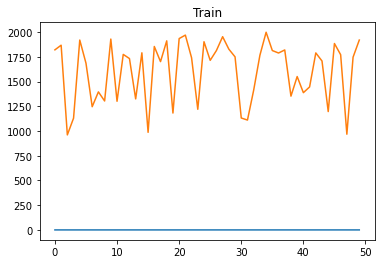

2/2 [==============================] - 2s 7ms/step


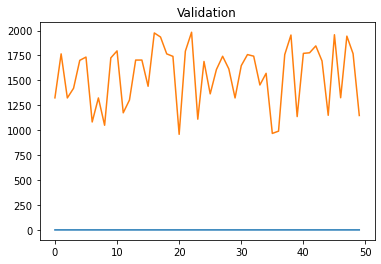

3/3 [==============================] - 0s 29ms/step


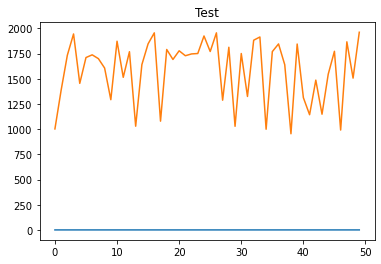

3/3 [==============================] - 0s 4ms/step


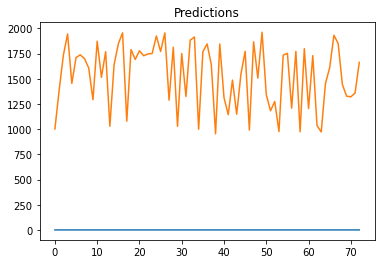

In [11]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/30
5/8 [=================>............] - ETA: 0s - loss: 2592496.2500 - root_mean_squared_error: 1610.1230  INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 18s 1s/step - loss: 2532842.2500 - root_mean_squared_error: 1591.4906 - val_loss: 2508301.0000 - val_root_mean_squared_error: 1583.7617
Epoch 2/30
3/8 [==========>...................] - ETA: 0s - loss: 2588072.0000 - root_mean_squared_error: 1608.7485INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 789ms/step - loss: 2532679.7500 - root_mean_squared_error: 1591.4396 - val_loss: 2508139.7500 - val_root_mean_squared_error: 1583.7107
Epoch 3/30
5/8 [=================>............] - ETA: 0s - loss: 2540870.2500 - root_mean_squared_error: 1594.0107INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 862ms/step - loss: 2532518.5000 - root_mean_squared_error: 1591.3889 - val_loss: 2507978.2500 - val_root_mean_squared_error: 1583.6598
Epoch 4/30
5/8 [=================>............] - ETA: 0s - loss: 2550785.2500 - root_mean_squared_error: 1597.1178INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 929ms/step - loss: 2532356.7500 - root_mean_squared_error: 1591.3380 - val_loss: 2507816.5000 - val_root_mean_squared_error: 1583.6086
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2532194.7500 - root_mean_squared_error: 1591.2871INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2532194.7500 - root_mean_squared_error: 1591.2871 - val_loss: 2507654.5000 - val_root_mean_squared_error: 1583.5575
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2532032.0000 - root_mean_squared_error: 1591.2360INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2532032.0000 - root_mean_squared_error: 1591.2360 - val_loss: 2507493.2500 - val_root_mean_squared_error: 1583.5066
Epoch 7/30
5/8 [=================>............] - ETA: 0s - loss: 2584592.5000 - root_mean_squared_error: 1607.6667INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 780ms/step - loss: 2531871.2500 - root_mean_squared_error: 1591.1854 - val_loss: 2507330.7500 - val_root_mean_squared_error: 1583.4553
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 2437063.0000 - root_mean_squared_error: 1561.1095INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 691ms/step - loss: 2531709.0000 - root_mean_squared_error: 1591.1345 - val_loss: 2507169.0000 - val_root_mean_squared_error: 1583.4043
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 2520812.0000 - root_mean_squared_error: 1587.7065INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 833ms/step - loss: 2531546.7500 - root_mean_squared_error: 1591.0835 - val_loss: 2507007.7500 - val_root_mean_squared_error: 1583.3534
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2527331.7500 - root_mean_squared_error: 1589.7584INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2531385.0000 - root_mean_squared_error: 1591.0327 - val_loss: 2506845.7500 - val_root_mean_squared_error: 1583.3021
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 2560678.2500 - root_mean_squared_error: 1600.2119INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 797ms/step - loss: 2531222.7500 - root_mean_squared_error: 1590.9817 - val_loss: 2506682.7500 - val_root_mean_squared_error: 1583.2507
Epoch 12/30
5/8 [=================>............] - ETA: 0s - loss: 2575928.7500 - root_mean_squared_error: 1604.9700INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 895ms/step - loss: 2531060.5000 - root_mean_squared_error: 1590.9307 - val_loss: 2506520.7500 - val_root_mean_squared_error: 1583.1996
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 2538810.5000 - root_mean_squared_error: 1593.3645INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2530897.2500 - root_mean_squared_error: 1590.8794 - val_loss: 2506359.5000 - val_root_mean_squared_error: 1583.1487
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 2597225.2500 - root_mean_squared_error: 1611.5909INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2530737.0000 - root_mean_squared_error: 1590.8290 - val_loss: 2506198.5000 - val_root_mean_squared_error: 1583.0978
Epoch 15/30
6/8 [=====================>........] - ETA: 0s - loss: 2542334.2500 - root_mean_squared_error: 1594.4698INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 942ms/step - loss: 2530575.7500 - root_mean_squared_error: 1590.7783 - val_loss: 2506036.5000 - val_root_mean_squared_error: 1583.0466
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2530413.2500 - root_mean_squared_error: 1590.7273INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 876ms/step - loss: 2530413.2500 - root_mean_squared_error: 1590.7273 - val_loss: 2505874.2500 - val_root_mean_squared_error: 1582.9954
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 2578129.5000 - root_mean_squared_error: 1605.6555INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 833ms/step - loss: 2530251.0000 - root_mean_squared_error: 1590.6763 - val_loss: 2505712.0000 - val_root_mean_squared_error: 1582.9441
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 2537820.2500 - root_mean_squared_error: 1593.0537INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2530088.0000 - root_mean_squared_error: 1590.6250 - val_loss: 2505550.5000 - val_root_mean_squared_error: 1582.8931
Epoch 19/30
5/8 [=================>............] - ETA: 0s - loss: 2538442.0000 - root_mean_squared_error: 1593.2489INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2529927.5000 - root_mean_squared_error: 1590.5746 - val_loss: 2505389.0000 - val_root_mean_squared_error: 1582.8420
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 2533822.5000 - root_mean_squared_error: 1591.7985INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2529765.0000 - root_mean_squared_error: 1590.5236 - val_loss: 2505227.5000 - val_root_mean_squared_error: 1582.7910
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 2525583.2500 - root_mean_squared_error: 1589.2084INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 821ms/step - loss: 2529604.2500 - root_mean_squared_error: 1590.4730 - val_loss: 2505066.0000 - val_root_mean_squared_error: 1582.7400
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2529441.5000 - root_mean_squared_error: 1590.4218INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 959ms/step - loss: 2529441.5000 - root_mean_squared_error: 1590.4218 - val_loss: 2504904.2500 - val_root_mean_squared_error: 1582.6890
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 2518397.2500 - root_mean_squared_error: 1586.9459INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2529280.2500 - root_mean_squared_error: 1590.3711 - val_loss: 2504742.2500 - val_root_mean_squared_error: 1582.6377
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 2524144.0000 - root_mean_squared_error: 1588.7555INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 787ms/step - loss: 2529117.0000 - root_mean_squared_error: 1590.3198 - val_loss: 2504579.7500 - val_root_mean_squared_error: 1582.5864
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2527048.2500 - root_mean_squared_error: 1589.6692INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 865ms/step - loss: 2528955.5000 - root_mean_squared_error: 1590.2690 - val_loss: 2504417.0000 - val_root_mean_squared_error: 1582.5350
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 2378027.0000 - root_mean_squared_error: 1542.0853INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 892ms/step - loss: 2528792.0000 - root_mean_squared_error: 1590.2177 - val_loss: 2504255.0000 - val_root_mean_squared_error: 1582.4838
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 2524566.5000 - root_mean_squared_error: 1588.8884INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2528630.2500 - root_mean_squared_error: 1590.1667 - val_loss: 2504092.2500 - val_root_mean_squared_error: 1582.4324
Epoch 28/30
6/8 [=====================>........] - ETA: 0s - loss: 2525462.7500 - root_mean_squared_error: 1589.1704INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2528466.7500 - root_mean_squared_error: 1590.1154 - val_loss: 2503930.0000 - val_root_mean_squared_error: 1582.3811
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 2468522.5000 - root_mean_squared_error: 1571.1532INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 849ms/step - loss: 2528304.0000 - root_mean_squared_error: 1590.0642 - val_loss: 2503767.7500 - val_root_mean_squared_error: 1582.3298
Epoch 30/30
5/8 [=================>............] - ETA: 0s - loss: 2475990.0000 - root_mean_squared_error: 1573.5278INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 12ms/step


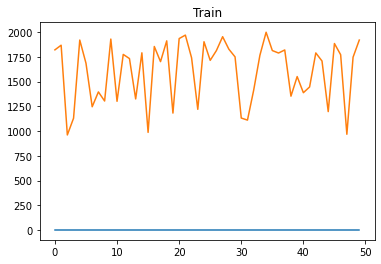

2/2 [==============================] - 1s 7ms/step


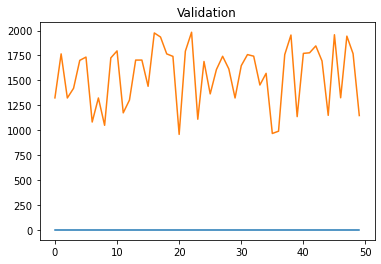

3/3 [==============================] - 0s 40ms/step


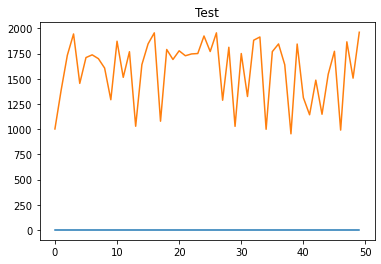

3/3 [==============================] - 0s 4ms/step


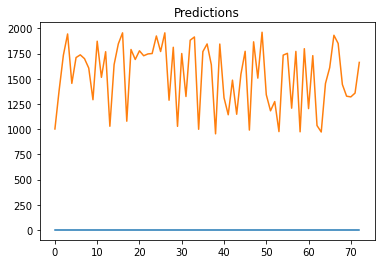

In [12]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/30
4/8 [==============>...............] - ETA: 0s - loss: 2119471.5000 - root_mean_squared_error: 1455.8405 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 14s 814ms/step - loss: 2071184.1250 - root_mean_squared_error: 1439.1609 - val_loss: 1582642.6250 - val_root_mean_squared_error: 1258.0312
Epoch 2/30
6/8 [=====================>........] - ETA: 0s - loss: 1755187.3750 - root_mean_squared_error: 1324.8348

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 913ms/step - loss: 1768865.2500 - root_mean_squared_error: 1329.9869 - val_loss: 1314341.5000 - val_root_mean_squared_error: 1146.4474
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 1541290.0000 - root_mean_squared_error: 1241.4871

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 1568858.7500 - root_mean_squared_error: 1252.5409 - val_loss: 1154144.2500 - val_root_mean_squared_error: 1074.3110
Epoch 4/30
4/8 [==============>...............] - ETA: 0s - loss: 1334576.0000 - root_mean_squared_error: 1155.2385

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 692ms/step - loss: 1286657.7500 - root_mean_squared_error: 1134.3093 - val_loss: 1012840.8125 - val_root_mean_squared_error: 1006.3999
Epoch 5/30
5/8 [=================>............] - ETA: 0s - loss: 1209445.1250 - root_mean_squared_error: 1099.7478

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 894ms/step - loss: 1165423.5000 - root_mean_squared_error: 1079.5479 - val_loss: 881115.0625 - val_root_mean_squared_error: 938.6773
Epoch 6/30
5/8 [=================>............] - ETA: 0s - loss: 987342.8750 - root_mean_squared_error: 993.6513  

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 518ms/step - loss: 993749.2500 - root_mean_squared_error: 996.8698 - val_loss: 758866.1875 - val_root_mean_squared_error: 871.1293
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 724598.7500 - root_mean_squared_error: 851.2336

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 705ms/step - loss: 831372.6875 - root_mean_squared_error: 911.7964 - val_loss: 648404.1250 - val_root_mean_squared_error: 805.2355
Epoch 8/30
5/8 [=================>............] - ETA: 0s - loss: 729498.8750 - root_mean_squared_error: 854.1071

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 511ms/step - loss: 712609.1875 - root_mean_squared_error: 844.1618 - val_loss: 548563.3750 - val_root_mean_squared_error: 740.6506
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 591706.5000 - root_mean_squared_error: 769.2246

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 470ms/step - loss: 591706.5000 - root_mean_squared_error: 769.2246 - val_loss: 459247.2812 - val_root_mean_squared_error: 677.6779
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 520002.1562 - root_mean_squared_error: 721.1118

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 750ms/step - loss: 520498.7500 - root_mean_squared_error: 721.4560 - val_loss: 379271.9375 - val_root_mean_squared_error: 615.8506
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 448682.8750 - root_mean_squared_error: 669.8380

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 905ms/step - loss: 448682.8750 - root_mean_squared_error: 669.8380 - val_loss: 308015.3438 - val_root_mean_squared_error: 554.9913
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 358165.3438 - root_mean_squared_error: 598.4692

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 830ms/step - loss: 358165.3438 - root_mean_squared_error: 598.4692 - val_loss: 247255.3438 - val_root_mean_squared_error: 497.2478
Epoch 13/30
5/8 [=================>............] - ETA: 0s - loss: 305821.5938 - root_mean_squared_error: 553.0114

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 310940.2500 - root_mean_squared_error: 557.6202 - val_loss: 194642.2344 - val_root_mean_squared_error: 441.1828
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 260791.6875 - root_mean_squared_error: 510.6777

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 543ms/step - loss: 227392.0625 - root_mean_squared_error: 476.8564 - val_loss: 150945.7812 - val_root_mean_squared_error: 388.5174
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 188287.8438 - root_mean_squared_error: 433.9215

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 188287.8438 - root_mean_squared_error: 433.9215 - val_loss: 115349.0547 - val_root_mean_squared_error: 339.6308
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 169299.0000 - root_mean_squared_error: 411.4596

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 596ms/step - loss: 169495.6719 - root_mean_squared_error: 411.6985 - val_loss: 86293.3125 - val_root_mean_squared_error: 293.7572
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 121591.9375 - root_mean_squared_error: 348.7003

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 473ms/step - loss: 121995.1641 - root_mean_squared_error: 349.2781 - val_loss: 63226.5156 - val_root_mean_squared_error: 251.4488
Epoch 18/30
5/8 [=================>............] - ETA: 0s - loss: 128239.0469 - root_mean_squared_error: 358.1048

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 736ms/step - loss: 127824.5469 - root_mean_squared_error: 357.5256 - val_loss: 44914.0078 - val_root_mean_squared_error: 211.9292
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 96582.0781 - root_mean_squared_error: 310.7766 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 96582.0781 - root_mean_squared_error: 310.7766 - val_loss: 31289.0957 - val_root_mean_squared_error: 176.8872
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 87182.3906 - root_mean_squared_error: 295.2666

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 87182.3906 - root_mean_squared_error: 295.2666 - val_loss: 21765.4395 - val_root_mean_squared_error: 147.5311
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 93300.7422 - root_mean_squared_error: 305.4517

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 955ms/step - loss: 93300.7422 - root_mean_squared_error: 305.4517 - val_loss: 14575.3213 - val_root_mean_squared_error: 120.7283
Epoch 22/30
5/8 [=================>............] - ETA: 0s - loss: 47479.6953 - root_mean_squared_error: 217.8984

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 728ms/step - loss: 47447.4922 - root_mean_squared_error: 217.8244 - val_loss: 10106.2246 - val_root_mean_squared_error: 100.5297
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 59665.0117 - root_mean_squared_error: 244.2642

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 397ms/step - loss: 65553.7344 - root_mean_squared_error: 256.0346 - val_loss: 7147.8740 - val_root_mean_squared_error: 84.5451
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 60239.7109 - root_mean_squared_error: 245.4378

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 465ms/step - loss: 61615.1641 - root_mean_squared_error: 248.2240 - val_loss: 5107.4526 - val_root_mean_squared_error: 71.4664
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 48878.9883 - root_mean_squared_error: 221.0859

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 580ms/step - loss: 49209.4375 - root_mean_squared_error: 221.8320 - val_loss: 3856.9539 - val_root_mean_squared_error: 62.1044
Epoch 26/30
6/8 [=====================>........] - ETA: 0s - loss: 50534.9219 - root_mean_squared_error: 224.7997

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 632ms/step - loss: 52781.5508 - root_mean_squared_error: 229.7424 - val_loss: 3245.4951 - val_root_mean_squared_error: 56.9692
Epoch 27/30
5/8 [=================>............] - ETA: 0s - loss: 54190.5938 - root_mean_squared_error: 232.7887

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 547ms/step - loss: 53545.3164 - root_mean_squared_error: 231.3986 - val_loss: 2829.6594 - val_root_mean_squared_error: 53.1945
Epoch 28/30
5/8 [=================>............] - ETA: 0s - loss: 51711.7422 - root_mean_squared_error: 227.4022 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 582ms/step - loss: 51211.9180 - root_mean_squared_error: 226.3005 - val_loss: 2601.0037 - val_root_mean_squared_error: 51.0000
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 49252.3789 - root_mean_squared_error: 221.9288

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 665ms/step - loss: 48407.3320 - root_mean_squared_error: 220.0167 - val_loss: 2493.9658 - val_root_mean_squared_error: 49.9396
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 41886.4023 - root_mean_squared_error: 204.6617

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 144ms/step


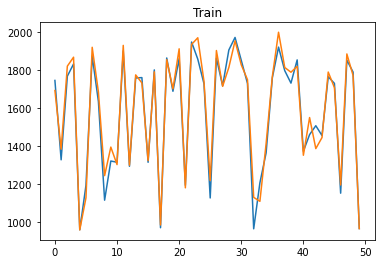

2/2 [==============================] - 1s 7ms/step


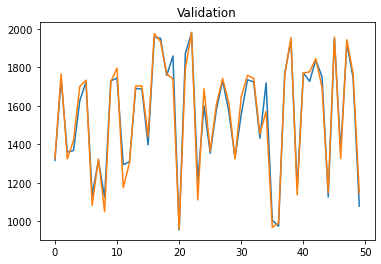

3/3 [==============================] - 0s 4ms/step


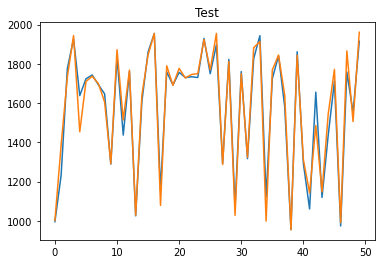

3/3 [==============================] - 0s 7ms/step


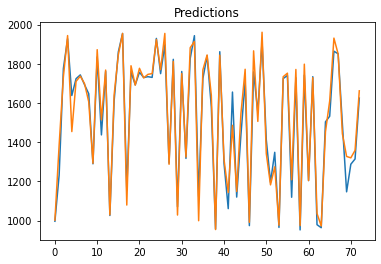

In [13]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [14]:
auto_cnn_mse

3518.6917030592385

### GRU

Epoch 1/30
5/8 [=================>............] - ETA: 0s - loss: 2516228.0000 - root_mean_squared_error: 1586.2623  

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 47s 4s/step - loss: 2537209.2500 - root_mean_squared_error: 1592.8619 - val_loss: 2513973.2500 - val_root_mean_squared_error: 1585.5514
Epoch 2/30
6/8 [=====================>........] - ETA: 0s - loss: 2557629.0000 - root_mean_squared_error: 1599.2589

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2537164.5000 - root_mean_squared_error: 1592.8479 - val_loss: 2513770.5000 - val_root_mean_squared_error: 1585.4874
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 2513501.7500 - root_mean_squared_error: 1585.4027

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2536914.7500 - root_mean_squared_error: 1592.7695 - val_loss: 2513463.5000 - val_root_mean_squared_error: 1585.3906
Epoch 4/30
5/8 [=================>............] - ETA: 0s - loss: 2591306.5000 - root_mean_squared_error: 1609.7535

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2536691.0000 - root_mean_squared_error: 1592.6993 - val_loss: 2512917.2500 - val_root_mean_squared_error: 1585.2184
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2535624.7500 - root_mean_squared_error: 1592.3645

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2535624.7500 - root_mean_squared_error: 1592.3645 - val_loss: 2511489.7500 - val_root_mean_squared_error: 1584.7681
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2534317.2500 - root_mean_squared_error: 1591.9539

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2534317.2500 - root_mean_squared_error: 1591.9539 - val_loss: 2510741.2500 - val_root_mean_squared_error: 1584.5319
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2534003.7500 - root_mean_squared_error: 1591.8555

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2534003.7500 - root_mean_squared_error: 1591.8555 - val_loss: 2510619.5000 - val_root_mean_squared_error: 1584.4934
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2533743.0000 - root_mean_squared_error: 1591.7736

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2533743.0000 - root_mean_squared_error: 1591.7736 - val_loss: 2510532.5000 - val_root_mean_squared_error: 1584.4659
Epoch 9/30
5/8 [=================>............] - ETA: 0s - loss: 2500115.0000 - root_mean_squared_error: 1581.1752

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2533831.2500 - root_mean_squared_error: 1591.8013 - val_loss: 2510449.5000 - val_root_mean_squared_error: 1584.4399
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2528724.7500 - root_mean_squared_error: 1590.1964

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2533787.5000 - root_mean_squared_error: 1591.7875 - val_loss: 2510367.7500 - val_root_mean_squared_error: 1584.4141
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 2536158.0000 - root_mean_squared_error: 1592.5320

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2533702.7500 - root_mean_squared_error: 1591.7609 - val_loss: 2510286.5000 - val_root_mean_squared_error: 1584.3884
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 2522818.2500 - root_mean_squared_error: 1588.3383

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2533521.2500 - root_mean_squared_error: 1591.7039 - val_loss: 2510205.5000 - val_root_mean_squared_error: 1584.3628
Epoch 13/30
3/8 [==========>...................] - ETA: 0s - loss: 2663214.2500 - root_mean_squared_error: 1631.9358

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2533352.5000 - root_mean_squared_error: 1591.6509 - val_loss: 2510124.7500 - val_root_mean_squared_error: 1584.3373
Epoch 14/30
5/8 [=================>............] - ETA: 0s - loss: 2565591.0000 - root_mean_squared_error: 1601.7462

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2533281.2500 - root_mean_squared_error: 1591.6285 - val_loss: 2510044.7500 - val_root_mean_squared_error: 1584.3121
Epoch 15/30
6/8 [=====================>........] - ETA: 0s - loss: 2536301.0000 - root_mean_squared_error: 1592.5768

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2533422.0000 - root_mean_squared_error: 1591.6727 - val_loss: 2509965.0000 - val_root_mean_squared_error: 1584.2869
Epoch 16/30
5/8 [=================>............] - ETA: 0s - loss: 2557684.7500 - root_mean_squared_error: 1599.2764

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2533437.2500 - root_mean_squared_error: 1591.6775 - val_loss: 2509885.2500 - val_root_mean_squared_error: 1584.2617
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 2478032.7500 - root_mean_squared_error: 1574.1769

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2533167.7500 - root_mean_squared_error: 1591.5928 - val_loss: 2509806.2500 - val_root_mean_squared_error: 1584.2368
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 2538214.0000 - root_mean_squared_error: 1593.1774

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2533131.7500 - root_mean_squared_error: 1591.5815 - val_loss: 2509726.0000 - val_root_mean_squared_error: 1584.2114
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 2547921.2500 - root_mean_squared_error: 1596.2209

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2532853.0000 - root_mean_squared_error: 1591.4939 - val_loss: 2509646.0000 - val_root_mean_squared_error: 1584.1863
Epoch 20/30
1/8 [==>...........................] - ETA: 1s - loss: 2707313.2500 - root_mean_squared_error: 1645.3915

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2532888.0000 - root_mean_squared_error: 1591.5050 - val_loss: 2509566.5000 - val_root_mean_squared_error: 1584.1611
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2532812.7500 - root_mean_squared_error: 1591.4813

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2532812.7500 - root_mean_squared_error: 1591.4813 - val_loss: 2509487.0000 - val_root_mean_squared_error: 1584.1360
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2547155.7500 - root_mean_squared_error: 1595.9811

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2532692.7500 - root_mean_squared_error: 1591.4436 - val_loss: 2509407.0000 - val_root_mean_squared_error: 1584.1108
Epoch 23/30
5/8 [=================>............] - ETA: 0s - loss: 2466521.0000 - root_mean_squared_error: 1570.5161

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2532514.0000 - root_mean_squared_error: 1591.3875 - val_loss: 2509327.5000 - val_root_mean_squared_error: 1584.0857
Epoch 24/30
6/8 [=====================>........] - ETA: 0s - loss: 2497231.0000 - root_mean_squared_error: 1580.2629 

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2532569.2500 - root_mean_squared_error: 1591.4048 - val_loss: 2509248.0000 - val_root_mean_squared_error: 1584.0605
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2532584.5000 - root_mean_squared_error: 1591.4095

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 3s/step - loss: 2532584.5000 - root_mean_squared_error: 1591.4095 - val_loss: 2509167.5000 - val_root_mean_squared_error: 1584.0352
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2535070.5000 - root_mean_squared_error: 1592.1904

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2532190.2500 - root_mean_squared_error: 1591.2858 - val_loss: 2509087.5000 - val_root_mean_squared_error: 1584.0099
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 2521444.2500 - root_mean_squared_error: 1587.9056

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2532332.2500 - root_mean_squared_error: 1591.3303 - val_loss: 2509007.5000 - val_root_mean_squared_error: 1583.9847
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2532120.5000 - root_mean_squared_error: 1591.2638

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2532120.5000 - root_mean_squared_error: 1591.2638 - val_loss: 2508927.5000 - val_root_mean_squared_error: 1583.9595
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 2525868.0000 - root_mean_squared_error: 1589.2980

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2532259.0000 - root_mean_squared_error: 1591.3074 - val_loss: 2508847.2500 - val_root_mean_squared_error: 1583.9341
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 2519559.2500 - root_mean_squared_error: 1587.3120

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 3s 11ms/step


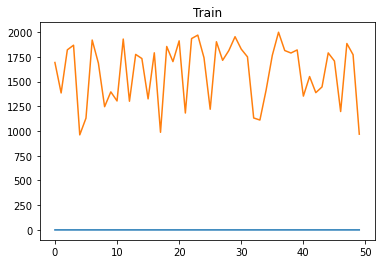

2/2 [==============================] - 2s 6ms/step


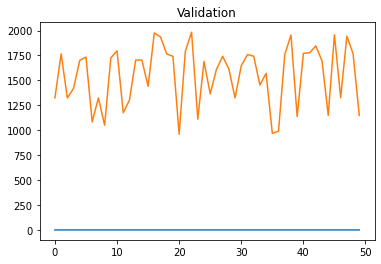

3/3 [==============================] - 0s 67ms/step


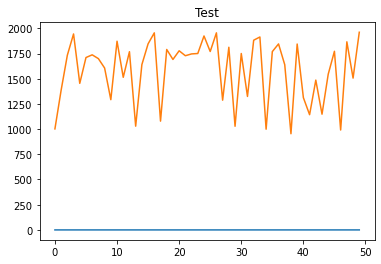

3/3 [==============================] - 0s 5ms/step


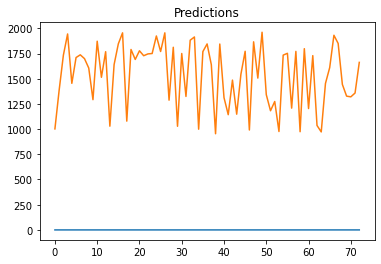

In [15]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [16]:
auto_gru_mse

2456840.3060471597

### LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2527898.2500 - root_mean_squared_error: 1589.9365  

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 51s 5s/step - loss: 2527898.2500 - root_mean_squared_error: 1589.9365 - val_loss: 2504937.5000 - val_root_mean_squared_error: 1582.6995
Epoch 2/30
6/8 [=====================>........] - ETA: 0s - loss: 2534201.7500 - root_mean_squared_error: 1591.9176

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2527899.7500 - root_mean_squared_error: 1589.9370 - val_loss: 2504866.7500 - val_root_mean_squared_error: 1582.6771
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 2552388.2500 - root_mean_squared_error: 1597.6195

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2527668.7500 - root_mean_squared_error: 1589.8644 - val_loss: 2504794.2500 - val_root_mean_squared_error: 1582.6541
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 2529892.0000 - root_mean_squared_error: 1590.5635

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2527668.0000 - root_mean_squared_error: 1589.8641 - val_loss: 2504715.0000 - val_root_mean_squared_error: 1582.6292
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 2551974.2500 - root_mean_squared_error: 1597.4900

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2527557.0000 - root_mean_squared_error: 1589.8292 - val_loss: 2504606.0000 - val_root_mean_squared_error: 1582.5947
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 2498893.2500 - root_mean_squared_error: 1580.7888

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2527379.7500 - root_mean_squared_error: 1589.7734 - val_loss: 2504363.2500 - val_root_mean_squared_error: 1582.5181
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 2493927.7500 - root_mean_squared_error: 1579.2174

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2527179.0000 - root_mean_squared_error: 1589.7103 - val_loss: 2504054.2500 - val_root_mean_squared_error: 1582.4203
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 2522170.2500 - root_mean_squared_error: 1588.1342

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2526606.7500 - root_mean_squared_error: 1589.5304 - val_loss: 2503947.5000 - val_root_mean_squared_error: 1582.3866
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2526675.0000 - root_mean_squared_error: 1589.5519

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2526675.0000 - root_mean_squared_error: 1589.5519 - val_loss: 2503328.0000 - val_root_mean_squared_error: 1582.1909
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2526394.7500 - root_mean_squared_error: 1589.4636

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2526394.7500 - root_mean_squared_error: 1589.4636 - val_loss: 2503047.7500 - val_root_mean_squared_error: 1582.1023
Epoch 11/30
5/8 [=================>............] - ETA: 0s - loss: 2478715.5000 - root_mean_squared_error: 1574.3937

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2526001.2500 - root_mean_squared_error: 1589.3398 - val_loss: 2502862.2500 - val_root_mean_squared_error: 1582.0437
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 2523310.5000 - root_mean_squared_error: 1588.4932

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2525693.5000 - root_mean_squared_error: 1589.2430 - val_loss: 2502576.2500 - val_root_mean_squared_error: 1581.9532
Epoch 13/30
5/8 [=================>............] - ETA: 0s - loss: 2581337.2500 - root_mean_squared_error: 1606.6541

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2525455.0000 - root_mean_squared_error: 1589.1680 - val_loss: 2502076.7500 - val_root_mean_squared_error: 1581.7954
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 2501055.5000 - root_mean_squared_error: 1581.4725

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2525182.5000 - root_mean_squared_error: 1589.0823 - val_loss: 2501884.2500 - val_root_mean_squared_error: 1581.7346
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 2508600.2500 - root_mean_squared_error: 1583.8561

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2524881.5000 - root_mean_squared_error: 1588.9875 - val_loss: 2501743.2500 - val_root_mean_squared_error: 1581.6899
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 2690493.0000 - root_mean_squared_error: 1640.2722

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2524796.7500 - root_mean_squared_error: 1588.9609 - val_loss: 2501603.7500 - val_root_mean_squared_error: 1581.6459
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 2193336.0000 - root_mean_squared_error: 1480.9916

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 2524828.7500 - root_mean_squared_error: 1588.9709 - val_loss: 2501432.2500 - val_root_mean_squared_error: 1581.5917
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 2556443.2500 - root_mean_squared_error: 1598.8882

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2524508.5000 - root_mean_squared_error: 1588.8702 - val_loss: 2501007.0000 - val_root_mean_squared_error: 1581.4573
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 2528177.5000 - root_mean_squared_error: 1590.0244

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2523809.2500 - root_mean_squared_error: 1588.6501 - val_loss: 2500671.0000 - val_root_mean_squared_error: 1581.3510
Epoch 20/30
6/8 [=====================>........] - ETA: 0s - loss: 2516479.5000 - root_mean_squared_error: 1586.3416

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2523844.5000 - root_mean_squared_error: 1588.6613 - val_loss: 2500490.0000 - val_root_mean_squared_error: 1581.2938
Epoch 21/30
5/8 [=================>............] - ETA: 0s - loss: 2540370.0000 - root_mean_squared_error: 1593.8538

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2523768.5000 - root_mean_squared_error: 1588.6373 - val_loss: 2500146.7500 - val_root_mean_squared_error: 1581.1852
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2523246.0000 - root_mean_squared_error: 1588.4729

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 2523246.0000 - root_mean_squared_error: 1588.4729 - val_loss: 2499936.2500 - val_root_mean_squared_error: 1581.1187
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 2499828.5000 - root_mean_squared_error: 1581.0846

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2523128.2500 - root_mean_squared_error: 1588.4358 - val_loss: 2499788.7500 - val_root_mean_squared_error: 1581.0720
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2526902.5000 - root_mean_squared_error: 1589.6234

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2522861.7500 - root_mean_squared_error: 1588.3519 - val_loss: 2499641.0000 - val_root_mean_squared_error: 1581.0253
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2514303.5000 - root_mean_squared_error: 1585.6555

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2522981.7500 - root_mean_squared_error: 1588.3896 - val_loss: 2499495.7500 - val_root_mean_squared_error: 1580.9795
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 2659503.5000 - root_mean_squared_error: 1630.7985

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2522609.5000 - root_mean_squared_error: 1588.2725 - val_loss: 2499349.7500 - val_root_mean_squared_error: 1580.9332
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2522456.7500 - root_mean_squared_error: 1588.2244

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2522456.7500 - root_mean_squared_error: 1588.2244 - val_loss: 2499203.2500 - val_root_mean_squared_error: 1580.8868
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2522079.7500 - root_mean_squared_error: 1588.1057

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2522079.7500 - root_mean_squared_error: 1588.1057 - val_loss: 2499056.5000 - val_root_mean_squared_error: 1580.8405
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 2522052.2500 - root_mean_squared_error: 1588.0970

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2522052.2500 - root_mean_squared_error: 1588.0970 - val_loss: 2498908.2500 - val_root_mean_squared_error: 1580.7936
Epoch 30/30
6/8 [=====================>........] - ETA: 0s - loss: 2508857.2500 - root_mean_squared_error: 1583.9373

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 6ms/step


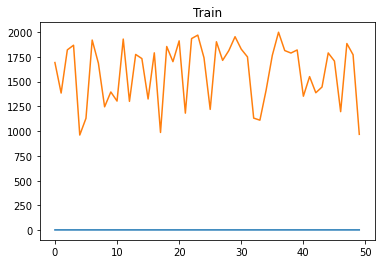

2/2 [==============================] - 2s 8ms/step


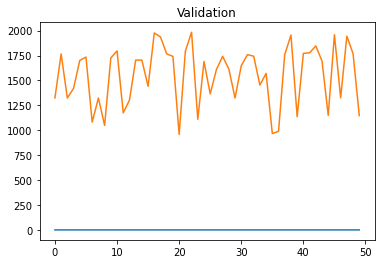

3/3 [==============================] - 0s 5ms/step


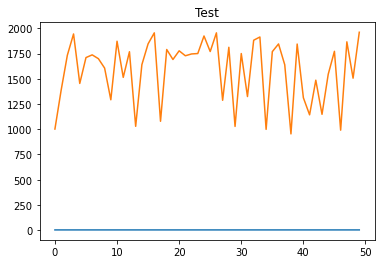

3/3 [==============================] - 0s 27ms/step


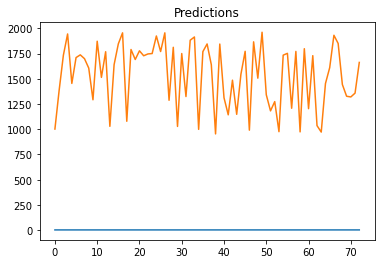

In [17]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [18]:
auto_lstm_mse

2446975.555781124

### RNN

Epoch 1/30
3/8 [==========>...................] - ETA: 0s - loss: 2578989.2500 - root_mean_squared_error: 1605.9232 INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 15s 1s/step - loss: 2537361.5000 - root_mean_squared_error: 1592.9098 - val_loss: 2513692.7500 - val_root_mean_squared_error: 1585.4629
Epoch 2/30
6/8 [=====================>........] - ETA: 0s - loss: 2574181.0000 - root_mean_squared_error: 1604.4254INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 842ms/step - loss: 2536748.2500 - root_mean_squared_error: 1592.7173 - val_loss: 2513532.7500 - val_root_mean_squared_error: 1585.4125
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2537174.7500 - root_mean_squared_error: 1592.8512INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2537174.7500 - root_mean_squared_error: 1592.8512 - val_loss: 2513369.5000 - val_root_mean_squared_error: 1585.3610
Epoch 4/30
5/8 [=================>............] - ETA: 0s - loss: 2589707.7500 - root_mean_squared_error: 1609.2568INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2536194.7500 - root_mean_squared_error: 1592.5435 - val_loss: 2513184.0000 - val_root_mean_squared_error: 1585.3025
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 2544695.7500 - root_mean_squared_error: 1595.2102INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 646ms/step - loss: 2536695.2500 - root_mean_squared_error: 1592.7006 - val_loss: 2512720.2500 - val_root_mean_squared_error: 1585.1562
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 2552070.2500 - root_mean_squared_error: 1597.5200INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 617ms/step - loss: 2535753.2500 - root_mean_squared_error: 1592.4049 - val_loss: 2511535.5000 - val_root_mean_squared_error: 1584.7825
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 2464868.5000 - root_mean_squared_error: 1569.9900INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2534577.2500 - root_mean_squared_error: 1592.0355 - val_loss: 2511261.7500 - val_root_mean_squared_error: 1584.6962
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 2508527.2500 - root_mean_squared_error: 1583.8331INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2534643.0000 - root_mean_squared_error: 1592.0563 - val_loss: 2510591.7500 - val_root_mean_squared_error: 1584.4847
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 2645219.2500 - root_mean_squared_error: 1626.4130INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 628ms/step - loss: 2533338.0000 - root_mean_squared_error: 1591.6464 - val_loss: 2510194.0000 - val_root_mean_squared_error: 1584.3591
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2533679.5000 - root_mean_squared_error: 1591.7535INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 935ms/step - loss: 2533679.5000 - root_mean_squared_error: 1591.7535 - val_loss: 2510026.7500 - val_root_mean_squared_error: 1584.3065
Epoch 11/30
2/8 [======>.......................] - ETA: 0s - loss: 2478913.5000 - root_mean_squared_error: 1574.4565 INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 1s/step - loss: 2533734.5000 - root_mean_squared_error: 1591.7709 - val_loss: 2509867.5000 - val_root_mean_squared_error: 1584.2561
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2533414.5000 - root_mean_squared_error: 1591.6703INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2533414.5000 - root_mean_squared_error: 1591.6703 - val_loss: 2509706.5000 - val_root_mean_squared_error: 1584.2053
Epoch 13/30
6/8 [=====================>........] - ETA: 0s - loss: 2542375.0000 - root_mean_squared_error: 1594.4827INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 921ms/step - loss: 2533287.0000 - root_mean_squared_error: 1591.6302 - val_loss: 2509546.7500 - val_root_mean_squared_error: 1584.1550
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 2500607.5000 - root_mean_squared_error: 1581.3309INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 923ms/step - loss: 2532313.5000 - root_mean_squared_error: 1591.3245 - val_loss: 2509387.0000 - val_root_mean_squared_error: 1584.1045
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 2531294.0000 - root_mean_squared_error: 1591.0040INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2532800.2500 - root_mean_squared_error: 1591.4774 - val_loss: 2509227.5000 - val_root_mean_squared_error: 1584.0541
Epoch 16/30
6/8 [=====================>........] - ETA: 0s - loss: 2512471.0000 - root_mean_squared_error: 1585.0776INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2532179.0000 - root_mean_squared_error: 1591.2822 - val_loss: 2509067.2500 - val_root_mean_squared_error: 1584.0035
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 2549833.2500 - root_mean_squared_error: 1596.8197INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 863ms/step - loss: 2532366.5000 - root_mean_squared_error: 1591.3411 - val_loss: 2508907.0000 - val_root_mean_squared_error: 1583.9530
Epoch 18/30
5/8 [=================>............] - ETA: 0s - loss: 2561946.7500 - root_mean_squared_error: 1600.6083INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 900ms/step - loss: 2532083.0000 - root_mean_squared_error: 1591.2521 - val_loss: 2508748.7500 - val_root_mean_squared_error: 1583.9030
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 2560118.7500 - root_mean_squared_error: 1600.0371INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2532380.0000 - root_mean_squared_error: 1591.3453 - val_loss: 2508589.2500 - val_root_mean_squared_error: 1583.8527
Epoch 20/30
4/8 [==============>...............] - ETA: 0s - loss: 2472024.2500 - root_mean_squared_error: 1572.2672INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2531667.0000 - root_mean_squared_error: 1591.1213 - val_loss: 2508429.7500 - val_root_mean_squared_error: 1583.8024
Epoch 21/30
6/8 [=====================>........] - ETA: 0s - loss: 2478099.7500 - root_mean_squared_error: 1574.1981INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2531008.0000 - root_mean_squared_error: 1590.9142 - val_loss: 2508270.5000 - val_root_mean_squared_error: 1583.7521
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2531617.5000 - root_mean_squared_error: 1591.1057INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2531617.5000 - root_mean_squared_error: 1591.1057 - val_loss: 2508110.5000 - val_root_mean_squared_error: 1583.7015
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2531525.0000 - root_mean_squared_error: 1591.0767INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2531525.0000 - root_mean_squared_error: 1591.0767 - val_loss: 2507950.2500 - val_root_mean_squared_error: 1583.6509
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2505962.7500 - root_mean_squared_error: 1583.0233INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2531015.0000 - root_mean_squared_error: 1590.9164 - val_loss: 2507791.0000 - val_root_mean_squared_error: 1583.6006
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 2412171.5000 - root_mean_squared_error: 1553.1167INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2530821.2500 - root_mean_squared_error: 1590.8555 - val_loss: 2507630.2500 - val_root_mean_squared_error: 1583.5499
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 2354247.2500 - root_mean_squared_error: 1534.3556INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2530695.5000 - root_mean_squared_error: 1590.8160 - val_loss: 2507471.0000 - val_root_mean_squared_error: 1583.4996
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 2535112.7500 - root_mean_squared_error: 1592.2037INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2530375.0000 - root_mean_squared_error: 1590.7152 - val_loss: 2507311.2500 - val_root_mean_squared_error: 1583.4492
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2530630.0000 - root_mean_squared_error: 1590.7954INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 856ms/step - loss: 2530630.0000 - root_mean_squared_error: 1590.7954 - val_loss: 2507151.0000 - val_root_mean_squared_error: 1583.3984
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 2386947.2500 - root_mean_squared_error: 1544.9749INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 629ms/step - loss: 2530015.2500 - root_mean_squared_error: 1590.6022 - val_loss: 2506991.5000 - val_root_mean_squared_error: 1583.3481
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2530488.5000 - root_mean_squared_error: 1590.7510INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 5ms/step


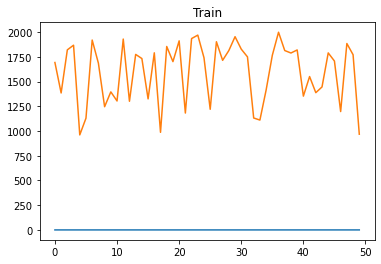

2/2 [==============================] - 0s 12ms/step


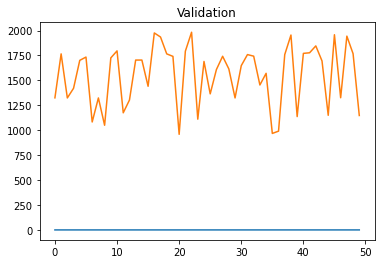

3/3 [==============================] - 0s 5ms/step


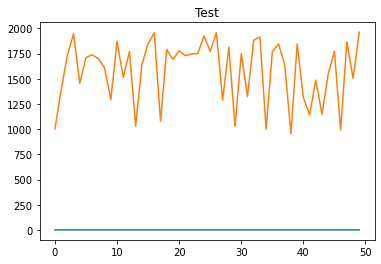

3/3 [==============================] - 0s 7ms/step


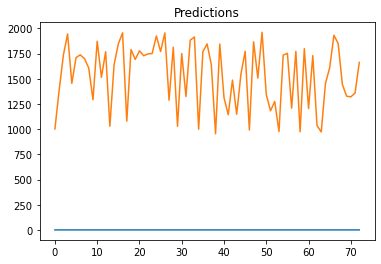

In [19]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [20]:
auto_rnn_mse

2454933.648943964

# Moving Average with Encoder

### CNN

Epoch 1/10
6/8 [=====================>........] - ETA: 0s - loss: 1459535.6250 - root_mean_squared_error: 1208.1124

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 667ms/step - loss: 1412351.2500 - root_mean_squared_error: 1188.4238 - val_loss: 1492566.6250 - val_root_mean_squared_error: 1221.7064
Epoch 2/10
6/8 [=====================>........] - ETA: 0s - loss: 1377658.6250 - root_mean_squared_error: 1173.7371

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 468ms/step - loss: 1335292.8750 - root_mean_squared_error: 1155.5487 - val_loss: 1171966.8750 - val_root_mean_squared_error: 1082.5742
Epoch 3/10
5/8 [=================>............] - ETA: 0s - loss: 971650.3750 - root_mean_squared_error: 985.7233

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 496ms/step - loss: 950138.5000 - root_mean_squared_error: 974.7505 - val_loss: 888291.0625 - val_root_mean_squared_error: 942.4919
Epoch 4/10
1/8 [==>...........................] - ETA: 0s - loss: 891213.2500 - root_mean_squared_error: 944.0409

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 688ms/step - loss: 856060.3750 - root_mean_squared_error: 925.2353 - val_loss: 645154.6250 - val_root_mean_squared_error: 803.2152
Epoch 5/10
8/8 [==============================] - ETA: 0s - loss: 628695.0000 - root_mean_squared_error: 792.9029

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 11s 2s/step - loss: 628695.0000 - root_mean_squared_error: 792.9029 - val_loss: 449144.0000 - val_root_mean_squared_error: 670.1821
Epoch 6/10
7/8 [=========================>....] - ETA: 0s - loss: 512095.4375 - root_mean_squared_error: 715.6085

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 434ms/step - loss: 508983.0000 - root_mean_squared_error: 713.4304 - val_loss: 296686.4688 - val_root_mean_squared_error: 544.6893
Epoch 7/10
5/8 [=================>............] - ETA: 0s - loss: 365584.0625 - root_mean_squared_error: 604.6355

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 376ms/step - loss: 374728.0625 - root_mean_squared_error: 612.1503 - val_loss: 186129.9375 - val_root_mean_squared_error: 431.4278
Epoch 8/10
5/8 [=================>............] - ETA: 0s - loss: 275697.1875 - root_mean_squared_error: 525.0687

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 422ms/step - loss: 271464.0938 - root_mean_squared_error: 521.0222 - val_loss: 109916.6484 - val_root_mean_squared_error: 331.5368
Epoch 9/10
7/8 [=========================>....] - ETA: 0s - loss: 303419.4375 - root_mean_squared_error: 550.8352

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 534ms/step - loss: 298273.5312 - root_mean_squared_error: 546.1442 - val_loss: 63522.4570 - val_root_mean_squared_error: 252.0366
Epoch 10/10
8/8 [==============================] - ETA: 0s - loss: 249998.2500 - root_mean_squared_error: 499.9983

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 14ms/step


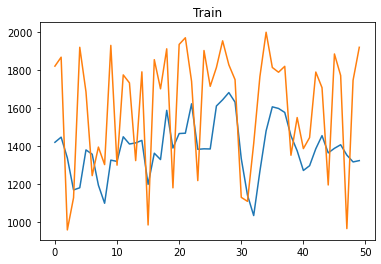

2/2 [==============================] - 0s 6ms/step


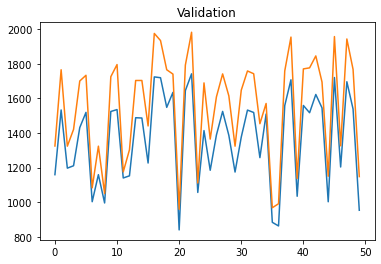

3/3 [==============================] - 0s 5ms/step


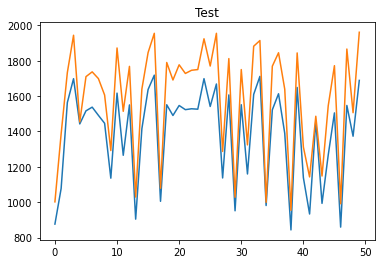

3/3 [==============================] - 0s 18ms/step


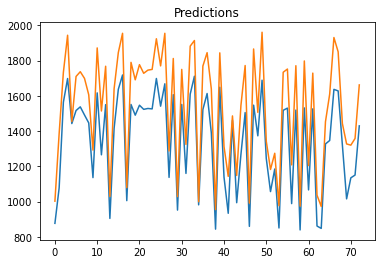

In [21]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [22]:
mavg_auto_cnn_mse

41739.40829352269

### RNN

Epoch 1/10
1/8 [==>...........................] - ETA: 42s - loss: 2570495.2500 - root_mean_squared_error: 1603.2764INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 19s 2s/step - loss: 2530323.0000 - root_mean_squared_error: 1590.6989 - val_loss: 2505735.7500 - val_root_mean_squared_error: 1582.9515
Epoch 2/10
5/8 [=================>............] - ETA: 0s - loss: 2510264.0000 - root_mean_squared_error: 1584.3812INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2529983.0000 - root_mean_squared_error: 1590.5920 - val_loss: 2505575.2500 - val_root_mean_squared_error: 1582.9009
Epoch 3/10
5/8 [=================>............] - ETA: 0s - loss: 2552318.5000 - root_mean_squared_error: 1597.5978INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 3s 484ms/step - loss: 2530535.2500 - root_mean_squared_error: 1590.7656 - val_loss: 2505415.5000 - val_root_mean_squared_error: 1582.8505
Epoch 4/10
7/8 [=========================>....] - ETA: 0s - loss: 2524355.5000 - root_mean_squared_error: 1588.8220INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 5s 685ms/step - loss: 2529639.5000 - root_mean_squared_error: 1590.4840 - val_loss: 2505257.5000 - val_root_mean_squared_error: 1582.8005
Epoch 5/10
1/8 [==>...........................] - ETA: 0s - loss: 2698456.5000 - root_mean_squared_error: 1642.6979INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 877ms/step - loss: 2529592.5000 - root_mean_squared_error: 1590.4692 - val_loss: 2505097.0000 - val_root_mean_squared_error: 1582.7499
Epoch 6/10
5/8 [=================>............] - ETA: 0s - loss: 2572543.2500 - root_mean_squared_error: 1603.9149INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 814ms/step - loss: 2529371.5000 - root_mean_squared_error: 1590.3998 - val_loss: 2504938.0000 - val_root_mean_squared_error: 1582.6996
Epoch 7/10
8/8 [==============================] - ETA: 0s - loss: 2529499.0000 - root_mean_squared_error: 1590.4398INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 5s 752ms/step - loss: 2529499.0000 - root_mean_squared_error: 1590.4398 - val_loss: 2504780.2500 - val_root_mean_squared_error: 1582.6497
Epoch 8/10
7/8 [=========================>....] - ETA: 0s - loss: 2536712.7500 - root_mean_squared_error: 1592.7061INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 1000ms/step - loss: 2529214.5000 - root_mean_squared_error: 1590.3505 - val_loss: 2504622.0000 - val_root_mean_squared_error: 1582.5997
Epoch 9/10
1/8 [==>...........................] - ETA: 0s - loss: 2515352.7500 - root_mean_squared_error: 1585.9863INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2529100.2500 - root_mean_squared_error: 1590.3145 - val_loss: 2504464.0000 - val_root_mean_squared_error: 1582.5498
Epoch 10/10
5/8 [=================>............] - ETA: 0s - loss: 2510881.2500 - root_mean_squared_error: 1584.5760INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step


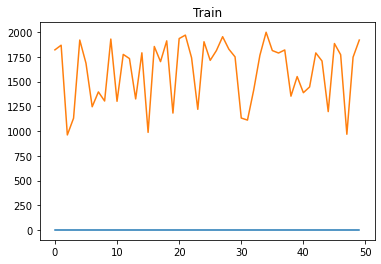

2/2 [==============================] - 1s 13ms/step


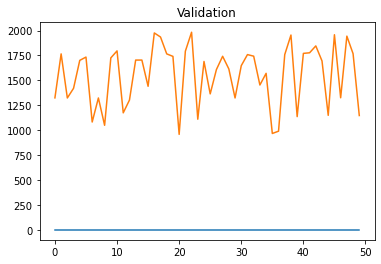

3/3 [==============================] - 0s 5ms/step


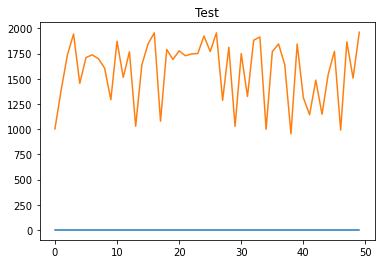

3/3 [==============================] - 0s 4ms/step


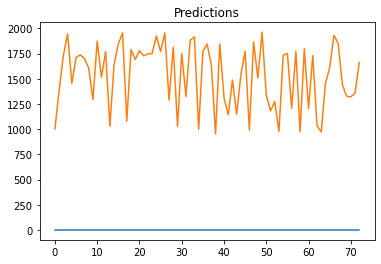

In [23]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [24]:
mavg_auto_rnn_mse

2452441.861796268

### GRU

Epoch 1/10
6/8 [=====================>........] - ETA: 0s - loss: 2526151.5000 - root_mean_squared_error: 1589.3872  

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 36s 4s/step - loss: 2528324.5000 - root_mean_squared_error: 1590.0706 - val_loss: 2503696.5000 - val_root_mean_squared_error: 1582.3074
Epoch 2/10
5/8 [=================>............] - ETA: 0s - loss: 2543906.0000 - root_mean_squared_error: 1594.9626

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2527970.7500 - root_mean_squared_error: 1589.9594 - val_loss: 2503594.7500 - val_root_mean_squared_error: 1582.2751
Epoch 3/10
6/8 [=====================>........] - ETA: 0s - loss: 2527826.7500 - root_mean_squared_error: 1589.9141

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2528072.7500 - root_mean_squared_error: 1589.9915 - val_loss: 2503507.5000 - val_root_mean_squared_error: 1582.2476
Epoch 4/10
5/8 [=================>............] - ETA: 0s - loss: 2539080.7500 - root_mean_squared_error: 1593.4493

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2527998.5000 - root_mean_squared_error: 1589.9681 - val_loss: 2503424.0000 - val_root_mean_squared_error: 1582.2212
Epoch 5/10
6/8 [=====================>........] - ETA: 0s - loss: 2501376.7500 - root_mean_squared_error: 1581.5741

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2527715.7500 - root_mean_squared_error: 1589.8792 - val_loss: 2503334.0000 - val_root_mean_squared_error: 1582.1927
Epoch 6/10
8/8 [==============================] - ETA: 0s - loss: 2527830.2500 - root_mean_squared_error: 1589.9152

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2527830.2500 - root_mean_squared_error: 1589.9152 - val_loss: 2503202.0000 - val_root_mean_squared_error: 1582.1511
Epoch 7/10
6/8 [=====================>........] - ETA: 0s - loss: 2507630.2500 - root_mean_squared_error: 1583.5499

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2527603.5000 - root_mean_squared_error: 1589.8439 - val_loss: 2502892.7500 - val_root_mean_squared_error: 1582.0533
Epoch 8/10
7/8 [=========================>....] - ETA: 0s - loss: 2532726.0000 - root_mean_squared_error: 1591.4541

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2527198.0000 - root_mean_squared_error: 1589.7163 - val_loss: 2502597.5000 - val_root_mean_squared_error: 1581.9600
Epoch 9/10
8/8 [==============================] - ETA: 0s - loss: 2527069.0000 - root_mean_squared_error: 1589.6758

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2527069.0000 - root_mean_squared_error: 1589.6758 - val_loss: 2502482.0000 - val_root_mean_squared_error: 1581.9235
Epoch 10/10
7/8 [=========================>....] - ETA: 0s - loss: 2518599.2500 - root_mean_squared_error: 1587.0095

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 11s 8ms/step


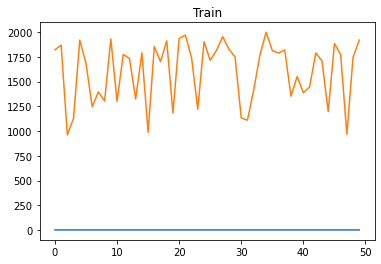

2/2 [==============================] - 3s 10ms/step


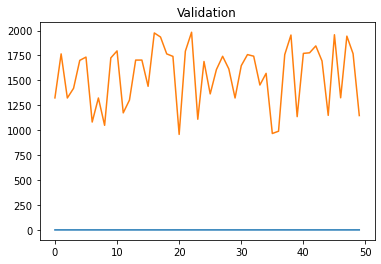

3/3 [==============================] - 0s 5ms/step


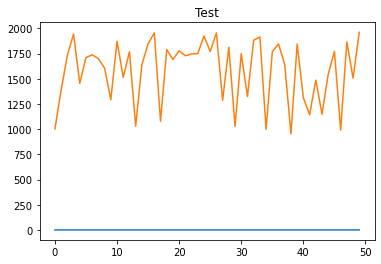

3/3 [==============================] - 0s 6ms/step


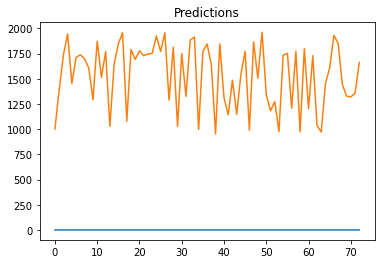

In [25]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [26]:
mavg_auto_gru_mse

2450418.0276564076

### LSTM

Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 2534015.5000 - root_mean_squared_error: 1591.8591

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 51s 5s/step - loss: 2534015.5000 - root_mean_squared_error: 1591.8591 - val_loss: 2509376.0000 - val_root_mean_squared_error: 1584.1010
Epoch 2/10
4/8 [==============>...............] - ETA: 0s - loss: 2578270.0000 - root_mean_squared_error: 1605.6992

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2533716.7500 - root_mean_squared_error: 1591.7653 - val_loss: 2509038.0000 - val_root_mean_squared_error: 1583.9943
Epoch 3/10
7/8 [=========================>....] - ETA: 0s - loss: 2529236.0000 - root_mean_squared_error: 1590.3572

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2533468.5000 - root_mean_squared_error: 1591.6873 - val_loss: 2508859.7500 - val_root_mean_squared_error: 1583.9380
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 2533206.2500 - root_mean_squared_error: 1591.6050

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 2533206.2500 - root_mean_squared_error: 1591.6050 - val_loss: 2508768.2500 - val_root_mean_squared_error: 1583.9092
Epoch 5/10
8/8 [==============================] - ETA: 0s - loss: 2533091.2500 - root_mean_squared_error: 1591.5688

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 25s 3s/step - loss: 2533091.2500 - root_mean_squared_error: 1591.5688 - val_loss: 2508698.7500 - val_root_mean_squared_error: 1583.8872
Epoch 6/10
6/8 [=====================>........] - ETA: 0s - loss: 2476890.5000 - root_mean_squared_error: 1573.8140

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2532988.0000 - root_mean_squared_error: 1591.5364 - val_loss: 2508623.7500 - val_root_mean_squared_error: 1583.8635
Epoch 7/10
6/8 [=====================>........] - ETA: 0s - loss: 2571500.5000 - root_mean_squared_error: 1603.5898

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 2533032.5000 - root_mean_squared_error: 1591.5503 - val_loss: 2508471.0000 - val_root_mean_squared_error: 1583.8153
Epoch 8/10
5/8 [=================>............] - ETA: 0s - loss: 2500674.0000 - root_mean_squared_error: 1581.3519

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 25s 3s/step - loss: 2532817.5000 - root_mean_squared_error: 1591.4828 - val_loss: 2508093.5000 - val_root_mean_squared_error: 1583.6962
Epoch 9/10
7/8 [=========================>....] - ETA: 0s - loss: 2531690.0000 - root_mean_squared_error: 1591.1285

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 2532480.5000 - root_mean_squared_error: 1591.3770 - val_loss: 2507882.0000 - val_root_mean_squared_error: 1583.6294
Epoch 10/10
7/8 [=========================>....] - ETA: 0s - loss: 2520838.5000 - root_mean_squared_error: 1587.7148

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 7s 91ms/step


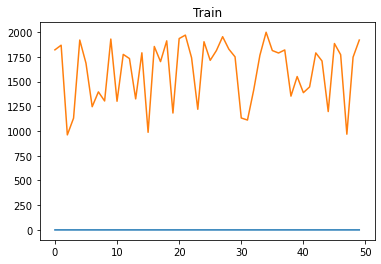

2/2 [==============================] - 2s 36ms/step


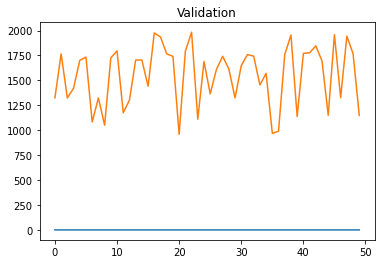

3/3 [==============================] - 0s 9ms/step


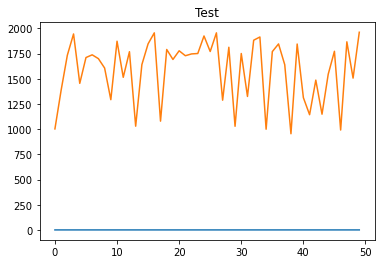

3/3 [==============================] - 0s 8ms/step


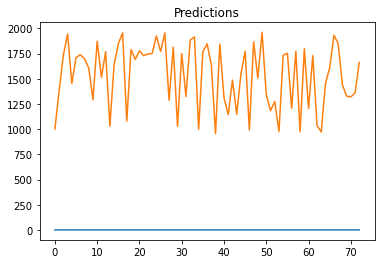

In [27]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [28]:
mavg_auto_lstm_mse

2455887.8721161718

# Hybrid

## General

### CNN LSTM

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 2542464.7500 - root_mean_squared_error: 1594.5109

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 127s 11s/step - loss: 2531438.2500 - root_mean_squared_error: 1591.0494 - val_loss: 2507716.5000 - val_root_mean_squared_error: 1583.5771
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2530754.0000 - root_mean_squared_error: 1590.8344

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 61s 9s/step - loss: 2530754.0000 - root_mean_squared_error: 1590.8344 - val_loss: 2507233.0000 - val_root_mean_squared_error: 1583.4244
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2530278.7500 - root_mean_squared_error: 1590.6849

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 72s 10s/step - loss: 2530278.7500 - root_mean_squared_error: 1590.6849 - val_loss: 2506772.7500 - val_root_mean_squared_error: 1583.2791
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2529818.2500 - root_mean_squared_error: 1590.5403

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 68s 10s/step - loss: 2529818.2500 - root_mean_squared_error: 1590.5403 - val_loss: 2506303.2500 - val_root_mean_squared_error: 1583.1309
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 2526402.2500 - root_mean_squared_error: 1589.4661

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 67s 9s/step - loss: 2529303.5000 - root_mean_squared_error: 1590.3784 - val_loss: 2505754.5000 - val_root_mean_squared_error: 1582.9575
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 2528352.7500 - root_mean_squared_error: 1590.0795

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 74s 11s/step - loss: 2528612.0000 - root_mean_squared_error: 1590.1610 - val_loss: 2504842.0000 - val_root_mean_squared_error: 1582.6693
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 2519622.0000 - root_mean_squared_error: 1587.3317

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 74s 11s/step - loss: 2527874.0000 - root_mean_squared_error: 1589.9290 - val_loss: 2504314.7500 - val_root_mean_squared_error: 1582.5027
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2527340.0000 - root_mean_squared_error: 1589.7610

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 86s 11s/step - loss: 2527340.0000 - root_mean_squared_error: 1589.7610 - val_loss: 2503707.0000 - val_root_mean_squared_error: 1582.3107
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2526691.2500 - root_mean_squared_error: 1589.5569

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 88s 12s/step - loss: 2526691.2500 - root_mean_squared_error: 1589.5569 - val_loss: 2502927.2500 - val_root_mean_squared_error: 1582.0642
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2512526.0000 - root_mean_squared_error: 1585.0950

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 83s 12s/step - loss: 2525895.5000 - root_mean_squared_error: 1589.3066 - val_loss: 2502267.0000 - val_root_mean_squared_error: 1581.8556
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2525216.2500 - root_mean_squared_error: 1589.0929

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 101s 14s/step - loss: 2525216.2500 - root_mean_squared_error: 1589.0929 - val_loss: 2501618.2500 - val_root_mean_squared_error: 1581.6505
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 2534134.2500 - root_mean_squared_error: 1591.8965

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 70s 10s/step - loss: 2524656.5000 - root_mean_squared_error: 1588.9167 - val_loss: 2501147.0000 - val_root_mean_squared_error: 1581.5015
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2524155.7500 - root_mean_squared_error: 1588.7592

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 69s 10s/step - loss: 2524155.7500 - root_mean_squared_error: 1588.7592 - val_loss: 2500511.5000 - val_root_mean_squared_error: 1581.3005
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2523509.2500 - root_mean_squared_error: 1588.5557

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 83s 12s/step - loss: 2523509.2500 - root_mean_squared_error: 1588.5557 - val_loss: 2499941.5000 - val_root_mean_squared_error: 1581.1204
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2522963.0000 - root_mean_squared_error: 1588.3838

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 73s 10s/step - loss: 2522963.0000 - root_mean_squared_error: 1588.3838 - val_loss: 2499427.5000 - val_root_mean_squared_error: 1580.9578
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2522447.0000 - root_mean_squared_error: 1588.2213

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 75s 11s/step - loss: 2522447.0000 - root_mean_squared_error: 1588.2213 - val_loss: 2498912.5000 - val_root_mean_squared_error: 1580.7949
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2521941.0000 - root_mean_squared_error: 1588.0620

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 81s 11s/step - loss: 2521941.0000 - root_mean_squared_error: 1588.0620 - val_loss: 2498419.2500 - val_root_mean_squared_error: 1580.6389
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2521454.2500 - root_mean_squared_error: 1587.9088

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 79s 11s/step - loss: 2521454.2500 - root_mean_squared_error: 1587.9088 - val_loss: 2497935.5000 - val_root_mean_squared_error: 1580.4858
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2520971.0000 - root_mean_squared_error: 1587.7566

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 75s 11s/step - loss: 2520971.0000 - root_mean_squared_error: 1587.7566 - val_loss: 2497448.0000 - val_root_mean_squared_error: 1580.3317
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2520412.0000 - root_mean_squared_error: 1587.5806

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 73s 10s/step - loss: 2520412.0000 - root_mean_squared_error: 1587.5806 - val_loss: 2496714.5000 - val_root_mean_squared_error: 1580.0995
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2519744.0000 - root_mean_squared_error: 1587.3701

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 97s 14s/step - loss: 2519744.0000 - root_mean_squared_error: 1587.3701 - val_loss: 2496221.7500 - val_root_mean_squared_error: 1579.9437
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2512161.5000 - root_mean_squared_error: 1584.9800

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 73s 10s/step - loss: 2519243.2500 - root_mean_squared_error: 1587.2124 - val_loss: 2495720.7500 - val_root_mean_squared_error: 1579.7850
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 2523916.5000 - root_mean_squared_error: 1588.6838

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 68s 10s/step - loss: 2518764.5000 - root_mean_squared_error: 1587.0616 - val_loss: 2495266.2500 - val_root_mean_squared_error: 1579.6412
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2518312.7500 - root_mean_squared_error: 1586.9193

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 83s 12s/step - loss: 2518312.7500 - root_mean_squared_error: 1586.9193 - val_loss: 2494824.5000 - val_root_mean_squared_error: 1579.5013
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2510192.5000 - root_mean_squared_error: 1584.3586

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 102s 14s/step - loss: 2517872.5000 - root_mean_squared_error: 1586.7805 - val_loss: 2494382.2500 - val_root_mean_squared_error: 1579.3613
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2493589.5000 - root_mean_squared_error: 1579.1104

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 56s 8s/step - loss: 2517428.0000 - root_mean_squared_error: 1586.6405 - val_loss: 2493933.0000 - val_root_mean_squared_error: 1579.2191
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2516975.7500 - root_mean_squared_error: 1586.4979

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 74s 11s/step - loss: 2516975.7500 - root_mean_squared_error: 1586.4979 - val_loss: 2493473.0000 - val_root_mean_squared_error: 1579.0735
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2516512.2500 - root_mean_squared_error: 1586.3519

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 72s 10s/step - loss: 2516512.2500 - root_mean_squared_error: 1586.3519 - val_loss: 2493009.0000 - val_root_mean_squared_error: 1578.9266
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 2516046.2500 - root_mean_squared_error: 1586.2050

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 76s 11s/step - loss: 2516046.2500 - root_mean_squared_error: 1586.2050 - val_loss: 2492540.7500 - val_root_mean_squared_error: 1578.7782
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2515575.5000 - root_mean_squared_error: 1586.0566

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 4s 23ms/step


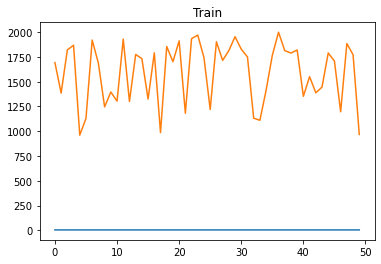

2/2 [==============================] - 17s 16ms/step


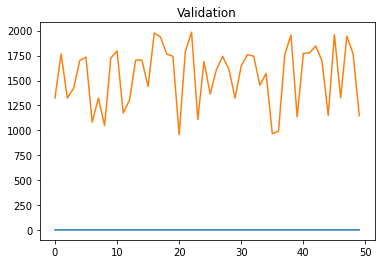

3/3 [==============================] - 1s 81ms/step


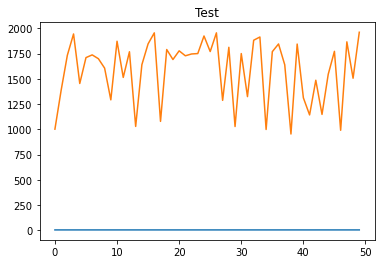

3/3 [==============================] - 0s 9ms/step


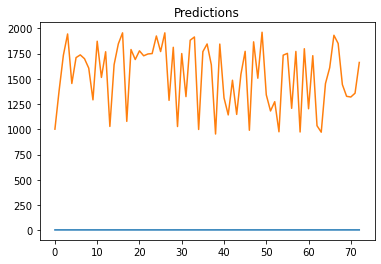

In [29]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [30]:
hybrid_cnn_lstm_mse

2440370.5920548625

### RNN LSTM

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 2522255.2500 - root_mean_squared_error: 1588.1610

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 101s 9s/step - loss: 2531776.7500 - root_mean_squared_error: 1591.1558 - val_loss: 2508189.2500 - val_root_mean_squared_error: 1583.7264
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 2522824.2500 - root_mean_squared_error: 1588.3401

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2531191.2500 - root_mean_squared_error: 1590.9718 - val_loss: 2507607.7500 - val_root_mean_squared_error: 1583.5427
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2530612.2500 - root_mean_squared_error: 1590.7898

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 2530612.2500 - root_mean_squared_error: 1590.7898 - val_loss: 2507029.5000 - val_root_mean_squared_error: 1583.3602
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2530031.5000 - root_mean_squared_error: 1590.6073

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 46s 7s/step - loss: 2530031.5000 - root_mean_squared_error: 1590.6073 - val_loss: 2506449.0000 - val_root_mean_squared_error: 1583.1769
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2529449.7500 - root_mean_squared_error: 1590.4244

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 2529449.7500 - root_mean_squared_error: 1590.4244 - val_loss: 2505856.0000 - val_root_mean_squared_error: 1582.9896
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 2528997.5000 - root_mean_squared_error: 1590.2822

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 50s 7s/step - loss: 2528851.7500 - root_mean_squared_error: 1590.2363 - val_loss: 2505248.2500 - val_root_mean_squared_error: 1582.7976
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2528233.5000 - root_mean_squared_error: 1590.0420

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 2528233.5000 - root_mean_squared_error: 1590.0420 - val_loss: 2504620.2500 - val_root_mean_squared_error: 1582.5992
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 2530856.5000 - root_mean_squared_error: 1590.8666

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2527594.5000 - root_mean_squared_error: 1589.8411 - val_loss: 2503971.7500 - val_root_mean_squared_error: 1582.3943
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 2542161.5000 - root_mean_squared_error: 1594.4158

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 53s 8s/step - loss: 2526941.2500 - root_mean_squared_error: 1589.6356 - val_loss: 2503303.7500 - val_root_mean_squared_error: 1582.1832
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2526266.2500 - root_mean_squared_error: 1589.4232

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2526266.2500 - root_mean_squared_error: 1589.4232 - val_loss: 2502621.2500 - val_root_mean_squared_error: 1581.9675
Epoch 11/30
5/8 [=================>............] - ETA: 0s - loss: 2493590.7500 - root_mean_squared_error: 1579.1107

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 48s 7s/step - loss: 2525575.5000 - root_mean_squared_error: 1589.2059 - val_loss: 2501928.0000 - val_root_mean_squared_error: 1581.7484
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2524877.2500 - root_mean_squared_error: 1588.9862

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2524877.2500 - root_mean_squared_error: 1588.9862 - val_loss: 2501226.2500 - val_root_mean_squared_error: 1581.5266
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2524175.0000 - root_mean_squared_error: 1588.7653

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2524175.0000 - root_mean_squared_error: 1588.7653 - val_loss: 2500518.0000 - val_root_mean_squared_error: 1581.3027
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 2507051.5000 - root_mean_squared_error: 1583.3672

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 51s 7s/step - loss: 2523468.0000 - root_mean_squared_error: 1588.5427 - val_loss: 2499810.7500 - val_root_mean_squared_error: 1581.0790
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2522757.7500 - root_mean_squared_error: 1588.3192

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 47s 6s/step - loss: 2522757.7500 - root_mean_squared_error: 1588.3192 - val_loss: 2499106.7500 - val_root_mean_squared_error: 1580.8562
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2522058.7500 - root_mean_squared_error: 1588.0991

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2522058.7500 - root_mean_squared_error: 1588.0991 - val_loss: 2498408.0000 - val_root_mean_squared_error: 1580.6354
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 2526347.7500 - root_mean_squared_error: 1589.4489

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 65s 9s/step - loss: 2521362.5000 - root_mean_squared_error: 1587.8799 - val_loss: 2497718.5000 - val_root_mean_squared_error: 1580.4172
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 2540599.5000 - root_mean_squared_error: 1593.9258

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2520674.7500 - root_mean_squared_error: 1587.6633 - val_loss: 2497043.2500 - val_root_mean_squared_error: 1580.2035
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 2491928.2500 - root_mean_squared_error: 1578.5842

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 51s 7s/step - loss: 2520005.7500 - root_mean_squared_error: 1587.4526 - val_loss: 2496381.7500 - val_root_mean_squared_error: 1579.9943
Epoch 20/30
6/8 [=====================>........] - ETA: 0s - loss: 2534999.2500 - root_mean_squared_error: 1592.1681

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 52s 7s/step - loss: 2519347.7500 - root_mean_squared_error: 1587.2454 - val_loss: 2495727.0000 - val_root_mean_squared_error: 1579.7870
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2518696.7500 - root_mean_squared_error: 1587.0403

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 2518696.7500 - root_mean_squared_error: 1587.0403 - val_loss: 2495087.5000 - val_root_mean_squared_error: 1579.5846
Epoch 22/30
5/8 [=================>............] - ETA: 0s - loss: 2482234.7500 - root_mean_squared_error: 1575.5110

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2518061.5000 - root_mean_squared_error: 1586.8401 - val_loss: 2494463.7500 - val_root_mean_squared_error: 1579.3871
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 2514113.2500 - root_mean_squared_error: 1585.5956

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2517445.2500 - root_mean_squared_error: 1586.6459 - val_loss: 2493859.7500 - val_root_mean_squared_error: 1579.1959
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2516850.5000 - root_mean_squared_error: 1586.4585

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 2516850.5000 - root_mean_squared_error: 1586.4585 - val_loss: 2493271.5000 - val_root_mean_squared_error: 1579.0096
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2516267.7500 - root_mean_squared_error: 1586.2748

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 39s 5s/step - loss: 2516267.7500 - root_mean_squared_error: 1586.2748 - val_loss: 2492705.0000 - val_root_mean_squared_error: 1578.8303
Epoch 26/30
4/8 [==============>...............] - ETA: 0s - loss: 2545310.5000 - root_mean_squared_error: 1595.4030

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2515710.2500 - root_mean_squared_error: 1586.0991 - val_loss: 2492159.2500 - val_root_mean_squared_error: 1578.6575
Epoch 27/30
4/8 [==============>...............] - ETA: 0s - loss: 2524572.5000 - root_mean_squared_error: 1588.8904

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 49s 7s/step - loss: 2515171.7500 - root_mean_squared_error: 1585.9293 - val_loss: 2491629.7500 - val_root_mean_squared_error: 1578.4897
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 2518190.2500 - root_mean_squared_error: 1586.8806

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 2514649.2500 - root_mean_squared_error: 1585.7645 - val_loss: 2491119.0000 - val_root_mean_squared_error: 1578.3279
Epoch 29/30
5/8 [=================>............] - ETA: 0s - loss: 2558982.7500 - root_mean_squared_error: 1599.6821

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 2514145.7500 - root_mean_squared_error: 1585.6058 - val_loss: 2490629.7500 - val_root_mean_squared_error: 1578.1730
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2513662.0000 - root_mean_squared_error: 1585.4532

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 5s 53ms/step


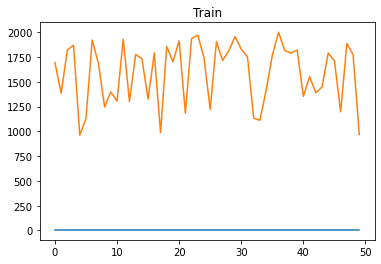

2/2 [==============================] - 3s 12ms/step


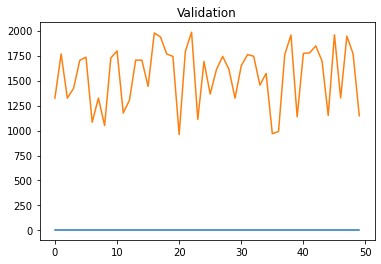

3/3 [==============================] - 1s 248ms/step


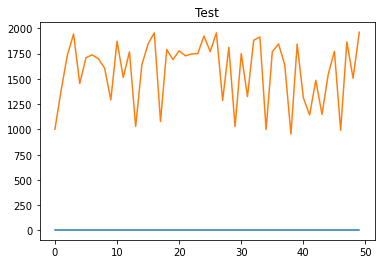

3/3 [==============================] - 0s 12ms/step


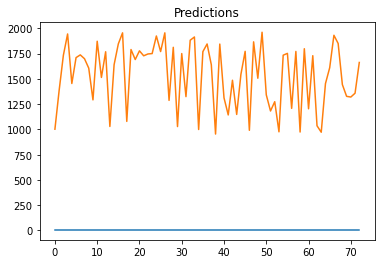

In [31]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [32]:
hybrid_rnn_lstm_mse

2438495.677695214

### RNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2533169.2500 - root_mean_squared_error: 1591.5933

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 83s 5s/step - loss: 2533169.2500 - root_mean_squared_error: 1591.5933 - val_loss: 2509381.5000 - val_root_mean_squared_error: 1584.1028
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2532245.5000 - root_mean_squared_error: 1591.3031

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2532245.5000 - root_mean_squared_error: 1591.3031 - val_loss: 2508456.2500 - val_root_mean_squared_error: 1583.8107
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2531323.0000 - root_mean_squared_error: 1591.0132

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 2531323.0000 - root_mean_squared_error: 1591.0132 - val_loss: 2507519.5000 - val_root_mean_squared_error: 1583.5149
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2530378.7500 - root_mean_squared_error: 1590.7164

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 2530378.7500 - root_mean_squared_error: 1590.7164 - val_loss: 2506580.7500 - val_root_mean_squared_error: 1583.2185
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2529435.5000 - root_mean_squared_error: 1590.4199

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2529435.5000 - root_mean_squared_error: 1590.4199 - val_loss: 2505631.5000 - val_root_mean_squared_error: 1582.9187
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 2479254.0000 - root_mean_squared_error: 1574.5647

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2528484.0000 - root_mean_squared_error: 1590.1207 - val_loss: 2504671.2500 - val_root_mean_squared_error: 1582.6154
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 2530041.2500 - root_mean_squared_error: 1590.6104

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2527511.7500 - root_mean_squared_error: 1589.8151 - val_loss: 2503693.7500 - val_root_mean_squared_error: 1582.3065
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2526513.5000 - root_mean_squared_error: 1589.5010

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 2526513.5000 - root_mean_squared_error: 1589.5010 - val_loss: 2502617.5000 - val_root_mean_squared_error: 1581.9663
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2525421.7500 - root_mean_squared_error: 1589.1576

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2525421.7500 - root_mean_squared_error: 1589.1576 - val_loss: 2501571.7500 - val_root_mean_squared_error: 1581.6357
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2523903.2500 - root_mean_squared_error: 1588.6797

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2524421.0000 - root_mean_squared_error: 1588.8427 - val_loss: 2500608.5000 - val_root_mean_squared_error: 1581.3313
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2523459.5000 - root_mean_squared_error: 1588.5400

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2523459.5000 - root_mean_squared_error: 1588.5400 - val_loss: 2499648.7500 - val_root_mean_squared_error: 1581.0277
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2522500.7500 - root_mean_squared_error: 1588.2383

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 2522500.7500 - root_mean_squared_error: 1588.2383 - val_loss: 2498702.0000 - val_root_mean_squared_error: 1580.7283
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2521557.2500 - root_mean_squared_error: 1587.9412

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 2521557.2500 - root_mean_squared_error: 1587.9412 - val_loss: 2497761.7500 - val_root_mean_squared_error: 1580.4309
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 2520208.0000 - root_mean_squared_error: 1587.5164

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 2520619.5000 - root_mean_squared_error: 1587.6459 - val_loss: 2496833.7500 - val_root_mean_squared_error: 1580.1372
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 2522700.5000 - root_mean_squared_error: 1588.3011

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2519692.5000 - root_mean_squared_error: 1587.3539 - val_loss: 2495917.2500 - val_root_mean_squared_error: 1579.8472
Epoch 16/30
5/8 [=================>............] - ETA: 0s - loss: 2481481.2500 - root_mean_squared_error: 1575.2719

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2518782.5000 - root_mean_squared_error: 1587.0673 - val_loss: 2495016.7500 - val_root_mean_squared_error: 1579.5623
Epoch 17/30
5/8 [=================>............] - ETA: 0s - loss: 2542502.0000 - root_mean_squared_error: 1594.5225

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 2517888.7500 - root_mean_squared_error: 1586.7856 - val_loss: 2494134.0000 - val_root_mean_squared_error: 1579.2827
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2517012.7500 - root_mean_squared_error: 1586.5096

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2517012.7500 - root_mean_squared_error: 1586.5096 - val_loss: 2493279.2500 - val_root_mean_squared_error: 1579.0121
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2516174.2500 - root_mean_squared_error: 1586.2454

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2516174.2500 - root_mean_squared_error: 1586.2454 - val_loss: 2492452.5000 - val_root_mean_squared_error: 1578.7502
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2515359.0000 - root_mean_squared_error: 1585.9883

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 2515359.0000 - root_mean_squared_error: 1585.9883 - val_loss: 2491663.5000 - val_root_mean_squared_error: 1578.5004
Epoch 21/30
6/8 [=====================>........] - ETA: 0s - loss: 2540455.2500 - root_mean_squared_error: 1593.8806

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 46s 6s/step - loss: 2514590.2500 - root_mean_squared_error: 1585.7460 - val_loss: 2490909.0000 - val_root_mean_squared_error: 1578.2614
Epoch 22/30
5/8 [=================>............] - ETA: 0s - loss: 2463717.5000 - root_mean_squared_error: 1569.6234

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2513847.5000 - root_mean_squared_error: 1585.5117 - val_loss: 2490200.2500 - val_root_mean_squared_error: 1578.0369
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2513152.0000 - root_mean_squared_error: 1585.2924

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2513152.0000 - root_mean_squared_error: 1585.2924 - val_loss: 2489529.7500 - val_root_mean_squared_error: 1577.8243
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2512494.7500 - root_mean_squared_error: 1585.0851

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 46s 6s/step - loss: 2512494.7500 - root_mean_squared_error: 1585.0851 - val_loss: 2488897.7500 - val_root_mean_squared_error: 1577.6240
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2508184.5000 - root_mean_squared_error: 1583.7249

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 32s 4s/step - loss: 2511878.2500 - root_mean_squared_error: 1584.8906 - val_loss: 2488301.2500 - val_root_mean_squared_error: 1577.4351
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 2511296.2500 - root_mean_squared_error: 1584.7070

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2511296.2500 - root_mean_squared_error: 1584.7070 - val_loss: 2487742.2500 - val_root_mean_squared_error: 1577.2578
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2510751.2500 - root_mean_squared_error: 1584.5350

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2510751.2500 - root_mean_squared_error: 1584.5350 - val_loss: 2487218.0000 - val_root_mean_squared_error: 1577.0916
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2510237.2500 - root_mean_squared_error: 1584.3728

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2510237.2500 - root_mean_squared_error: 1584.3728 - val_loss: 2486729.5000 - val_root_mean_squared_error: 1576.9368
Epoch 29/30
5/8 [=================>............] - ETA: 0s - loss: 2542844.0000 - root_mean_squared_error: 1594.6298

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2509763.2500 - root_mean_squared_error: 1584.2233 - val_loss: 2486272.0000 - val_root_mean_squared_error: 1576.7916
Epoch 30/30
4/8 [==============>...............] - ETA: 0s - loss: 2491679.5000 - root_mean_squared_error: 1578.5055

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 18ms/step


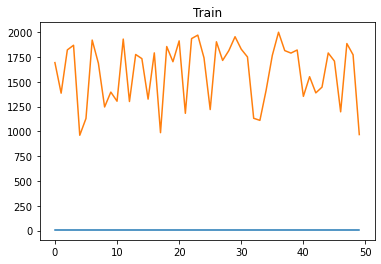

2/2 [==============================] - 5s 315ms/step


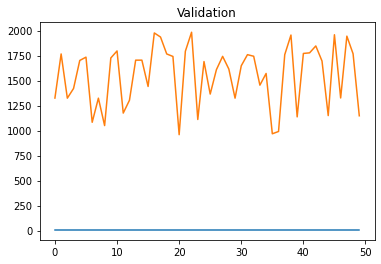

3/3 [==============================] - 0s 14ms/step


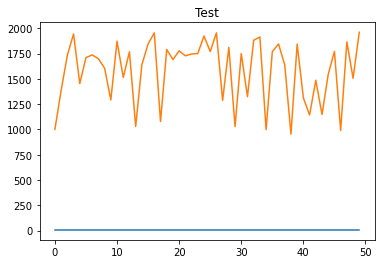

3/3 [==============================] - 0s 37ms/step


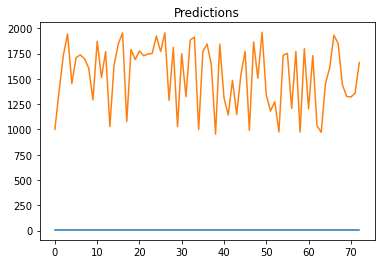

In [33]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [34]:
hybrid_rnn_gru_mse

2434238.649565792

### CNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2529688.7500 - root_mean_squared_error: 1590.4995

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 138s 14s/step - loss: 2529688.7500 - root_mean_squared_error: 1590.4995 - val_loss: 2505973.0000 - val_root_mean_squared_error: 1583.0265
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2528883.0000 - root_mean_squared_error: 1590.2462

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 73s 10s/step - loss: 2528883.0000 - root_mean_squared_error: 1590.2462 - val_loss: 2505182.0000 - val_root_mean_squared_error: 1582.7766
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 2510968.7500 - root_mean_squared_error: 1584.6036

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 77s 11s/step - loss: 2527980.2500 - root_mean_squared_error: 1589.9624 - val_loss: 2504226.0000 - val_root_mean_squared_error: 1582.4746
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2527164.5000 - root_mean_squared_error: 1589.7058

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 77s 11s/step - loss: 2527164.5000 - root_mean_squared_error: 1589.7058 - val_loss: 2503508.5000 - val_root_mean_squared_error: 1582.2479
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2526455.5000 - root_mean_squared_error: 1589.4828

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 59s 8s/step - loss: 2526455.5000 - root_mean_squared_error: 1589.4828 - val_loss: 2502801.0000 - val_root_mean_squared_error: 1582.0243
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2525752.7500 - root_mean_squared_error: 1589.2617

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 72s 10s/step - loss: 2525752.7500 - root_mean_squared_error: 1589.2617 - val_loss: 2502101.7500 - val_root_mean_squared_error: 1581.8033
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2525051.0000 - root_mean_squared_error: 1589.0409

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 64s 9s/step - loss: 2525051.0000 - root_mean_squared_error: 1589.0409 - val_loss: 2501390.5000 - val_root_mean_squared_error: 1581.5785
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2524290.2500 - root_mean_squared_error: 1588.8015

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 78s 11s/step - loss: 2524290.2500 - root_mean_squared_error: 1588.8015 - val_loss: 2500568.7500 - val_root_mean_squared_error: 1581.3187
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 2527909.7500 - root_mean_squared_error: 1589.9402

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 62s 9s/step - loss: 2523504.2500 - root_mean_squared_error: 1588.5542 - val_loss: 2499830.2500 - val_root_mean_squared_error: 1581.0852
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2522774.0000 - root_mean_squared_error: 1588.3242

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 69s 10s/step - loss: 2522774.0000 - root_mean_squared_error: 1588.3242 - val_loss: 2499083.5000 - val_root_mean_squared_error: 1580.8490
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2521979.5000 - root_mean_squared_error: 1588.0741

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 84s 12s/step - loss: 2521979.5000 - root_mean_squared_error: 1588.0741 - val_loss: 2498195.2500 - val_root_mean_squared_error: 1580.5680
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 2539929.5000 - root_mean_squared_error: 1593.7156

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 74s 10s/step - loss: 2521128.0000 - root_mean_squared_error: 1587.8060 - val_loss: 2497434.5000 - val_root_mean_squared_error: 1580.3274
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 2524463.2500 - root_mean_squared_error: 1588.8560

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 76s 11s/step - loss: 2520378.0000 - root_mean_squared_error: 1587.5698 - val_loss: 2496698.5000 - val_root_mean_squared_error: 1580.0945
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2519645.2500 - root_mean_squared_error: 1587.3390

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 75s 11s/step - loss: 2519645.2500 - root_mean_squared_error: 1587.3390 - val_loss: 2495974.0000 - val_root_mean_squared_error: 1579.8652
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2518922.2500 - root_mean_squared_error: 1587.1113

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 66s 9s/step - loss: 2518922.2500 - root_mean_squared_error: 1587.1113 - val_loss: 2495262.2500 - val_root_mean_squared_error: 1579.6399
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 2522406.5000 - root_mean_squared_error: 1588.2086

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 61s 8s/step - loss: 2518218.2500 - root_mean_squared_error: 1586.8895 - val_loss: 2494562.0000 - val_root_mean_squared_error: 1579.4182
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 2510610.2500 - root_mean_squared_error: 1584.4905

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 62s 9s/step - loss: 2517518.7500 - root_mean_squared_error: 1586.6691 - val_loss: 2493884.5000 - val_root_mean_squared_error: 1579.2037
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2516851.2500 - root_mean_squared_error: 1586.4587

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 65s 9s/step - loss: 2516851.2500 - root_mean_squared_error: 1586.4587 - val_loss: 2493220.5000 - val_root_mean_squared_error: 1578.9935
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2516197.2500 - root_mean_squared_error: 1586.2526

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 60s 9s/step - loss: 2516197.2500 - root_mean_squared_error: 1586.2526 - val_loss: 2492583.0000 - val_root_mean_squared_error: 1578.7915
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2515565.0000 - root_mean_squared_error: 1586.0532

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 65s 9s/step - loss: 2515565.0000 - root_mean_squared_error: 1586.0532 - val_loss: 2491970.2500 - val_root_mean_squared_error: 1578.5975
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2514961.7500 - root_mean_squared_error: 1585.8630

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 2514961.7500 - root_mean_squared_error: 1585.8630 - val_loss: 2491378.0000 - val_root_mean_squared_error: 1578.4099
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2514379.2500 - root_mean_squared_error: 1585.6794

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 70s 10s/step - loss: 2514379.2500 - root_mean_squared_error: 1585.6794 - val_loss: 2490807.0000 - val_root_mean_squared_error: 1578.2291
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2513818.7500 - root_mean_squared_error: 1585.5027

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 76s 11s/step - loss: 2513818.7500 - root_mean_squared_error: 1585.5027 - val_loss: 2490259.2500 - val_root_mean_squared_error: 1578.0555
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2513271.2500 - root_mean_squared_error: 1585.3300

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 57s 8s/step - loss: 2513271.2500 - root_mean_squared_error: 1585.3300 - val_loss: 2489703.7500 - val_root_mean_squared_error: 1577.8795
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2512709.0000 - root_mean_squared_error: 1585.1527

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 75s 11s/step - loss: 2512709.0000 - root_mean_squared_error: 1585.1527 - val_loss: 2489163.2500 - val_root_mean_squared_error: 1577.7083
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 2512194.7500 - root_mean_squared_error: 1584.9905

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 63s 9s/step - loss: 2512194.7500 - root_mean_squared_error: 1584.9905 - val_loss: 2488678.0000 - val_root_mean_squared_error: 1577.5544
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 2499459.7500 - root_mean_squared_error: 1580.9680

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 69s 10s/step - loss: 2511715.7500 - root_mean_squared_error: 1584.8394 - val_loss: 2488209.0000 - val_root_mean_squared_error: 1577.4058
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2511251.0000 - root_mean_squared_error: 1584.6927

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 63s 9s/step - loss: 2511251.0000 - root_mean_squared_error: 1584.6927 - val_loss: 2487753.7500 - val_root_mean_squared_error: 1577.2615
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 2510799.5000 - root_mean_squared_error: 1584.5503

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 71s 10s/step - loss: 2510799.5000 - root_mean_squared_error: 1584.5503 - val_loss: 2487309.2500 - val_root_mean_squared_error: 1577.1206
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2510356.5000 - root_mean_squared_error: 1584.4104

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 4s 23ms/step


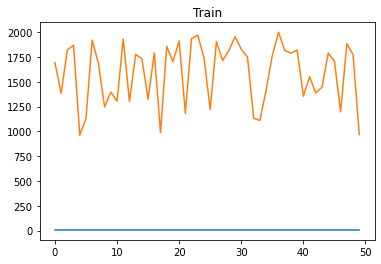

2/2 [==============================] - 2s 43ms/step


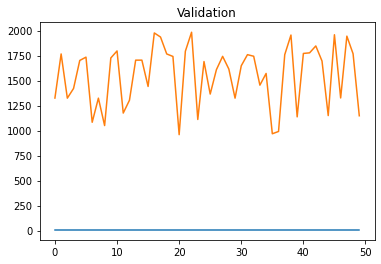

3/3 [==============================] - 0s 55ms/step


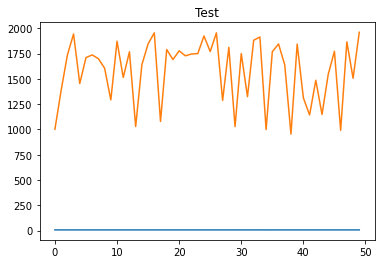

3/3 [==============================] - 0s 14ms/step


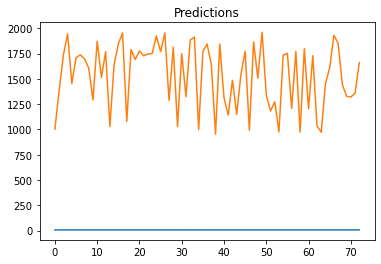

In [35]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [36]:
hybrid_cnn_gru_mse

2435258.465458973

### CNN RNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2521371.7500 - root_mean_squared_error: 1587.8828

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 83s 8s/step - loss: 2521371.7500 - root_mean_squared_error: 1587.8828 - val_loss: 2497060.7500 - val_root_mean_squared_error: 1580.2091
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2519344.7500 - root_mean_squared_error: 1587.2444

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 2519344.7500 - root_mean_squared_error: 1587.2444 - val_loss: 2495018.5000 - val_root_mean_squared_error: 1579.5627
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2517664.5000 - root_mean_squared_error: 1586.7150

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 54s 8s/step - loss: 2517664.5000 - root_mean_squared_error: 1586.7150 - val_loss: 2493527.0000 - val_root_mean_squared_error: 1579.0906
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2516192.7500 - root_mean_squared_error: 1586.2512

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 2516192.7500 - root_mean_squared_error: 1586.2512 - val_loss: 2492103.7500 - val_root_mean_squared_error: 1578.6399
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2514788.2500 - root_mean_squared_error: 1585.8083

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2514788.2500 - root_mean_squared_error: 1585.8083 - val_loss: 2490734.5000 - val_root_mean_squared_error: 1578.2061
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2513437.0000 - root_mean_squared_error: 1585.3823

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 2513437.0000 - root_mean_squared_error: 1585.3823 - val_loss: 2489419.7500 - val_root_mean_squared_error: 1577.7896
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2512143.2500 - root_mean_squared_error: 1584.9742

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 2512143.2500 - root_mean_squared_error: 1584.9742 - val_loss: 2488152.5000 - val_root_mean_squared_error: 1577.3878
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2510889.2500 - root_mean_squared_error: 1584.5786

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 2510889.2500 - root_mean_squared_error: 1584.5786 - val_loss: 2486929.7500 - val_root_mean_squared_error: 1577.0002
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2509684.0000 - root_mean_squared_error: 1584.1982

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 65s 9s/step - loss: 2509684.0000 - root_mean_squared_error: 1584.1982 - val_loss: 2485747.2500 - val_root_mean_squared_error: 1576.6254
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2514372.2500 - root_mean_squared_error: 1585.6772

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 2508512.7500 - root_mean_squared_error: 1583.8285 - val_loss: 2484604.2500 - val_root_mean_squared_error: 1576.2627
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 2509243.2500 - root_mean_squared_error: 1584.0591

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2507384.7500 - root_mean_squared_error: 1583.4724 - val_loss: 2483500.5000 - val_root_mean_squared_error: 1575.9126
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2506292.7500 - root_mean_squared_error: 1583.1276

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 2506292.7500 - root_mean_squared_error: 1583.1276 - val_loss: 2482425.5000 - val_root_mean_squared_error: 1575.5715
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 2491294.7500 - root_mean_squared_error: 1578.3835

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 2505226.5000 - root_mean_squared_error: 1582.7908 - val_loss: 2481369.0000 - val_root_mean_squared_error: 1575.2362
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 2505557.2500 - root_mean_squared_error: 1582.8953

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2504182.2500 - root_mean_squared_error: 1582.4608 - val_loss: 2480335.5000 - val_root_mean_squared_error: 1574.9082
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2503157.7500 - root_mean_squared_error: 1582.1371

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 2503157.7500 - root_mean_squared_error: 1582.1371 - val_loss: 2479334.0000 - val_root_mean_squared_error: 1574.5901
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2502159.7500 - root_mean_squared_error: 1581.8217

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 2502159.7500 - root_mean_squared_error: 1581.8217 - val_loss: 2478358.2500 - val_root_mean_squared_error: 1574.2803
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2501197.0000 - root_mean_squared_error: 1581.5173

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 2501197.0000 - root_mean_squared_error: 1581.5173 - val_loss: 2477403.7500 - val_root_mean_squared_error: 1573.9769
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2500255.2500 - root_mean_squared_error: 1581.2196

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2500255.2500 - root_mean_squared_error: 1581.2196 - val_loss: 2476483.7500 - val_root_mean_squared_error: 1573.6848
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 2484227.2500 - root_mean_squared_error: 1576.1432

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 47s 6s/step - loss: 2499342.2500 - root_mean_squared_error: 1580.9308 - val_loss: 2475594.2500 - val_root_mean_squared_error: 1573.4021
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2498459.7500 - root_mean_squared_error: 1580.6517

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 2498459.7500 - root_mean_squared_error: 1580.6517 - val_loss: 2474725.5000 - val_root_mean_squared_error: 1573.1260
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2497602.2500 - root_mean_squared_error: 1580.3804

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 2497602.2500 - root_mean_squared_error: 1580.3804 - val_loss: 2473883.0000 - val_root_mean_squared_error: 1572.8583
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2496766.5000 - root_mean_squared_error: 1580.1160

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 2496766.5000 - root_mean_squared_error: 1580.1160 - val_loss: 2473071.0000 - val_root_mean_squared_error: 1572.6001
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2495965.0000 - root_mean_squared_error: 1579.8623

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 2495965.0000 - root_mean_squared_error: 1579.8623 - val_loss: 2472275.2500 - val_root_mean_squared_error: 1572.3470
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2495179.0000 - root_mean_squared_error: 1579.6135

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 69s 10s/step - loss: 2495179.0000 - root_mean_squared_error: 1579.6135 - val_loss: 2471501.7500 - val_root_mean_squared_error: 1572.1011
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2494410.7500 - root_mean_squared_error: 1579.3704

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2494410.7500 - root_mean_squared_error: 1579.3704 - val_loss: 2470746.0000 - val_root_mean_squared_error: 1571.8607
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2500635.5000 - root_mean_squared_error: 1581.3397

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2493668.2500 - root_mean_squared_error: 1579.1353 - val_loss: 2470011.5000 - val_root_mean_squared_error: 1571.6271
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2492934.7500 - root_mean_squared_error: 1578.9031

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 57s 8s/step - loss: 2492934.7500 - root_mean_squared_error: 1578.9031 - val_loss: 2469294.0000 - val_root_mean_squared_error: 1571.3987
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2492218.2500 - root_mean_squared_error: 1578.6761

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2492218.2500 - root_mean_squared_error: 1578.6761 - val_loss: 2468581.7500 - val_root_mean_squared_error: 1571.1721
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 2467729.5000 - root_mean_squared_error: 1570.9009

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 2491508.7500 - root_mean_squared_error: 1578.4514 - val_loss: 2467874.2500 - val_root_mean_squared_error: 1570.9469
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 2507912.7500 - root_mean_squared_error: 1583.6390

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 17s 33ms/step


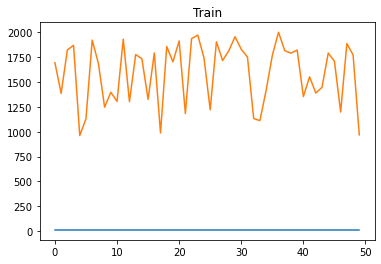

2/2 [==============================] - 6s 19ms/step


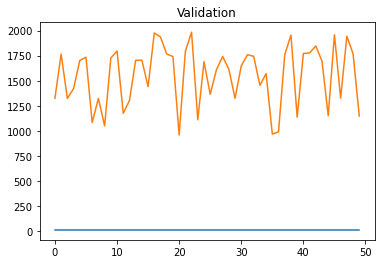

3/3 [==============================] - 0s 24ms/step


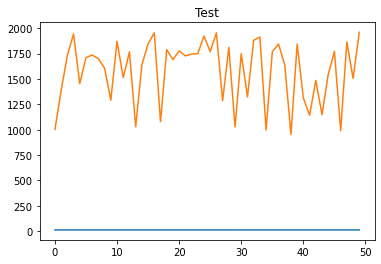

3/3 [==============================] - 0s 12ms/step


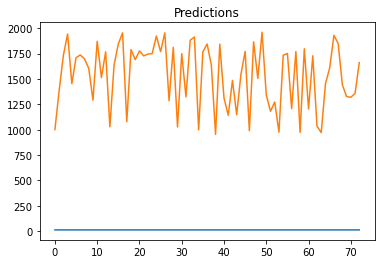

In [37]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [38]:
hybrid_cnn_rnn_gru_mse

2415826.481843948

### LSTM RNN GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 2533721.2500 - root_mean_squared_error: 1591.7667

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 139s 15s/step - loss: 2529952.5000 - root_mean_squared_error: 1590.5824 - val_loss: 2505796.7500 - val_root_mean_squared_error: 1582.9708
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2528424.0000 - root_mean_squared_error: 1590.1019

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 80s 11s/step - loss: 2528424.0000 - root_mean_squared_error: 1590.1019 - val_loss: 2504251.2500 - val_root_mean_squared_error: 1582.4827
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2526846.5000 - root_mean_squared_error: 1589.6057

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 84s 12s/step - loss: 2526846.5000 - root_mean_squared_error: 1589.6057 - val_loss: 2502604.2500 - val_root_mean_squared_error: 1581.9622
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2525137.5000 - root_mean_squared_error: 1589.0681

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 89s 12s/step - loss: 2525137.5000 - root_mean_squared_error: 1589.0681 - val_loss: 2500772.5000 - val_root_mean_squared_error: 1581.3831
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2523202.5000 - root_mean_squared_error: 1588.4591

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 78s 11s/step - loss: 2523202.5000 - root_mean_squared_error: 1588.4591 - val_loss: 2498697.0000 - val_root_mean_squared_error: 1580.7267
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2521013.2500 - root_mean_squared_error: 1587.7699

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 67s 10s/step - loss: 2521013.2500 - root_mean_squared_error: 1587.7699 - val_loss: 2496336.5000 - val_root_mean_squared_error: 1579.9799
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2518548.2500 - root_mean_squared_error: 1586.9934

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 112s 16s/step - loss: 2518548.2500 - root_mean_squared_error: 1586.9934 - val_loss: 2493695.5000 - val_root_mean_squared_error: 1579.1439
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2515828.2500 - root_mean_squared_error: 1586.1362

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 75s 11s/step - loss: 2515828.2500 - root_mean_squared_error: 1586.1362 - val_loss: 2490844.7500 - val_root_mean_squared_error: 1578.2411
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2512927.5000 - root_mean_squared_error: 1585.2216

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 89s 13s/step - loss: 2512927.5000 - root_mean_squared_error: 1585.2216 - val_loss: 2487932.7500 - val_root_mean_squared_error: 1577.3182
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2510045.0000 - root_mean_squared_error: 1584.3121

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 106s 15s/step - loss: 2510045.0000 - root_mean_squared_error: 1584.3121 - val_loss: 2485123.0000 - val_root_mean_squared_error: 1576.4272
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2507306.0000 - root_mean_squared_error: 1583.4475

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 108s 15s/step - loss: 2507306.0000 - root_mean_squared_error: 1583.4475 - val_loss: 2482597.2500 - val_root_mean_squared_error: 1575.6260
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2504917.0000 - root_mean_squared_error: 1582.6930

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 62s 9s/step - loss: 2504917.0000 - root_mean_squared_error: 1582.6930 - val_loss: 2480409.0000 - val_root_mean_squared_error: 1574.9314
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2502881.2500 - root_mean_squared_error: 1582.0497

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 94s 13s/step - loss: 2502881.2500 - root_mean_squared_error: 1582.0497 - val_loss: 2478610.0000 - val_root_mean_squared_error: 1574.3602
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2501230.5000 - root_mean_squared_error: 1581.5280

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 94s 13s/step - loss: 2501230.5000 - root_mean_squared_error: 1581.5280 - val_loss: 2477174.0000 - val_root_mean_squared_error: 1573.9041
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2499918.5000 - root_mean_squared_error: 1581.1130

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 83s 12s/step - loss: 2499918.5000 - root_mean_squared_error: 1581.1130 - val_loss: 2476031.7500 - val_root_mean_squared_error: 1573.5411
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2498872.5000 - root_mean_squared_error: 1580.7822

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 96s 14s/step - loss: 2498872.5000 - root_mean_squared_error: 1580.7822 - val_loss: 2475128.7500 - val_root_mean_squared_error: 1573.2542
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2498042.7500 - root_mean_squared_error: 1580.5198

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 98s 14s/step - loss: 2498042.7500 - root_mean_squared_error: 1580.5198 - val_loss: 2474408.5000 - val_root_mean_squared_error: 1573.0253
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2497380.0000 - root_mean_squared_error: 1580.3101

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 94s 13s/step - loss: 2497380.0000 - root_mean_squared_error: 1580.3101 - val_loss: 2473820.2500 - val_root_mean_squared_error: 1572.8383
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2496830.5000 - root_mean_squared_error: 1580.1362

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 74s 10s/step - loss: 2496830.5000 - root_mean_squared_error: 1580.1362 - val_loss: 2473329.0000 - val_root_mean_squared_error: 1572.6821
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2496366.7500 - root_mean_squared_error: 1579.9895

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 76s 11s/step - loss: 2496366.7500 - root_mean_squared_error: 1579.9895 - val_loss: 2472907.5000 - val_root_mean_squared_error: 1572.5481
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 2495730.2500 - root_mean_squared_error: 1579.7881

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 107s 15s/step - loss: 2495962.7500 - root_mean_squared_error: 1579.8616 - val_loss: 2472528.0000 - val_root_mean_squared_error: 1572.4274
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2495594.5000 - root_mean_squared_error: 1579.7451

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 66s 9s/step - loss: 2495594.5000 - root_mean_squared_error: 1579.7451 - val_loss: 2472180.7500 - val_root_mean_squared_error: 1572.3170
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2495257.0000 - root_mean_squared_error: 1579.6383

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 87s 12s/step - loss: 2495257.0000 - root_mean_squared_error: 1579.6383 - val_loss: 2471854.5000 - val_root_mean_squared_error: 1572.2134
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2494938.2500 - root_mean_squared_error: 1579.5374

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 105s 15s/step - loss: 2494938.2500 - root_mean_squared_error: 1579.5374 - val_loss: 2471551.0000 - val_root_mean_squared_error: 1572.1167
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2501691.2500 - root_mean_squared_error: 1581.6736

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 90s 13s/step - loss: 2494641.5000 - root_mean_squared_error: 1579.4434 - val_loss: 2471263.2500 - val_root_mean_squared_error: 1572.0251
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2482020.7500 - root_mean_squared_error: 1575.4430

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 60s 9s/step - loss: 2494359.2500 - root_mean_squared_error: 1579.3540 - val_loss: 2470989.2500 - val_root_mean_squared_error: 1571.9381
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 2480773.2500 - root_mean_squared_error: 1575.0471

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 85s 12s/step - loss: 2494090.5000 - root_mean_squared_error: 1579.2689 - val_loss: 2470726.5000 - val_root_mean_squared_error: 1571.8545
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2493831.2500 - root_mean_squared_error: 1579.1869

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 94s 13s/step - loss: 2493831.2500 - root_mean_squared_error: 1579.1869 - val_loss: 2470476.2500 - val_root_mean_squared_error: 1571.7749
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 2493159.5000 - root_mean_squared_error: 1578.9742

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 92s 13s/step - loss: 2493585.2500 - root_mean_squared_error: 1579.1090 - val_loss: 2470234.5000 - val_root_mean_squared_error: 1571.6980
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2493347.2500 - root_mean_squared_error: 1579.0337

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 14s 33ms/step


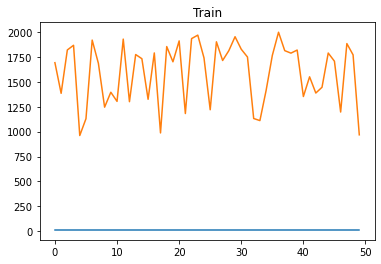

2/2 [==============================] - 16s 85ms/step


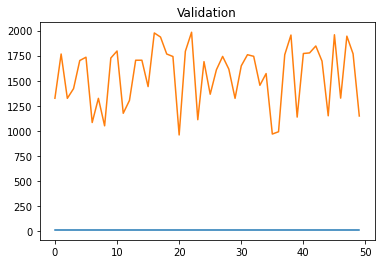

3/3 [==============================] - 2s 209ms/step


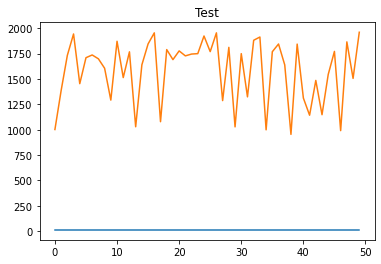

3/3 [==============================] - 0s 15ms/step


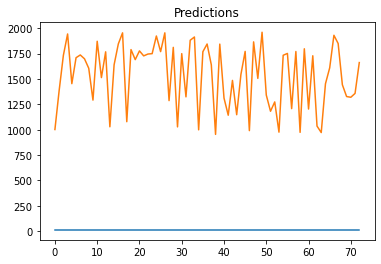

In [39]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [40]:
hybrid_lstm_rnn_gru_mse

2418616.009041706

## Moving Average

### CNN LSTM

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 2538112.5000 - root_mean_squared_error: 1593.1455

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 126s 13s/step - loss: 2529689.2500 - root_mean_squared_error: 1590.4996 - val_loss: 2504395.2500 - val_root_mean_squared_error: 1582.5281
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2528640.2500 - root_mean_squared_error: 1590.1699

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 84s 12s/step - loss: 2528640.2500 - root_mean_squared_error: 1590.1699 - val_loss: 2504011.5000 - val_root_mean_squared_error: 1582.4069
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2528301.0000 - root_mean_squared_error: 1590.0632

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 82s 12s/step - loss: 2528301.0000 - root_mean_squared_error: 1590.0632 - val_loss: 2503645.2500 - val_root_mean_squared_error: 1582.2911
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2527936.7500 - root_mean_squared_error: 1589.9486

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 96s 14s/step - loss: 2527936.7500 - root_mean_squared_error: 1589.9486 - val_loss: 2503271.0000 - val_root_mean_squared_error: 1582.1730
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2527554.5000 - root_mean_squared_error: 1589.8285

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 90s 13s/step - loss: 2527554.5000 - root_mean_squared_error: 1589.8285 - val_loss: 2502867.2500 - val_root_mean_squared_error: 1582.0453
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2527141.2500 - root_mean_squared_error: 1589.6985

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 90s 13s/step - loss: 2527141.2500 - root_mean_squared_error: 1589.6985 - val_loss: 2502386.7500 - val_root_mean_squared_error: 1581.8934
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2526562.5000 - root_mean_squared_error: 1589.5165

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 88s 12s/step - loss: 2526562.5000 - root_mean_squared_error: 1589.5165 - val_loss: 2501766.5000 - val_root_mean_squared_error: 1581.6974
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2526017.5000 - root_mean_squared_error: 1589.3450

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 83s 12s/step - loss: 2526017.5000 - root_mean_squared_error: 1589.3450 - val_loss: 2501297.7500 - val_root_mean_squared_error: 1581.5492
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2525543.5000 - root_mean_squared_error: 1589.1959

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 78s 11s/step - loss: 2525543.5000 - root_mean_squared_error: 1589.1959 - val_loss: 2500786.7500 - val_root_mean_squared_error: 1581.3876
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2524942.0000 - root_mean_squared_error: 1589.0066

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 87s 12s/step - loss: 2524942.0000 - root_mean_squared_error: 1589.0066 - val_loss: 2500138.0000 - val_root_mean_squared_error: 1581.1825
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2524339.5000 - root_mean_squared_error: 1588.8170

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 112s 16s/step - loss: 2524339.5000 - root_mean_squared_error: 1588.8170 - val_loss: 2499573.5000 - val_root_mean_squared_error: 1581.0039
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2523785.7500 - root_mean_squared_error: 1588.6427

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 70s 10s/step - loss: 2523785.7500 - root_mean_squared_error: 1588.6427 - val_loss: 2498998.5000 - val_root_mean_squared_error: 1580.8221
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2523165.2500 - root_mean_squared_error: 1588.4474

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 98s 13s/step - loss: 2523165.2500 - root_mean_squared_error: 1588.4474 - val_loss: 2498381.0000 - val_root_mean_squared_error: 1580.6268
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2522597.2500 - root_mean_squared_error: 1588.2687

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 80s 11s/step - loss: 2522597.2500 - root_mean_squared_error: 1588.2687 - val_loss: 2497832.2500 - val_root_mean_squared_error: 1580.4531
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2522010.7500 - root_mean_squared_error: 1588.0840

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 106s 15s/step - loss: 2522010.7500 - root_mean_squared_error: 1588.0840 - val_loss: 2497019.2500 - val_root_mean_squared_error: 1580.1959
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2521215.5000 - root_mean_squared_error: 1587.8336

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 70s 10s/step - loss: 2521215.5000 - root_mean_squared_error: 1587.8336 - val_loss: 2496475.5000 - val_root_mean_squared_error: 1580.0239
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2520688.0000 - root_mean_squared_error: 1587.6675

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 81s 11s/step - loss: 2520688.0000 - root_mean_squared_error: 1587.6675 - val_loss: 2495943.2500 - val_root_mean_squared_error: 1579.8555
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2520170.5000 - root_mean_squared_error: 1587.5045

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 67s 10s/step - loss: 2520170.5000 - root_mean_squared_error: 1587.5045 - val_loss: 2495445.0000 - val_root_mean_squared_error: 1579.6978
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 2531644.0000 - root_mean_squared_error: 1591.1141

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 95s 14s/step - loss: 2519682.0000 - root_mean_squared_error: 1587.3506 - val_loss: 2494953.7500 - val_root_mean_squared_error: 1579.5422
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 2514938.5000 - root_mean_squared_error: 1585.8557

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 75s 10s/step - loss: 2519191.2500 - root_mean_squared_error: 1587.1960 - val_loss: 2494417.7500 - val_root_mean_squared_error: 1579.3726
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 2520523.2500 - root_mean_squared_error: 1587.6156

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 71s 10s/step - loss: 2518664.5000 - root_mean_squared_error: 1587.0300 - val_loss: 2493945.0000 - val_root_mean_squared_error: 1579.2229
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2528729.7500 - root_mean_squared_error: 1590.1980

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 90s 13s/step - loss: 2518188.0000 - root_mean_squared_error: 1586.8800 - val_loss: 2493386.5000 - val_root_mean_squared_error: 1579.0460
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2517617.5000 - root_mean_squared_error: 1586.7002

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 71s 10s/step - loss: 2517617.5000 - root_mean_squared_error: 1586.7002 - val_loss: 2492918.0000 - val_root_mean_squared_error: 1578.8977
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2517173.7500 - root_mean_squared_error: 1586.5603

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 85s 12s/step - loss: 2517173.7500 - root_mean_squared_error: 1586.5603 - val_loss: 2492485.7500 - val_root_mean_squared_error: 1578.7609
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2525771.2500 - root_mean_squared_error: 1589.2676

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 74s 10s/step - loss: 2516744.5000 - root_mean_squared_error: 1586.4250 - val_loss: 2492061.7500 - val_root_mean_squared_error: 1578.6266
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2516483.7500 - root_mean_squared_error: 1586.3429

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 86s 12s/step - loss: 2516322.7500 - root_mean_squared_error: 1586.2921 - val_loss: 2491645.7500 - val_root_mean_squared_error: 1578.4948
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2515906.5000 - root_mean_squared_error: 1586.1609

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 95s 13s/step - loss: 2515906.5000 - root_mean_squared_error: 1586.1609 - val_loss: 2491234.7500 - val_root_mean_squared_error: 1578.3646
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2515496.7500 - root_mean_squared_error: 1586.0317

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 72s 10s/step - loss: 2515496.7500 - root_mean_squared_error: 1586.0317 - val_loss: 2490826.0000 - val_root_mean_squared_error: 1578.2351
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 2529308.0000 - root_mean_squared_error: 1590.3799

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 104s 15s/step - loss: 2515091.2500 - root_mean_squared_error: 1585.9039 - val_loss: 2490422.2500 - val_root_mean_squared_error: 1578.1072
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2514691.2500 - root_mean_squared_error: 1585.7778

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 7s 131ms/step


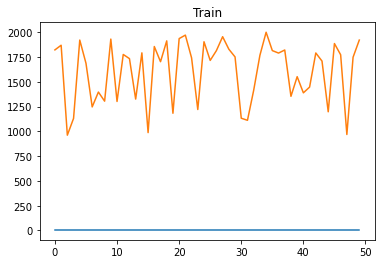

2/2 [==============================] - 5s 48ms/step


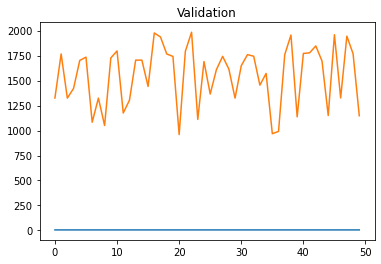

3/3 [==============================] - 0s 189ms/step


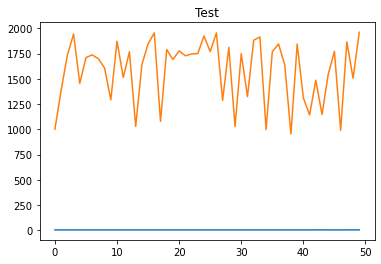

3/3 [==============================] - 0s 21ms/step


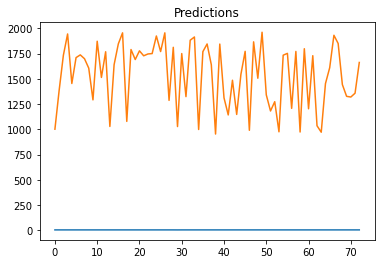

In [41]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [42]:
mavg_hybrid_cnn_lstm_mse

2438369.1887493893

### RNN LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2532566.7500 - root_mean_squared_error: 1591.4041

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 88s 9s/step - loss: 2532566.7500 - root_mean_squared_error: 1591.4041 - val_loss: 2507738.0000 - val_root_mean_squared_error: 1583.5839
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 2572023.5000 - root_mean_squared_error: 1603.7529

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 58s 8s/step - loss: 2531939.7500 - root_mean_squared_error: 1591.2070 - val_loss: 2507112.7500 - val_root_mean_squared_error: 1583.3865
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 2519299.7500 - root_mean_squared_error: 1587.2302

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 49s 7s/step - loss: 2531308.2500 - root_mean_squared_error: 1591.0085 - val_loss: 2506475.0000 - val_root_mean_squared_error: 1583.1851
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2530662.2500 - root_mean_squared_error: 1590.8055

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 50s 7s/step - loss: 2530662.2500 - root_mean_squared_error: 1590.8055 - val_loss: 2505821.5000 - val_root_mean_squared_error: 1582.9786
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2530001.0000 - root_mean_squared_error: 1590.5977

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 50s 7s/step - loss: 2530001.0000 - root_mean_squared_error: 1590.5977 - val_loss: 2505142.0000 - val_root_mean_squared_error: 1582.7640
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2529292.0000 - root_mean_squared_error: 1590.3748

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 2529292.0000 - root_mean_squared_error: 1590.3748 - val_loss: 2504337.0000 - val_root_mean_squared_error: 1582.5098
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 2530885.2500 - root_mean_squared_error: 1590.8756

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 62s 9s/step - loss: 2528459.2500 - root_mean_squared_error: 1590.1129 - val_loss: 2503544.7500 - val_root_mean_squared_error: 1582.2594
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 2537453.7500 - root_mean_squared_error: 1592.9387

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 46s 6s/step - loss: 2527691.0000 - root_mean_squared_error: 1589.8713 - val_loss: 2502784.5000 - val_root_mean_squared_error: 1582.0192
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 2517316.0000 - root_mean_squared_error: 1586.6052

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 2526919.0000 - root_mean_squared_error: 1589.6285 - val_loss: 2502005.0000 - val_root_mean_squared_error: 1581.7727
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2526138.2500 - root_mean_squared_error: 1589.3829

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 59s 8s/step - loss: 2526138.2500 - root_mean_squared_error: 1589.3829 - val_loss: 2501216.0000 - val_root_mean_squared_error: 1581.5233
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2525348.2500 - root_mean_squared_error: 1589.1344

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 2525348.2500 - root_mean_squared_error: 1589.1344 - val_loss: 2500428.7500 - val_root_mean_squared_error: 1581.2744
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2524560.2500 - root_mean_squared_error: 1588.8865

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 48s 7s/step - loss: 2524560.2500 - root_mean_squared_error: 1588.8865 - val_loss: 2499647.5000 - val_root_mean_squared_error: 1581.0273
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2523781.7500 - root_mean_squared_error: 1588.6415

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 48s 7s/step - loss: 2523781.7500 - root_mean_squared_error: 1588.6415 - val_loss: 2498877.2500 - val_root_mean_squared_error: 1580.7837
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2523014.7500 - root_mean_squared_error: 1588.4000

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 61s 8s/step - loss: 2523014.7500 - root_mean_squared_error: 1588.4000 - val_loss: 2498121.5000 - val_root_mean_squared_error: 1580.5447
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2522263.5000 - root_mean_squared_error: 1588.1636

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 60s 8s/step - loss: 2522263.5000 - root_mean_squared_error: 1588.1636 - val_loss: 2497374.2500 - val_root_mean_squared_error: 1580.3082
Epoch 16/30
6/8 [=====================>........] - ETA: 0s - loss: 2495196.7500 - root_mean_squared_error: 1579.6191

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2521524.5000 - root_mean_squared_error: 1587.9309 - val_loss: 2496644.2500 - val_root_mean_squared_error: 1580.0773
Epoch 17/30
4/8 [==============>...............] - ETA: 0s - loss: 2593303.0000 - root_mean_squared_error: 1610.3735

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 57s 8s/step - loss: 2520797.2500 - root_mean_squared_error: 1587.7019 - val_loss: 2495922.7500 - val_root_mean_squared_error: 1579.8490
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 2506011.7500 - root_mean_squared_error: 1583.0388

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 2520077.2500 - root_mean_squared_error: 1587.4751 - val_loss: 2495216.2500 - val_root_mean_squared_error: 1579.6254
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2519378.5000 - root_mean_squared_error: 1587.2550

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 2519378.5000 - root_mean_squared_error: 1587.2550 - val_loss: 2494531.0000 - val_root_mean_squared_error: 1579.4084
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2518703.7500 - root_mean_squared_error: 1587.0425

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 59s 8s/step - loss: 2518703.7500 - root_mean_squared_error: 1587.0425 - val_loss: 2493862.0000 - val_root_mean_squared_error: 1579.1967
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2518039.2500 - root_mean_squared_error: 1586.8331

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2518039.2500 - root_mean_squared_error: 1586.8331 - val_loss: 2493215.5000 - val_root_mean_squared_error: 1578.9919
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2518504.0000 - root_mean_squared_error: 1586.9795

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 67s 10s/step - loss: 2517400.2500 - root_mean_squared_error: 1586.6317 - val_loss: 2492591.0000 - val_root_mean_squared_error: 1578.7942
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2516786.7500 - root_mean_squared_error: 1586.4384

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 49s 7s/step - loss: 2516786.7500 - root_mean_squared_error: 1586.4384 - val_loss: 2491991.0000 - val_root_mean_squared_error: 1578.6041
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2516196.5000 - root_mean_squared_error: 1586.2523

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 2516196.5000 - root_mean_squared_error: 1586.2523 - val_loss: 2491419.5000 - val_root_mean_squared_error: 1578.4232
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2503675.7500 - root_mean_squared_error: 1582.3008

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 2515634.7500 - root_mean_squared_error: 1586.0753 - val_loss: 2490874.0000 - val_root_mean_squared_error: 1578.2502
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2526765.5000 - root_mean_squared_error: 1589.5803

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 55s 8s/step - loss: 2515094.0000 - root_mean_squared_error: 1585.9048 - val_loss: 2490353.0000 - val_root_mean_squared_error: 1578.0852
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2514587.5000 - root_mean_squared_error: 1585.7451

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2514587.5000 - root_mean_squared_error: 1585.7451 - val_loss: 2489857.0000 - val_root_mean_squared_error: 1577.9280
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2514097.5000 - root_mean_squared_error: 1585.5906

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 64s 9s/step - loss: 2514097.5000 - root_mean_squared_error: 1585.5906 - val_loss: 2489385.0000 - val_root_mean_squared_error: 1577.7784
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 2513633.0000 - root_mean_squared_error: 1585.4441

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 52s 7s/step - loss: 2513633.0000 - root_mean_squared_error: 1585.4441 - val_loss: 2488923.5000 - val_root_mean_squared_error: 1577.6322
Epoch 30/30
6/8 [=====================>........] - ETA: 0s - loss: 2532135.0000 - root_mean_squared_error: 1591.2683

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 12ms/step


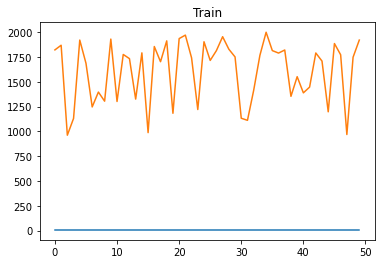

2/2 [==============================] - 3s 19ms/step


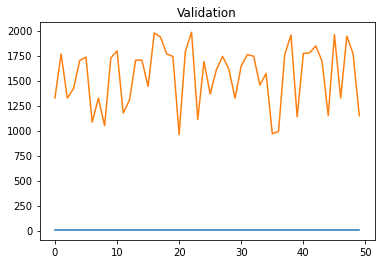

3/3 [==============================] - 0s 10ms/step


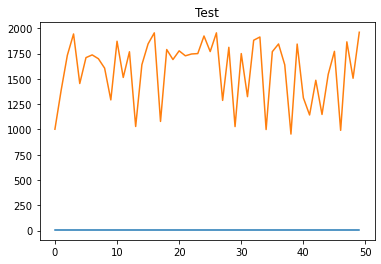

3/3 [==============================] - 0s 10ms/step


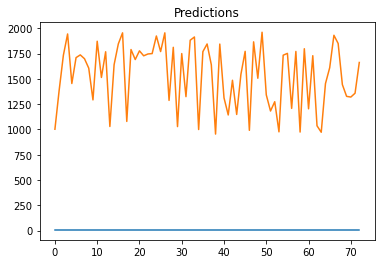

In [43]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [44]:
mavg_hybrid_rnn_lstm_mse

2436835.1023339075

### RNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2534801.2500 - root_mean_squared_error: 1592.1060

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 96s 11s/step - loss: 2534801.2500 - root_mean_squared_error: 1592.1060 - val_loss: 2509843.0000 - val_root_mean_squared_error: 1584.2484
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 2557654.5000 - root_mean_squared_error: 1599.2668

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2533963.0000 - root_mean_squared_error: 1591.8427 - val_loss: 2509002.5000 - val_root_mean_squared_error: 1583.9832
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 2529814.2500 - root_mean_squared_error: 1590.5389

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 46s 6s/step - loss: 2533123.2500 - root_mean_squared_error: 1591.5789 - val_loss: 2508167.0000 - val_root_mean_squared_error: 1583.7194
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 2549312.5000 - root_mean_squared_error: 1596.6566

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2532283.0000 - root_mean_squared_error: 1591.3148 - val_loss: 2507328.5000 - val_root_mean_squared_error: 1583.4546
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2531444.5000 - root_mean_squared_error: 1591.0514

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 2531444.5000 - root_mean_squared_error: 1591.0514 - val_loss: 2506491.5000 - val_root_mean_squared_error: 1583.1903
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2530605.0000 - root_mean_squared_error: 1590.7876

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2530605.0000 - root_mean_squared_error: 1590.7876 - val_loss: 2505647.0000 - val_root_mean_squared_error: 1582.9236
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 2519404.7500 - root_mean_squared_error: 1587.2633

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 53s 7s/step - loss: 2529758.5000 - root_mean_squared_error: 1590.5215 - val_loss: 2504803.0000 - val_root_mean_squared_error: 1582.6569
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2528913.0000 - root_mean_squared_error: 1590.2556

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 2528913.0000 - root_mean_squared_error: 1590.2556 - val_loss: 2503954.5000 - val_root_mean_squared_error: 1582.3889
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2528061.5000 - root_mean_squared_error: 1589.9879

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 70s 10s/step - loss: 2528061.5000 - root_mean_squared_error: 1589.9879 - val_loss: 2503107.7500 - val_root_mean_squared_error: 1582.1213
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 2539379.2500 - root_mean_squared_error: 1593.5430

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2527217.0000 - root_mean_squared_error: 1589.7223 - val_loss: 2502253.5000 - val_root_mean_squared_error: 1581.8512
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 2538180.2500 - root_mean_squared_error: 1593.1667

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2526361.2500 - root_mean_squared_error: 1589.4531 - val_loss: 2501400.7500 - val_root_mean_squared_error: 1581.5817
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2525509.2500 - root_mean_squared_error: 1589.1851

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 2525509.2500 - root_mean_squared_error: 1589.1851 - val_loss: 2500544.2500 - val_root_mean_squared_error: 1581.3109
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 2512817.7500 - root_mean_squared_error: 1585.1870

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 2524642.0000 - root_mean_squared_error: 1588.9122 - val_loss: 2499681.5000 - val_root_mean_squared_error: 1581.0381
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2523776.5000 - root_mean_squared_error: 1588.6398

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2523776.5000 - root_mean_squared_error: 1588.6398 - val_loss: 2498809.7500 - val_root_mean_squared_error: 1580.7625
Epoch 15/30
6/8 [=====================>........] - ETA: 0s - loss: 2522410.0000 - root_mean_squared_error: 1588.2097

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 2522910.0000 - root_mean_squared_error: 1588.3671 - val_loss: 2497937.7500 - val_root_mean_squared_error: 1580.4866
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2522036.0000 - root_mean_squared_error: 1588.0919

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 69s 10s/step - loss: 2522036.0000 - root_mean_squared_error: 1588.0919 - val_loss: 2497072.5000 - val_root_mean_squared_error: 1580.2128
Epoch 17/30
5/8 [=================>............] - ETA: 0s - loss: 2476632.5000 - root_mean_squared_error: 1573.7321

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2521171.0000 - root_mean_squared_error: 1587.8196 - val_loss: 2496216.7500 - val_root_mean_squared_error: 1579.9420
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2520319.7500 - root_mean_squared_error: 1587.5515

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 64s 9s/step - loss: 2520319.7500 - root_mean_squared_error: 1587.5515 - val_loss: 2495379.0000 - val_root_mean_squared_error: 1579.6769
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2519492.0000 - root_mean_squared_error: 1587.2908

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 2519492.0000 - root_mean_squared_error: 1587.2908 - val_loss: 2494565.5000 - val_root_mean_squared_error: 1579.4193
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2518690.5000 - root_mean_squared_error: 1587.0383

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 2518690.5000 - root_mean_squared_error: 1587.0383 - val_loss: 2493781.5000 - val_root_mean_squared_error: 1579.1711
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2517921.7500 - root_mean_squared_error: 1586.7960

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 2517921.7500 - root_mean_squared_error: 1586.7960 - val_loss: 2493031.2500 - val_root_mean_squared_error: 1578.9336
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2528104.2500 - root_mean_squared_error: 1590.0013

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2517184.2500 - root_mean_squared_error: 1586.5637 - val_loss: 2492319.5000 - val_root_mean_squared_error: 1578.7081
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 2520370.7500 - root_mean_squared_error: 1587.5675

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 2516485.0000 - root_mean_squared_error: 1586.3433 - val_loss: 2491646.0000 - val_root_mean_squared_error: 1578.4949
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2515825.2500 - root_mean_squared_error: 1586.1354

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 59s 8s/step - loss: 2515825.2500 - root_mean_squared_error: 1586.1354 - val_loss: 2491007.5000 - val_root_mean_squared_error: 1578.2926
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2515195.5000 - root_mean_squared_error: 1585.9368

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2515195.5000 - root_mean_squared_error: 1585.9368 - val_loss: 2490402.7500 - val_root_mean_squared_error: 1578.1010
Epoch 26/30
5/8 [=================>............] - ETA: 0s - loss: 2497781.2500 - root_mean_squared_error: 1580.4370

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 2514604.5000 - root_mean_squared_error: 1585.7505 - val_loss: 2489834.0000 - val_root_mean_squared_error: 1577.9208
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 2509318.2500 - root_mean_squared_error: 1584.0828

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 2514051.2500 - root_mean_squared_error: 1585.5760 - val_loss: 2489302.2500 - val_root_mean_squared_error: 1577.7523
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2513531.0000 - root_mean_squared_error: 1585.4120

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2513531.0000 - root_mean_squared_error: 1585.4120 - val_loss: 2488799.5000 - val_root_mean_squared_error: 1577.5929
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 2513038.0000 - root_mean_squared_error: 1585.2565

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 64s 9s/step - loss: 2513038.0000 - root_mean_squared_error: 1585.2565 - val_loss: 2488322.0000 - val_root_mean_squared_error: 1577.4417
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2512571.0000 - root_mean_squared_error: 1585.1091

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 2s 13ms/step


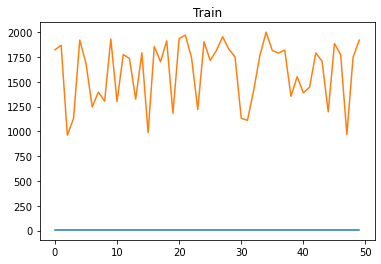

2/2 [==============================] - 5s 15ms/step


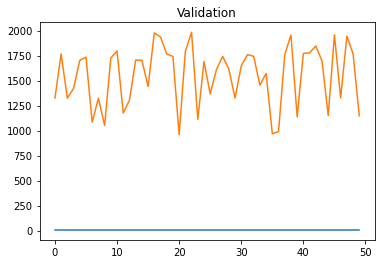

3/3 [==============================] - 0s 14ms/step


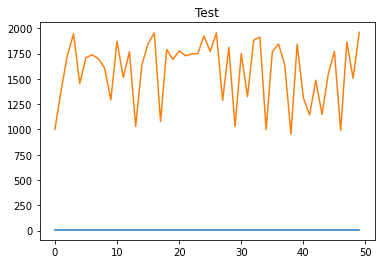

3/3 [==============================] - 0s 11ms/step


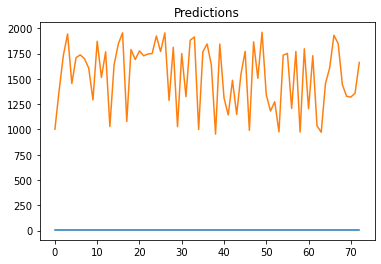

In [45]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [46]:
mavg_hybrid_rnn_gru_mse

2436234.198978533

### CNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2529027.0000 - root_mean_squared_error: 1590.2915

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 162s 15s/step - loss: 2529027.0000 - root_mean_squared_error: 1590.2915 - val_loss: 2503661.7500 - val_root_mean_squared_error: 1582.2964
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2527338.2500 - root_mean_squared_error: 1589.7605

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 68s 9s/step - loss: 2527338.2500 - root_mean_squared_error: 1589.7605 - val_loss: 2502394.2500 - val_root_mean_squared_error: 1581.8958
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2526491.0000 - root_mean_squared_error: 1589.4939

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 88s 12s/step - loss: 2526491.0000 - root_mean_squared_error: 1589.4939 - val_loss: 2501772.5000 - val_root_mean_squared_error: 1581.6992
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2525912.2500 - root_mean_squared_error: 1589.3119

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 95s 13s/step - loss: 2525912.2500 - root_mean_squared_error: 1589.3119 - val_loss: 2501212.5000 - val_root_mean_squared_error: 1581.5222
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2525371.5000 - root_mean_squared_error: 1589.1417

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 62s 8s/step - loss: 2525371.5000 - root_mean_squared_error: 1589.1417 - val_loss: 2500676.5000 - val_root_mean_squared_error: 1581.3528
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2524847.0000 - root_mean_squared_error: 1588.9767

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 80s 11s/step - loss: 2524847.0000 - root_mean_squared_error: 1588.9767 - val_loss: 2500149.7500 - val_root_mean_squared_error: 1581.1862
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2524328.7500 - root_mean_squared_error: 1588.8136

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 67s 10s/step - loss: 2524328.7500 - root_mean_squared_error: 1588.8136 - val_loss: 2499629.7500 - val_root_mean_squared_error: 1581.0217
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2523813.2500 - root_mean_squared_error: 1588.6514

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 77s 11s/step - loss: 2523813.2500 - root_mean_squared_error: 1588.6514 - val_loss: 2499116.5000 - val_root_mean_squared_error: 1580.8595
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2523309.7500 - root_mean_squared_error: 1588.4929

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 98s 14s/step - loss: 2523309.7500 - root_mean_squared_error: 1588.4929 - val_loss: 2498604.5000 - val_root_mean_squared_error: 1580.6975
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2522803.7500 - root_mean_squared_error: 1588.3336

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 71s 10s/step - loss: 2522803.7500 - root_mean_squared_error: 1588.3336 - val_loss: 2498098.7500 - val_root_mean_squared_error: 1580.5375
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2522297.2500 - root_mean_squared_error: 1588.1742

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 80s 11s/step - loss: 2522297.2500 - root_mean_squared_error: 1588.1742 - val_loss: 2497583.0000 - val_root_mean_squared_error: 1580.3744
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2521773.0000 - root_mean_squared_error: 1588.0092

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 84s 12s/step - loss: 2521773.0000 - root_mean_squared_error: 1588.0092 - val_loss: 2497075.2500 - val_root_mean_squared_error: 1580.2136
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2521267.5000 - root_mean_squared_error: 1587.8500

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 77s 11s/step - loss: 2521267.5000 - root_mean_squared_error: 1587.8500 - val_loss: 2496594.7500 - val_root_mean_squared_error: 1580.0616
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2520782.2500 - root_mean_squared_error: 1587.6971

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 63s 9s/step - loss: 2520782.2500 - root_mean_squared_error: 1587.6971 - val_loss: 2496105.0000 - val_root_mean_squared_error: 1579.9066
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2520270.7500 - root_mean_squared_error: 1587.5360

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 67s 10s/step - loss: 2520270.7500 - root_mean_squared_error: 1587.5360 - val_loss: 2495579.7500 - val_root_mean_squared_error: 1579.7404
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 2535240.2500 - root_mean_squared_error: 1592.2438

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 78s 11s/step - loss: 2519763.2500 - root_mean_squared_error: 1587.3762 - val_loss: 2495084.2500 - val_root_mean_squared_error: 1579.5836
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2519289.0000 - root_mean_squared_error: 1587.2268

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 91s 13s/step - loss: 2519289.0000 - root_mean_squared_error: 1587.2268 - val_loss: 2494611.7500 - val_root_mean_squared_error: 1579.4340
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2518824.0000 - root_mean_squared_error: 1587.0803

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 84s 12s/step - loss: 2518824.0000 - root_mean_squared_error: 1587.0803 - val_loss: 2494150.2500 - val_root_mean_squared_error: 1579.2878
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2518365.5000 - root_mean_squared_error: 1586.9359

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 85s 12s/step - loss: 2518365.5000 - root_mean_squared_error: 1586.9359 - val_loss: 2493696.5000 - val_root_mean_squared_error: 1579.1443
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2517918.0000 - root_mean_squared_error: 1586.7949

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 94s 13s/step - loss: 2517918.0000 - root_mean_squared_error: 1586.7949 - val_loss: 2493248.5000 - val_root_mean_squared_error: 1579.0023
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2517480.0000 - root_mean_squared_error: 1586.6569

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 71s 10s/step - loss: 2517480.0000 - root_mean_squared_error: 1586.6569 - val_loss: 2492815.0000 - val_root_mean_squared_error: 1578.8651
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2517049.0000 - root_mean_squared_error: 1586.5210

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 70s 10s/step - loss: 2517049.0000 - root_mean_squared_error: 1586.5210 - val_loss: 2492391.5000 - val_root_mean_squared_error: 1578.7310
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2516631.5000 - root_mean_squared_error: 1586.3894

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 99s 14s/step - loss: 2516631.5000 - root_mean_squared_error: 1586.3894 - val_loss: 2491979.0000 - val_root_mean_squared_error: 1578.6003
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2516225.0000 - root_mean_squared_error: 1586.2614

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 66s 9s/step - loss: 2516225.0000 - root_mean_squared_error: 1586.2614 - val_loss: 2491579.0000 - val_root_mean_squared_error: 1578.4738
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2513497.7500 - root_mean_squared_error: 1585.4015

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 76s 11s/step - loss: 2515829.7500 - root_mean_squared_error: 1586.1367 - val_loss: 2491195.5000 - val_root_mean_squared_error: 1578.3522
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 2515456.2500 - root_mean_squared_error: 1586.0190

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 62s 9s/step - loss: 2515456.2500 - root_mean_squared_error: 1586.0190 - val_loss: 2490825.5000 - val_root_mean_squared_error: 1578.2350
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2515091.5000 - root_mean_squared_error: 1585.9041

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 93s 13s/step - loss: 2515091.5000 - root_mean_squared_error: 1585.9041 - val_loss: 2490474.5000 - val_root_mean_squared_error: 1578.1238
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2514743.5000 - root_mean_squared_error: 1585.7943

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 86s 12s/step - loss: 2514743.5000 - root_mean_squared_error: 1585.7943 - val_loss: 2490130.2500 - val_root_mean_squared_error: 1578.0148
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 2507098.0000 - root_mean_squared_error: 1583.3818

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 73s 10s/step - loss: 2514390.7500 - root_mean_squared_error: 1585.6831 - val_loss: 2489783.2500 - val_root_mean_squared_error: 1577.9047
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 2509646.0000 - root_mean_squared_error: 1584.1863

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 15s 47ms/step


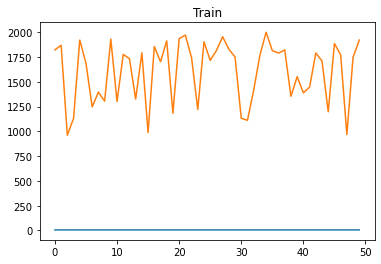

2/2 [==============================] - 4s 17ms/step


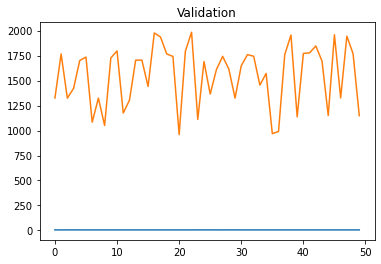

3/3 [==============================] - 0s 24ms/step


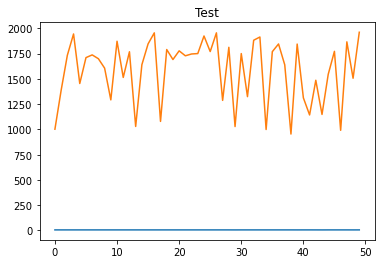

3/3 [==============================] - 1s 44ms/step


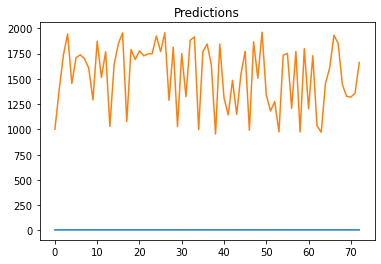

In [47]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [48]:
mavg_hybrid_cnn_gru_mse

2437819.14092831

### CNN RNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2531683.5000 - root_mean_squared_error: 1591.1265

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 107s 12s/step - loss: 2531683.5000 - root_mean_squared_error: 1591.1265 - val_loss: 2505600.5000 - val_root_mean_squared_error: 1582.9088
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2528860.7500 - root_mean_squared_error: 1590.2393

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 51s 6s/step - loss: 2528860.7500 - root_mean_squared_error: 1590.2393 - val_loss: 2502915.2500 - val_root_mean_squared_error: 1582.0604
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2526560.7500 - root_mean_squared_error: 1589.5159

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 53s 7s/step - loss: 2526560.7500 - root_mean_squared_error: 1589.5159 - val_loss: 2501293.7500 - val_root_mean_squared_error: 1581.5479
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2525112.0000 - root_mean_squared_error: 1589.0601

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 62s 8s/step - loss: 2525112.0000 - root_mean_squared_error: 1589.0601 - val_loss: 2499890.0000 - val_root_mean_squared_error: 1581.1040
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2523738.0000 - root_mean_squared_error: 1588.6277

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 2523738.0000 - root_mean_squared_error: 1588.6277 - val_loss: 2498518.5000 - val_root_mean_squared_error: 1580.6703
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2522387.5000 - root_mean_squared_error: 1588.2026

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 57s 8s/step - loss: 2522387.5000 - root_mean_squared_error: 1588.2026 - val_loss: 2497167.7500 - val_root_mean_squared_error: 1580.2429
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2521053.5000 - root_mean_squared_error: 1587.7826

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 2521053.5000 - root_mean_squared_error: 1587.7826 - val_loss: 2495842.7500 - val_root_mean_squared_error: 1579.8236
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2519736.2500 - root_mean_squared_error: 1587.3677

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 2519736.2500 - root_mean_squared_error: 1587.3677 - val_loss: 2494538.7500 - val_root_mean_squared_error: 1579.4109
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2518449.5000 - root_mean_squared_error: 1586.9624

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 2518449.5000 - root_mean_squared_error: 1586.9624 - val_loss: 2493265.7500 - val_root_mean_squared_error: 1579.0078
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2517182.2500 - root_mean_squared_error: 1586.5630

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 75s 11s/step - loss: 2517182.2500 - root_mean_squared_error: 1586.5630 - val_loss: 2492013.2500 - val_root_mean_squared_error: 1578.6112
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2515938.0000 - root_mean_squared_error: 1586.1709

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 68s 9s/step - loss: 2515938.0000 - root_mean_squared_error: 1586.1709 - val_loss: 2490778.7500 - val_root_mean_squared_error: 1578.2201
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2514707.5000 - root_mean_squared_error: 1585.7830

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2514707.5000 - root_mean_squared_error: 1585.7830 - val_loss: 2489573.2500 - val_root_mean_squared_error: 1577.8381
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2513510.0000 - root_mean_squared_error: 1585.4053

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 2513510.0000 - root_mean_squared_error: 1585.4053 - val_loss: 2488379.0000 - val_root_mean_squared_error: 1577.4597
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2512321.5000 - root_mean_squared_error: 1585.0304

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2512321.5000 - root_mean_squared_error: 1585.0304 - val_loss: 2487210.2500 - val_root_mean_squared_error: 1577.0891
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2511165.2500 - root_mean_squared_error: 1584.6656

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2511165.2500 - root_mean_squared_error: 1584.6656 - val_loss: 2486057.7500 - val_root_mean_squared_error: 1576.7238
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2510020.2500 - root_mean_squared_error: 1584.3043

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 2510020.2500 - root_mean_squared_error: 1584.3043 - val_loss: 2484934.0000 - val_root_mean_squared_error: 1576.3673
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2508916.0000 - root_mean_squared_error: 1583.9558

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2508916.0000 - root_mean_squared_error: 1583.9558 - val_loss: 2483843.7500 - val_root_mean_squared_error: 1576.0215
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2507834.7500 - root_mean_squared_error: 1583.6145

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2507834.7500 - root_mean_squared_error: 1583.6145 - val_loss: 2482787.7500 - val_root_mean_squared_error: 1575.6864
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2506788.0000 - root_mean_squared_error: 1583.2839

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 2506788.0000 - root_mean_squared_error: 1583.2839 - val_loss: 2481763.2500 - val_root_mean_squared_error: 1575.3613
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2505783.2500 - root_mean_squared_error: 1582.9666

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2505783.2500 - root_mean_squared_error: 1582.9666 - val_loss: 2480779.5000 - val_root_mean_squared_error: 1575.0490
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2504806.7500 - root_mean_squared_error: 1582.6581

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 54s 8s/step - loss: 2504806.7500 - root_mean_squared_error: 1582.6581 - val_loss: 2479824.5000 - val_root_mean_squared_error: 1574.7458
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2503874.2500 - root_mean_squared_error: 1582.3635

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2503874.2500 - root_mean_squared_error: 1582.3635 - val_loss: 2478907.0000 - val_root_mean_squared_error: 1574.4545
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2502965.5000 - root_mean_squared_error: 1582.0763

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2502965.5000 - root_mean_squared_error: 1582.0763 - val_loss: 2478027.0000 - val_root_mean_squared_error: 1574.1750
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2502097.2500 - root_mean_squared_error: 1581.8019

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 2502097.2500 - root_mean_squared_error: 1581.8019 - val_loss: 2477172.5000 - val_root_mean_squared_error: 1573.9036
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2501250.7500 - root_mean_squared_error: 1581.5343

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2501250.7500 - root_mean_squared_error: 1581.5343 - val_loss: 2476354.2500 - val_root_mean_squared_error: 1573.6437
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2497019.2500 - root_mean_squared_error: 1580.1959

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 2500441.7500 - root_mean_squared_error: 1581.2786 - val_loss: 2475554.7500 - val_root_mean_squared_error: 1573.3895
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2499652.5000 - root_mean_squared_error: 1581.0289

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2499652.5000 - root_mean_squared_error: 1581.0289 - val_loss: 2474774.5000 - val_root_mean_squared_error: 1573.1416
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2498878.0000 - root_mean_squared_error: 1580.7839

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2498878.0000 - root_mean_squared_error: 1580.7839 - val_loss: 2474015.2500 - val_root_mean_squared_error: 1572.9003
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 2498128.2500 - root_mean_squared_error: 1580.5469

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2498128.2500 - root_mean_squared_error: 1580.5469 - val_loss: 2473272.0000 - val_root_mean_squared_error: 1572.6639
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 2510026.0000 - root_mean_squared_error: 1584.3062

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 2s 24ms/step


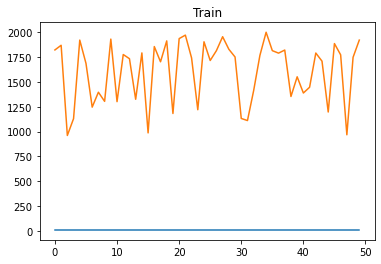

2/2 [==============================] - 2s 118ms/step


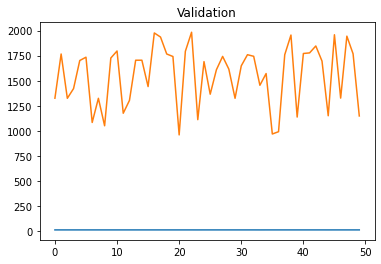

3/3 [==============================] - 0s 25ms/step


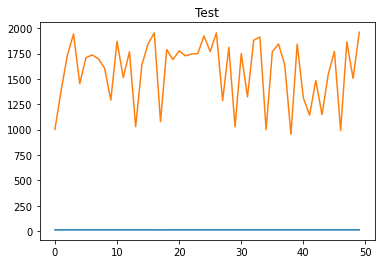

3/3 [==============================] - 0s 56ms/step


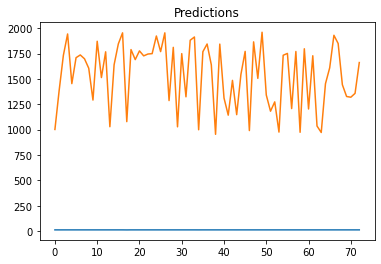

In [49]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [50]:
mavg_hybrid_cnn_rnn_gru_mse

2421142.085524646

### RNN LSTM GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 2529420.7500 - root_mean_squared_error: 1590.4153

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 74s 9s/step - loss: 2531548.2500 - root_mean_squared_error: 1591.0840 - val_loss: 2506267.0000 - val_root_mean_squared_error: 1583.1194
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2530160.7500 - root_mean_squared_error: 1590.6479

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 2530160.7500 - root_mean_squared_error: 1590.6479 - val_loss: 2504838.0000 - val_root_mean_squared_error: 1582.6680
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2528697.5000 - root_mean_squared_error: 1590.1879

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 54s 8s/step - loss: 2528697.5000 - root_mean_squared_error: 1590.1879 - val_loss: 2503296.0000 - val_root_mean_squared_error: 1582.1808
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2527093.0000 - root_mean_squared_error: 1589.6833

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2527093.0000 - root_mean_squared_error: 1589.6833 - val_loss: 2501566.5000 - val_root_mean_squared_error: 1581.6342
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2525252.2500 - root_mean_squared_error: 1589.1042

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2525252.2500 - root_mean_squared_error: 1589.1042 - val_loss: 2499575.5000 - val_root_mean_squared_error: 1581.0046
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 2507502.2500 - root_mean_squared_error: 1583.5095

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2523155.0000 - root_mean_squared_error: 1588.4442 - val_loss: 2497285.2500 - val_root_mean_squared_error: 1580.2802
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2520743.5000 - root_mean_squared_error: 1587.6849

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 41s 5s/step - loss: 2520743.5000 - root_mean_squared_error: 1587.6849 - val_loss: 2494733.2500 - val_root_mean_squared_error: 1579.4724
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 2518360.0000 - root_mean_squared_error: 1586.9342

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2518128.7500 - root_mean_squared_error: 1586.8613 - val_loss: 2492029.7500 - val_root_mean_squared_error: 1578.6165
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 2457672.0000 - root_mean_squared_error: 1567.6964

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2515406.2500 - root_mean_squared_error: 1586.0032 - val_loss: 2489319.2500 - val_root_mean_squared_error: 1577.7577
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2512741.5000 - root_mean_squared_error: 1585.1630

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 2512741.5000 - root_mean_squared_error: 1585.1630 - val_loss: 2486748.2500 - val_root_mean_squared_error: 1576.9427
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 2520306.0000 - root_mean_squared_error: 1587.5471

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 2510263.2500 - root_mean_squared_error: 1584.3810 - val_loss: 2484465.0000 - val_root_mean_squared_error: 1576.2186
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2508107.7500 - root_mean_squared_error: 1583.7007

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2508107.7500 - root_mean_squared_error: 1583.7007 - val_loss: 2482512.5000 - val_root_mean_squared_error: 1575.5991
Epoch 13/30
6/8 [=====================>........] - ETA: 0s - loss: 2511035.2500 - root_mean_squared_error: 1584.6246

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2506279.5000 - root_mean_squared_error: 1583.1233 - val_loss: 2480885.2500 - val_root_mean_squared_error: 1575.0826
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 2509973.2500 - root_mean_squared_error: 1584.2896

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2504768.2500 - root_mean_squared_error: 1582.6460 - val_loss: 2479560.7500 - val_root_mean_squared_error: 1574.6621
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 2498205.2500 - root_mean_squared_error: 1580.5712

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2503556.2500 - root_mean_squared_error: 1582.2631 - val_loss: 2478507.0000 - val_root_mean_squared_error: 1574.3275
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2502584.5000 - root_mean_squared_error: 1581.9559

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 64s 9s/step - loss: 2502584.5000 - root_mean_squared_error: 1581.9559 - val_loss: 2477665.7500 - val_root_mean_squared_error: 1574.0603
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 2500493.7500 - root_mean_squared_error: 1581.2949

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2501807.7500 - root_mean_squared_error: 1581.7103 - val_loss: 2476982.2500 - val_root_mean_squared_error: 1573.8431
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2501172.0000 - root_mean_squared_error: 1581.5094

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2501172.0000 - root_mean_squared_error: 1581.5094 - val_loss: 2476415.5000 - val_root_mean_squared_error: 1573.6631
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 2488008.2500 - root_mean_squared_error: 1577.3422

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 2500638.2500 - root_mean_squared_error: 1581.3407 - val_loss: 2475928.2500 - val_root_mean_squared_error: 1573.5083
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2500175.2500 - root_mean_squared_error: 1581.1942

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2500175.2500 - root_mean_squared_error: 1581.1942 - val_loss: 2475498.5000 - val_root_mean_squared_error: 1573.3717
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2499762.0000 - root_mean_squared_error: 1581.0636

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 62s 9s/step - loss: 2499762.0000 - root_mean_squared_error: 1581.0636 - val_loss: 2475114.2500 - val_root_mean_squared_error: 1573.2496
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2499388.2500 - root_mean_squared_error: 1580.9453

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 53s 7s/step - loss: 2499388.2500 - root_mean_squared_error: 1580.9453 - val_loss: 2474760.7500 - val_root_mean_squared_error: 1573.1372
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2499047.2500 - root_mean_squared_error: 1580.8375

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2499047.2500 - root_mean_squared_error: 1580.8375 - val_loss: 2474429.7500 - val_root_mean_squared_error: 1573.0320
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2498722.5000 - root_mean_squared_error: 1580.7347

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2498722.5000 - root_mean_squared_error: 1580.7347 - val_loss: 2474119.2500 - val_root_mean_squared_error: 1572.9333
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2498418.7500 - root_mean_squared_error: 1580.6387

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 57s 8s/step - loss: 2498418.7500 - root_mean_squared_error: 1580.6387 - val_loss: 2473824.5000 - val_root_mean_squared_error: 1572.8396
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 2498128.7500 - root_mean_squared_error: 1580.5470

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2498128.7500 - root_mean_squared_error: 1580.5470 - val_loss: 2473544.7500 - val_root_mean_squared_error: 1572.7507
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2497854.0000 - root_mean_squared_error: 1580.4601

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 2497854.0000 - root_mean_squared_error: 1580.4601 - val_loss: 2473277.2500 - val_root_mean_squared_error: 1572.6656
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2497592.2500 - root_mean_squared_error: 1580.3772

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2497592.2500 - root_mean_squared_error: 1580.3772 - val_loss: 2473024.0000 - val_root_mean_squared_error: 1572.5851
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 2497342.2500 - root_mean_squared_error: 1580.2981

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 2497342.2500 - root_mean_squared_error: 1580.2981 - val_loss: 2472780.2500 - val_root_mean_squared_error: 1572.5077
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 2478854.2500 - root_mean_squared_error: 1574.4377

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 1s 11ms/step


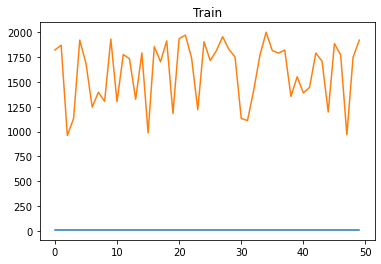

2/2 [==============================] - 1s 28ms/step


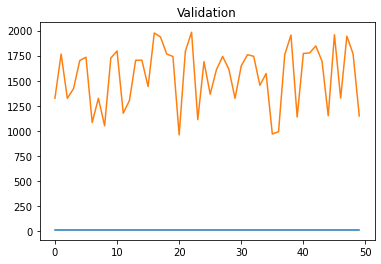

3/3 [==============================] - 0s 13ms/step


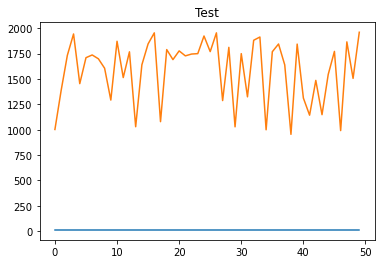

3/3 [==============================] - 0s 13ms/step


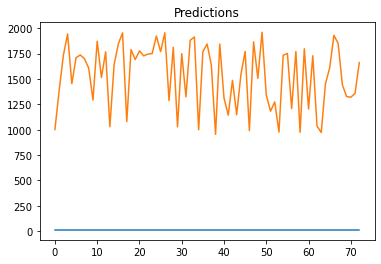

In [51]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [52]:
mavg_hybrid_lstm_rnn_gru_mse

2421124.4481460075

# MSE

In [53]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]
msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [54]:
msedf

,Model,MSE,RMSE
0,cnn,5.572936e+04,236.070670
1,rnn,2.448938e+06,1564.908191
2,gru,2.453485e+06,1566.360515
3,lstm,2.449120e+06,1564.966556
4,mvg_cnn,2.455826e+06,1567.107672
5,mvg_rnn,2.451751e+06,1565.806876
6,mvg_gru,2.445167e+06,1563.702959
7,mvg_lstm,2.454864e+06,1566.800463
8,auto_cnn,3.518692e+03,59.318561
9,auto_rnn,2.454934e+06,1566.822788


In [55]:
msedf.to_csv("msedf.csv", index= False)

<AxesSubplot:xlabel='Model'>

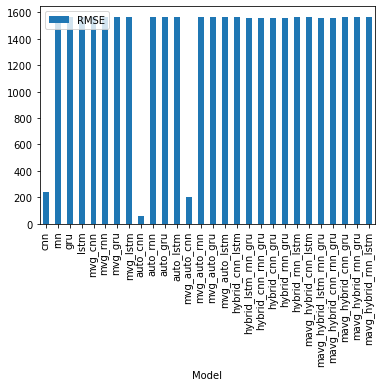

In [56]:
msedf.plot("Model", "RMSE", kind= "bar")

In [57]:
np.save("x_train.npy", x_train)
np.save("y_train.npy", y_train)
np.save("x_test.npy", x_test)
np.save("y_test.npy", y_test)
np.save("x_val.npy", x_val)
np.save("y_val.npy", y_val)